# **5MIN OMNI & Dayside OCB Model**

**Author:** Arnav Singh 
**Date:** 2024-09-10

---

## **Abstract**

For this notebook, the 5MIN merged OMNI dataset will be used to create different models attempting to model the OCB locations with various inputs and models. 

## **Keywords**

- Keyword 1
- Keyword 2
- Keyword 3

---

## **Table of Contents**

1. [Introduction](#introduction)
2. [Data Description](#data-description)
3. [Data Preprocessing](#data-preprocessing)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Feature Engineering](#feature-engineering)
6. [Model Selection](#model-selection)
7. [Model Training](#model-training)
8. [Model Evaluation](#model-evaluation)
9. [Hyperparameter Tuning](#hyperparameter-tuning)
10. [Results and Discussion](#results-and-discussion)
11. [Conclusion](#conclusion)
12. [References](#references)
13. [Appendix](#appendix)

---

## **Introduction**

Introduce the problem statement, background information, and the significance of the modeling project.

---

In [1]:
### Imports ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dayside_df = pd.read_parquet('data/Dayside.parquet')
dayside_df.describe()

OCB_Date       OCB_mlat        OCB_mlt  \
count                         437644  437644.000000  437644.000000   
mean   2003-06-01 14:36:20.500443008       6.040775      11.697393   
min              1983-12-05 00:47:40     -89.760000       0.110000   
25%       1999-02-11 06:19:51.750000     -77.820000       7.850000   
50%              2004-04-11 13:21:29      72.470000      10.510000   
75%       2008-01-29 00:29:56.500000      78.180000      16.470000   
max              2012-12-31 23:22:24      89.900000      23.970000   
std                              NaN      77.666829       4.706631   

      EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ  TIMESHIFT_seconds  \
count                              437644      437644.000000   
mean           2003-06-01 14:36:19.860800        2362.558701   
min                   1983-12-05 00:50:00      -10189.000000   
25%                   1999-02-11 06:21:15         681.000000   
50%                   2004-04-11 13:20:00        2618.000000   
75%                   2008-01-29 00:30:00        3549.000000   
max                   2012-12-31 23:20:00       10655.000000   
std                                   NaN        1737.990144   

       MAG_AVG_B-VECTOR_nT     BX__GSE_nT     BY__GSM_nT     BZ__GSM_nT  \
count        437644.000000  437644.000000  437644.000000  437644.000000   
mean              5.907477       0.075834      -0.070200      -0.354826   
min               0.260000     -40.990000     -42.590000     -54.400000   
25%               3.920000      -2.600000      -2.710000      -2.150000   
50%               5.250000       0.110000      -0.150000      -0.290000   
75%               7.060000       2.730000       2.560000       1.520000   
max              59.690000      35.230000      47.740000      41.270000   
std               3.111417       3.681877       4.132693       3.377761   

       FLOW_SPEED__GSE_km/s  ...  PROTON_DENSITY_n/cc  FLOW_PRESSURE_nPa  \
count         437644.000000  ...        437644.000000      437644.000000   
mean             436.225657  ...             6.473615           2.223449   
min              234.400000  ...             0.030000           0.010000   
25%              356.100000  ...             3.190000           1.240000   
50%              412.000000  ...             4.970000           1.790000   
75%              496.400000  ...             7.920000           2.650000   
max             1094.500000  ...            70.800000          89.510000   
std              105.762569  ...             5.245134           1.739334   

           5-M_AE_nT  5-M_AL-INDEX_nT  SYM/H_INDEX_nT  5-M_PC(N)-INDEX_  \
count  437644.000000    437644.000000   437644.000000     437644.000000   
mean      212.995867      -137.709360      -13.172677          1.177026   
min         1.000000     -3032.000000     -475.000000        -11.790000   
25%        51.000000      -195.000000      -20.000000          0.240000   
50%       127.000000       -72.000000      -10.000000          0.860000   
75%       303.000000       -24.000000       -2.000000          1.840000   
max      2945.000000        38.000000      109.000000         24.110000   
std       225.276487       166.579801       19.631408          1.417505   

                  BT             qc       sin_term        dFMP_dt  
count  437644.000000  437644.000000  213160.000000  213160.000000  
mean        4.429847      -0.058896       0.461304    4097.295290  
min         0.010000      -3.141593       0.000000       0.000000  
25%         2.455952      -1.720544       0.147689    1002.849111  
50%         3.813325      -0.146484       0.437412    2980.533893  
75%         5.611355       1.615992       0.763063    5848.386906  
max        57.881329       3.141593       1.000000  111132.480707  
std         2.999276       1.830629       0.331910    4317.031442  

[8 rows x 23 columns]

In [3]:
daysideN_df = dayside_df[dayside_df['OCB_mlat'] > 0]
daysideS_df = dayside_df[dayside_df['OCB_mlat'] < 0]

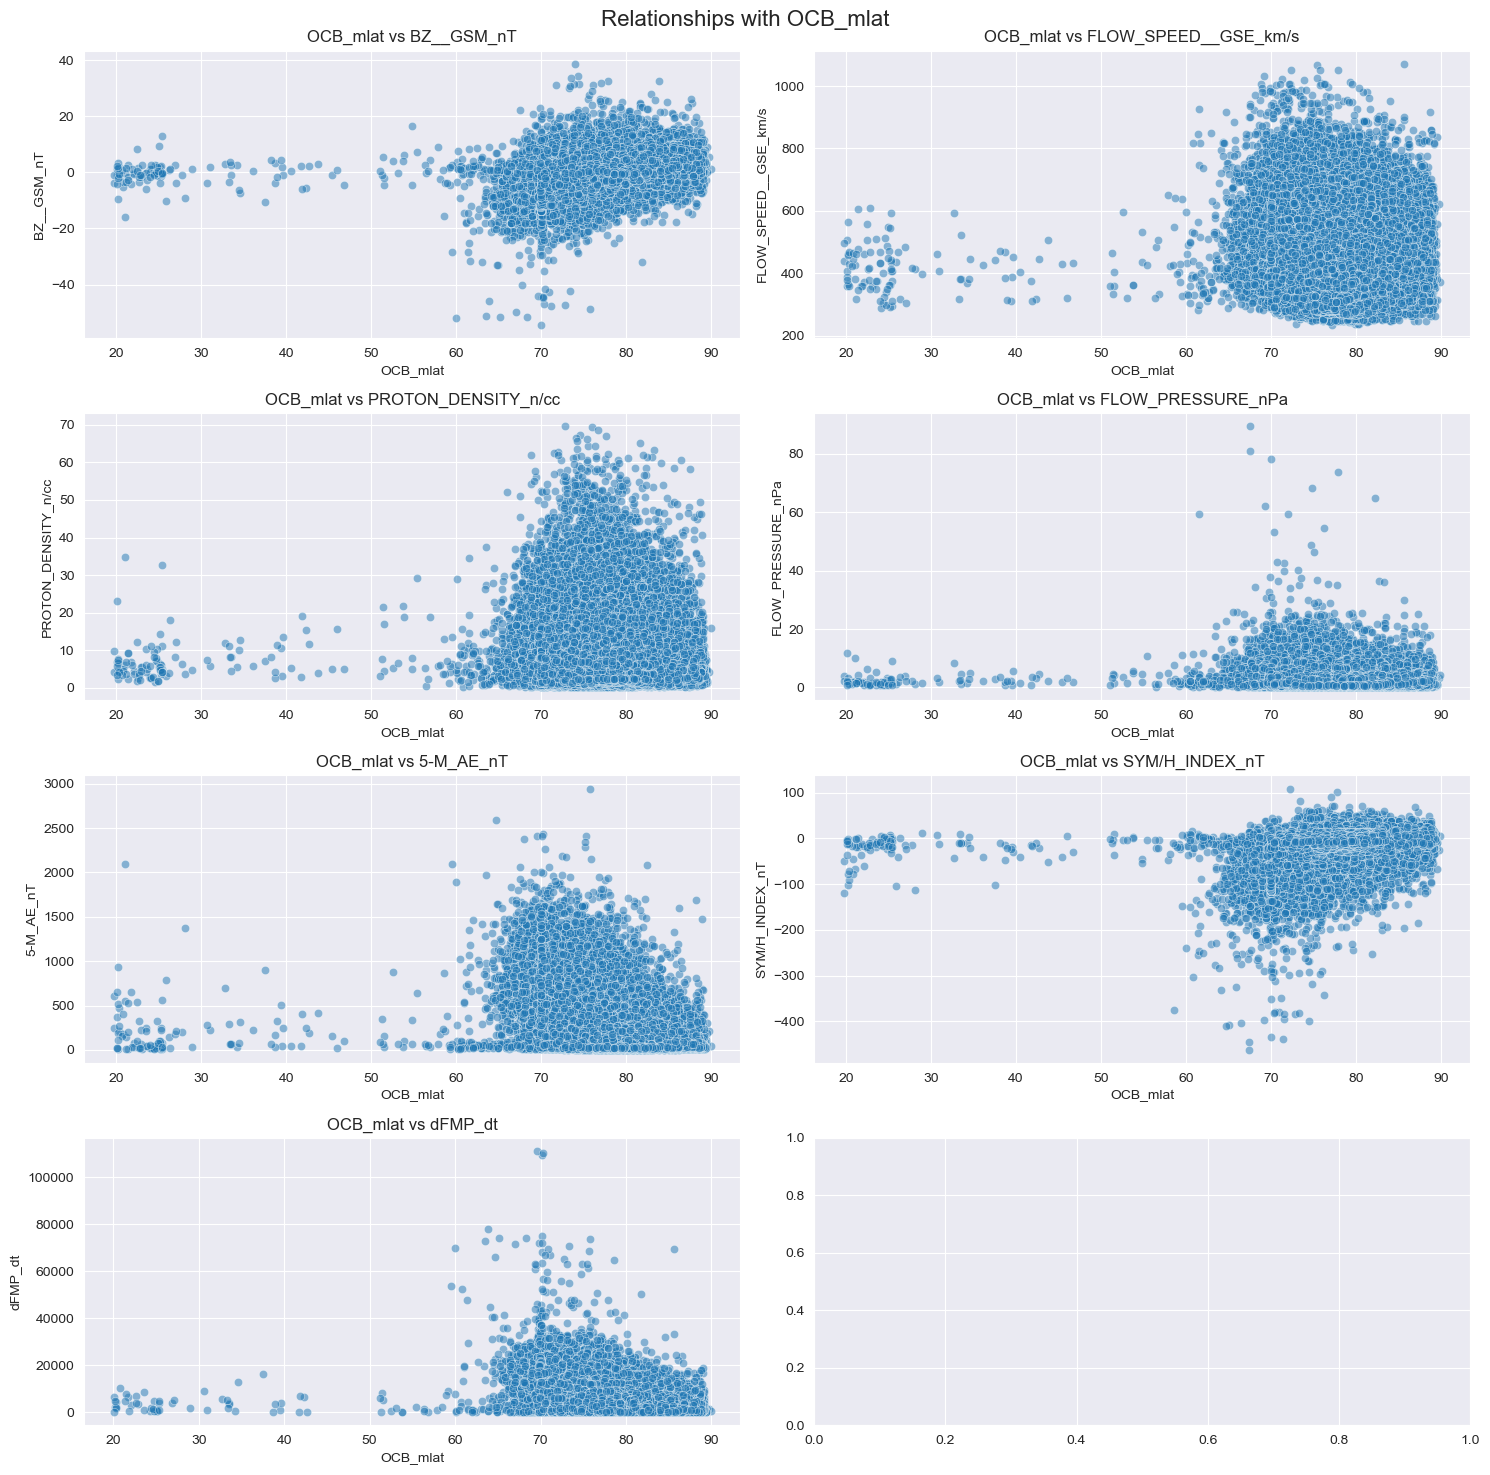

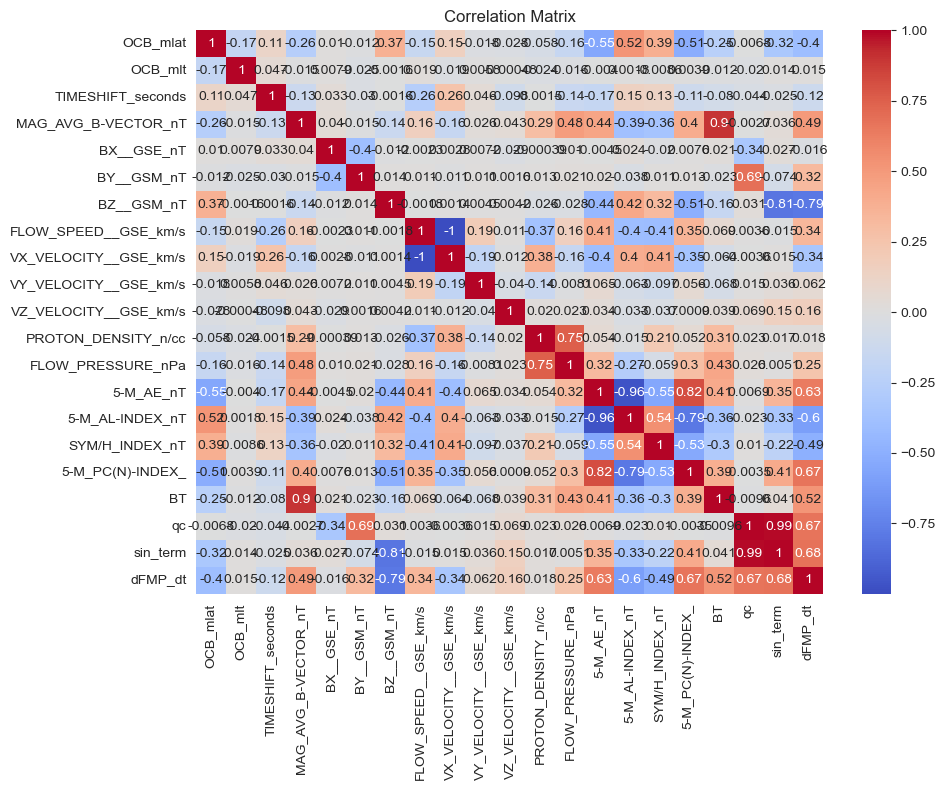

In [4]:
def plot_df(df): 
    # Create subplots for each comparison
    fig, axes = plt.subplots(4, 2, figsize=(15, 15))
    fig.suptitle('Relationships with OCB_mlat', fontsize=16)
    
    # Flatten axes array for easier iteration
    axes = axes.flatten()
    
    # List of columns to compare with OCB_mlat (excluding date/time columns)
    columns_to_plot = ['BZ__GSM_nT', 'FLOW_SPEED__GSE_km/s', 'PROTON_DENSITY_n/cc', 
                       'FLOW_PRESSURE_nPa', '5-M_AE_nT', 'SYM/H_INDEX_nT' , 'dFMP_dt']
    
    # Create scatter plots
    for i, col in enumerate(columns_to_plot):
        sns.scatterplot(data=df, x='OCB_mlat', y=col, ax=axes[i], alpha=0.5)
        axes[i].set_title(f'OCB_mlat vs {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Optional: Create correlation plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), 
                annot=True, 
                cmap='coolwarm',
                center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

plot_df(daysideN_df)

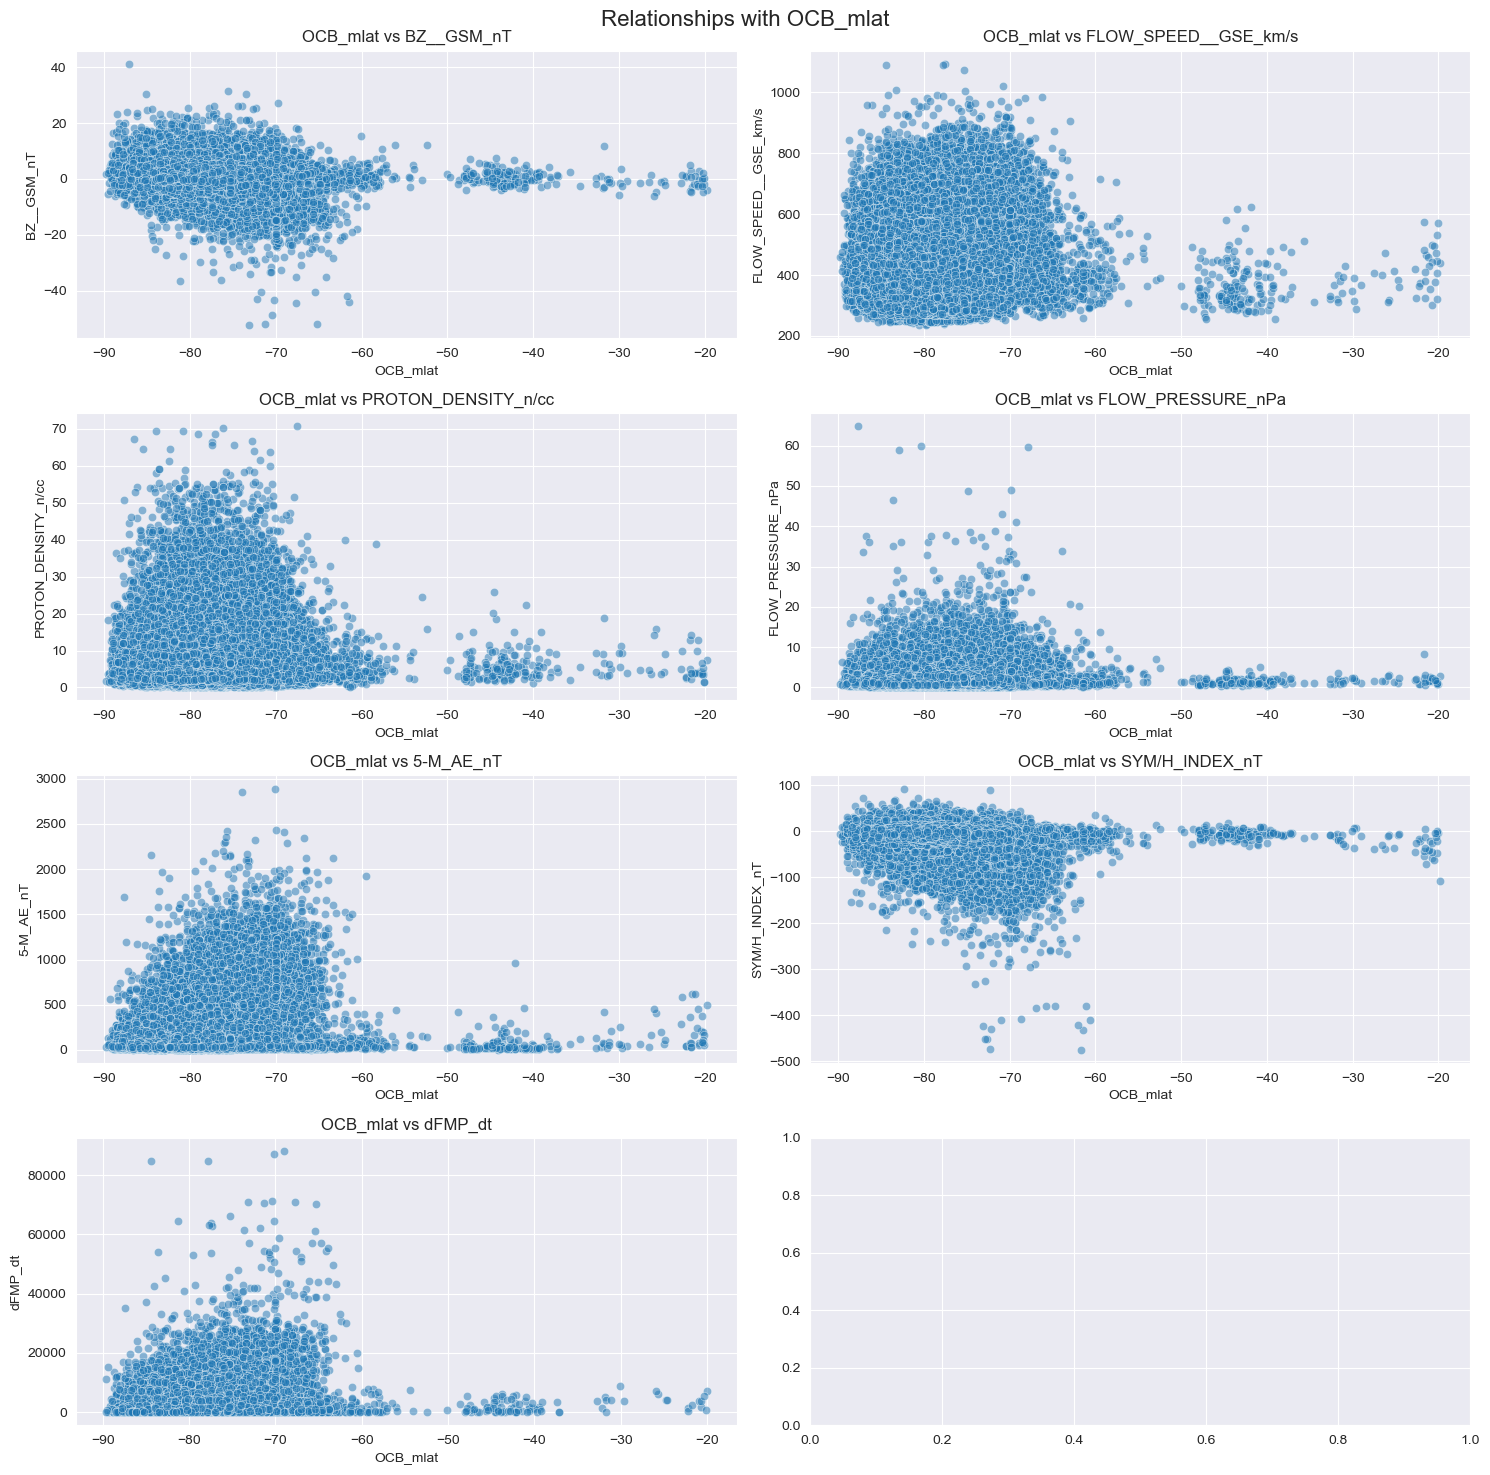

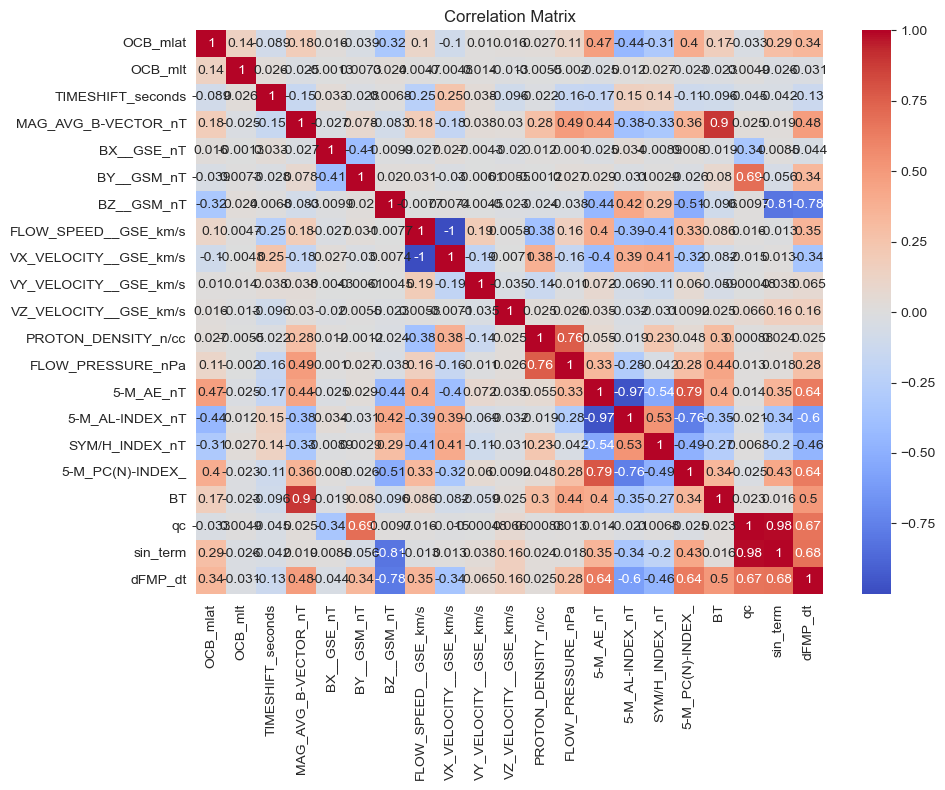

In [5]:
plot_df(daysideS_df)

Epoch 1/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.1615 - loss: 2.7073 - val_accuracy: 0.1841 - val_loss: 2.4248
Epoch 2/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1779 - loss: 2.4271 - val_accuracy: 0.1794 - val_loss: 2.3992
Epoch 3/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1836 - loss: 2.3914 - val_accuracy: 0.1816 - val_loss: 2.3809
Epoch 4/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1833 - loss: 2.3748 - val_accuracy: 0.1846 - val_loss: 2.3613
Epoch 5/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1862 - loss: 2.3615 - val_accuracy: 0.1793 - val_loss: 2.3714
Epoch 6/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1892 - loss: 2.3565 - val_accuracy: 0.1897 - val_loss: 2.3582
Epoch 7/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1880 - loss: 2.3535 - val_accuracy: 0.1864 - val_loss: 2.3529
Epoch 8/100
515/515 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.1865 - loss: 2.3585 - 

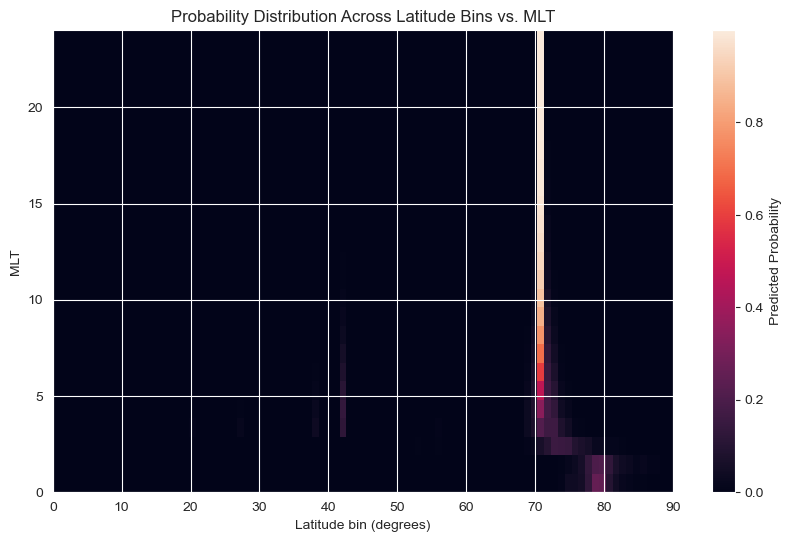

Epoch 1/100


2024-12-27 15:03:10.017215: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at sparse_xent_op.cc:103 : INVALID_ARGUMENT: Received a label value of -1 which is outside the valid range of [0, 91).  Label values: -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
2024-12-27 15:03:10.017290: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Received a label value of -1 which is outside the valid range of [0, 91).  Label values: -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/Users/beastxgamer/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Users/beastxgamer/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/Users/beastxgamer/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/var/folders/gg/qxtxkv2501v1x8qx_r4vgk_m0000gn/T/ipykernel_1519/2475254510.py", line 124, in <module>

  File "/var/folders/gg/qxtxkv2501v1x8qx_r4vgk_m0000gn/T/ipykernel_1519/2475254510.py", line 67, in model_NN

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/trainers/trainer.py", line 357, in _compute_loss

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/trainers/trainer.py", line 325, in compute_loss

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/losses/loss.py", line 43, in __call__

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/losses/losses.py", line 27, in call

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/losses/losses.py", line 1853, in sparse_categorical_crossentropy

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/ops/nn.py", line 1567, in sparse_categorical_crossentropy

  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py", line 645, in sparse_categorical_crossentropy

Received a label value of -1 which is outside the valid range of [0, 91).  Label values: -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_74192]

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
import keras_tuner as kt

features = [
    'OCB_mlt','MAG_AVG_B-VECTOR_nT', 'BZ__GSM_nT', 'FLOW_SPEED__GSE_km/s', 'PROTON_DENSITY_n/cc', 
    'FLOW_PRESSURE_nPa', '5-M_AE_nT', 'dFMP_dt'
]

target = 'OCB_mlat'  # single latitude per MLT
def model_NN(df):
    df = df.dropna(subset=features + [target])
    
    X = df[features].values
    Y = df[[target]].values  # shape (N, 1)
    
    # Train-validation-test split
    X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    X_train, X_val, Y_train, Y_val = train_test_split(X_trainval, Y_trainval, test_size=0.25, random_state=42)
    
    # Scale inputs
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    # 181 evenly spaced integer latitudes from -90 to +90
    lat_bins = np.arange(0, 91, 1)  # shape=(181,)
    N_BINS = len(lat_bins)  # 181
    
    # Suppose Y_train is shape (N,) with lat in range [-90, 90]
    # We'll find the bin each lat belongs to via np.digitize
    Y_train_bin = np.digitize(Y_train, lat_bins) - 1  
    #   -1 so that bins start at index 0. 
    #   This yields integer indexes in [0..180].
    
    # We do the same for Y_val and Y_test
    Y_val_bin = np.digitize(Y_val, lat_bins) - 1
    Y_test_bin = np.digitize(Y_test, lat_bins) - 1
    
    from tensorflow.keras.utils import to_categorical
    
    #  Option A: "sparse" labels
    #  Just use Y_train_bin as is (integer class labels).
    #  Then compile with loss='sparse_categorical_crossentropy'.
    
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dropout(0.2),
        layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dropout(0.2),
        layers.Dense(N_BINS, activation='softmax')  # 181-class output
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # use sparse labels
                  metrics=['accuracy'])
    
    # Final training with early stopping to prevent overfitting
    es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(X_train, Y_train_bin,
                        validation_data=(X_val, Y_val_bin),
                        epochs=100, batch_size=128,
                        callbacks=[es],
                        verbose=1)
    
    proba = model.predict(X_test)  # shape (N_test, 181)
    # If you want the “most likely” latitude:
    predicted_bin = np.argmax(proba, axis=1)  # integer in [0..180]
    predicted_lat = lat_bins[predicted_bin]   # map bin index back to actual lat
    example_input_features = X_test[0:1]  # one sample
    # This corresponds to some MLT in example_input_features[-1], but we can vary MLT now.
    
    # Extract everything except the last feature (b6_mlt) if it is last in your feature list
    # If 'b6_mlt' is the last feature in the feature list, do:
    base_features = example_input_features.copy()
    
    # Let's say the last column of features is MLT:
    feature_idx_mlt = features.index('OCB_mlt')
    
    MLT_values = np.arange(25)
    prob_distributions = []
    
    for mlt in MLT_values:
        # Make a copy of your features
        temp_input = base_features.copy()
        # Set the MLT column to this mlt
        temp_input[0, feature_idx_mlt] = mlt
        
        # Predict probabilities for this single input
        proba = model.predict(temp_input)  # shape = (1, 181)
        
        # proba is 2D; extract the 1D probability array
        prob_distributions.append(proba[0])
    
    # Convert to a 2D array: shape = (25, 181)
    #   row = MLT, col = latitude bin
    prob_distributions = np.array(prob_distributions)
    
    
    plt.figure(figsize=(10, 6))
    
    # imshow expects (top->bottom, left->right), so we set extent properly
    #   extent = (x_min, x_max, y_min, y_max)
    #   Here x is lat_bins from -90..90, y is MLT from 0..24
    plt.imshow(prob_distributions, 
               origin='lower',               # so that row 0 is at the bottom
               aspect='auto', 
               extent=(lat_bins[0], lat_bins[-1], MLT_values[0], MLT_values[-1]))
    
    plt.colorbar(label="Predicted Probability")
    plt.xlabel("Latitude bin (degrees)")
    plt.ylabel("MLT")
    plt.title("Probability Distribution Across Latitude Bins vs. MLT")
    plt.show()

model_NN(daysideN_df)
model_NN(daysideS_df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
import keras_tuner as kt
import numpy as np
import matplotlib.pyplot as plt

def build_model(hp):
    """Hyperparameter-tunable model builder"""
    model = models.Sequential()
    
    # Input layer
    model.add(layers.Input(shape=(8,)))  # 8 features
    
    # Tune number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tune number of units
        units = hp.Int(f'units_{i}', min_value=64, max_value=1024, step=64)
        
        model.add(layers.Dense(
            units=units,
            activation='relu',
            kernel_regularizer=regularizers.l2(
                hp.Float(f'l2_{i}', 1e-6, 1e-3, sampling='log')
            )
        ))
        
        # Tune dropout rate
        model.add(layers.Dropout(
            hp.Float(f'dropout_{i}', 0, 0.5, step=0.1)
        ))
    
    # Output layer (N_BINS classes)
    model.add(layers.Dense(181, activation='softmax'))
    
    # Tune learning rate
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

def process_latitudes(lats):
    """Process latitude values to handle both hemispheres"""
    # Create bins from -90 to +90
    lat_bins = np.arange(-90, 91, 1)  # 181 bins
    
    # Digitize the latitudes into bins
    # Add 90 to shift from [-90,90] to [0,180] range
    lat_indices = np.digitize(lats, lat_bins) - 1
    
    return lat_bins, lat_indices

def model_NN(df, hemisphere='north'):
    """
    Train neural network model with hyperparameter tuning
    
    Parameters:
    df: DataFrame containing the data
    hemisphere: 'north' or 'south' to indicate which hemisphere's data
    """
    features = [
        'OCB_mlt', 'MAG_AVG_B-VECTOR_nT', 'BZ__GSM_nT', 'FLOW_SPEED__GSE_km/s',
        'PROTON_DENSITY_n/cc', 'FLOW_PRESSURE_nPa', '5-M_AE_nT', 'dFMP_dt'
    ]
    target = 'OCB_mlat'
    
    # Clean data
    df = df.dropna(subset=features + [target])
    
    X = df[features].values
    Y = df[[target]].values
    
    # Split data
    X_trainval, X_test, Y_trainval, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42
    )
    X_train, X_val, Y_train, Y_val = train_test_split(
        X_trainval, Y_trainval, test_size=0.25, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    # Process latitudes for both hemispheres
    lat_bins, Y_train_bin = process_latitudes(Y_train)
    _, Y_val_bin = process_latitudes(Y_val)
    _, Y_test_bin = process_latitudes(Y_test)
    
    # Initialize Keras Tuner
    tuner = kt.Hyperband(
        build_model,
        objective='val_accuracy',
        max_epochs=100,
        factor=3,
        directory='ocb_tuning',
        project_name=f'ocb_{hemisphere}'
    )
    
    # Callbacks
    stop_early = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    # Find best hyperparameters
    tuner.search(
        X_train, Y_train_bin,
        validation_data=(X_val, Y_val_bin),
        callbacks=[stop_early],
        epochs=100,
        batch_size=128
    )
    
    # Get best model
    best_model = tuner.get_best_models(num_models=1)[0]
    
    # Final training with best model
    history = best_model.fit(
        X_train, Y_train_bin,
        validation_data=(X_val, Y_val_bin),
        epochs=100,
        batch_size=128,
        callbacks=[stop_early],
        verbose=1
    )
    
    # Evaluate and visualize predictions
    def plot_predictions(model, feature_idx_mlt=0):
        MLT_values = np.arange(25)
        example_input = X_test[0:1].copy()
        prob_distributions = []
        
        for mlt in MLT_values:
            temp_input = example_input.copy()
            temp_input[0, feature_idx_mlt] = mlt
            proba = model.predict(temp_input, verbose=0)
            prob_distributions.append(proba[0])
        
        prob_distributions = np.array(prob_distributions)
        
        plt.figure(figsize=(12, 8))
        plt.imshow(
            prob_distributions,
            origin='lower',
            aspect='auto',
            extent=(lat_bins[0], lat_bins[-1], MLT_values[0], MLT_values[-1])
        )
        plt.colorbar(label="Predicted Probability")
        plt.xlabel("Latitude (degrees)")
        plt.ylabel("MLT")
        plt.title(f"OCB Location Probability Distribution ({hemisphere} hemisphere)")
        plt.show()
        
        return prob_distributions
    
    predictions = plot_predictions(best_model)
    
    return best_model, history, predictions, scaler

# Usage
north_model, north_history, north_pred, north_scaler = model_NN(daysideN_df, 'north')

In [ ]:
south_model, south_history, south_pred, south_scaler = model_NN(daysideS_df, 'south')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true, y_pred, model_name):
    """Calculate and return evaluation metrics for a model"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

def train_simple_models(df, hemisphere='north'):
    """
    Train and evaluate multiple simple ML models
    
    Parameters:
    df: DataFrame containing the data
    hemisphere: 'north' or 'south' to indicate which hemisphere's data
    """
    features = [
        'OCB_mlt', 'MAG_AVG_B-VECTOR_nT', 'BZ__GSM_nT', 'FLOW_SPEED__GSE_km/s',
        'PROTON_DENSITY_n/cc', 'FLOW_PRESSURE_nPa', '5-M_AE_nT', 'dFMP_dt'
    ]
    target = 'OCB_mlat'
    
    # Prepare data
    df = df.dropna(subset=features + [target])
    X = df[features]
    y = df[target]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models with hyperparameter grids
    models = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1.0, 10.0]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1.0, 10.0]
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5]
            }
        },
        'SVR': {
            'model': SVR(),
            'params': {
                'C': [0.1, 1.0, 10.0],
                'kernel': ['rbf', 'linear']
            }
        }
    }
    
    # Train and evaluate models
    results = []
    trained_models = {}
    
    for name, config in models.items():
        print(f"\nTraining {name}...")
        
        # Perform GridSearchCV
        grid_search = GridSearchCV(
            config['model'],
            config['params'],
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        trained_models[name] = best_model
        
        # Make predictions
        y_pred = best_model.predict(X_test_scaled)
        
        # Calculate metrics
        metrics = evaluate_model(y_test, y_pred, name)
        results.append(metrics)
        
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Visualize model comparisons
    plt.figure(figsize=(12, 6))
    
    # Plot RMSE comparison
    plt.subplot(1, 2, 1)
    sns.barplot(x='Model', y='RMSE', data=results_df)
    plt.xticks(rotation=45)
    plt.title(f'RMSE Comparison ({hemisphere} hemisphere)')
    
    # Plot R² comparison
    plt.subplot(1, 2, 2)
    sns.barplot(x='Model', y='R²', data=results_df)
    plt.xticks(rotation=45)
    plt.title(f'R² Comparison ({hemisphere} hemisphere)')
    
    plt.tight_layout()
    plt.show()
    
    # Feature importance analysis for Random Forest
    rf_model = trained_models['Random Forest']
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance ({hemisphere} hemisphere)')
    plt.show()
    
    return results_df, trained_models, scaler

# Train models for both hemispheres
north_results, north_models, north_scaler = train_simple_models(daysideN_df, 'north')
print("\nNorth Hemisphere Results:")
print(north_results)

south_results, south_models, south_scaler = train_simple_models(daysideS_df, 'south')
print("\nSouth Hemisphere Results:")
print(south_results)

# Function to make predictions using all models
def predict_with_all_models(input_data, models, scaler):
    """Make predictions using all trained models"""
    scaled_input = scaler.transform(input_data)
    predictions = {}
    
    for name, model in models.items():
        pred = model.predict(scaled_input)
        predictions[name] = pred
        
    return predictions

# Example usage for a single data point
example_input = daysideN_df[features].iloc[[0]]
north_predictions = predict_with_all_models(example_input, north_models, north_scaler)
print("\nPredictions for example input (North):")
for model_name, pred in north_predictions.items():
    print(f"{model_name}: {pred[0]:.2f}")

Really good Paper: https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019SW002299

### Classification Models

Training North Hemisphere Models...

Training Logistic Regression...


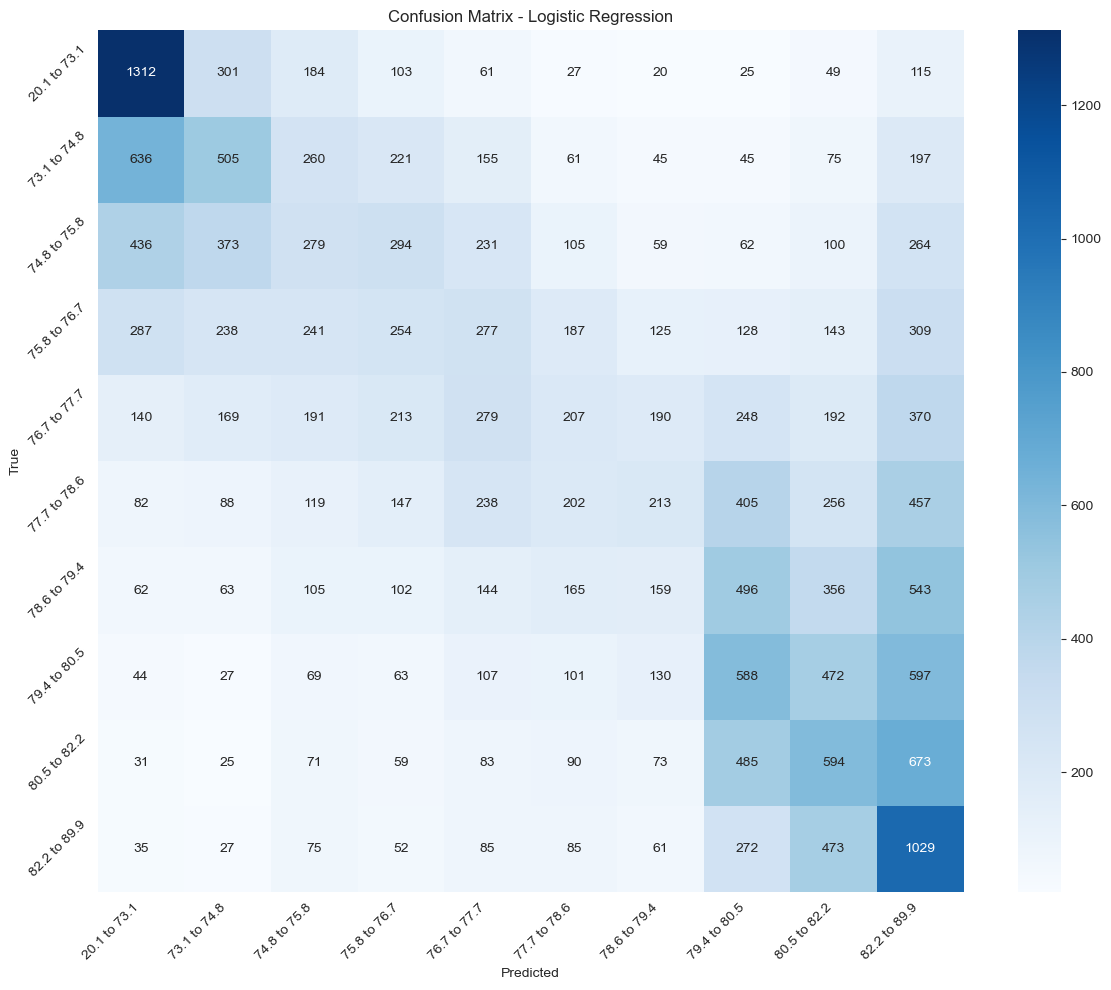

Best parameters for Logistic Regression: {'C': 1.0, 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

20.1 to 73.1       0.43      0.60      0.50      2197
73.1 to 74.8       0.28      0.23      0.25      2200
74.8 to 75.8       0.18      0.13      0.15      2203
75.8 to 76.7       0.17      0.12      0.14      2189
76.7 to 77.7       0.17      0.13      0.14      2199
77.7 to 78.6       0.16      0.09      0.12      2207
78.6 to 79.4       0.15      0.07      0.10      2195
79.4 to 80.5       0.21      0.27      0.24      2198
80.5 to 82.2       0.22      0.27      0.24      2184
82.2 to 89.9       0.23      0.47      0.30      2194

    accuracy                           0.24     21966
   macro avg       0.22      0.24      0.22     21966
weighted avg       0.22      0.24      0.22     21966


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


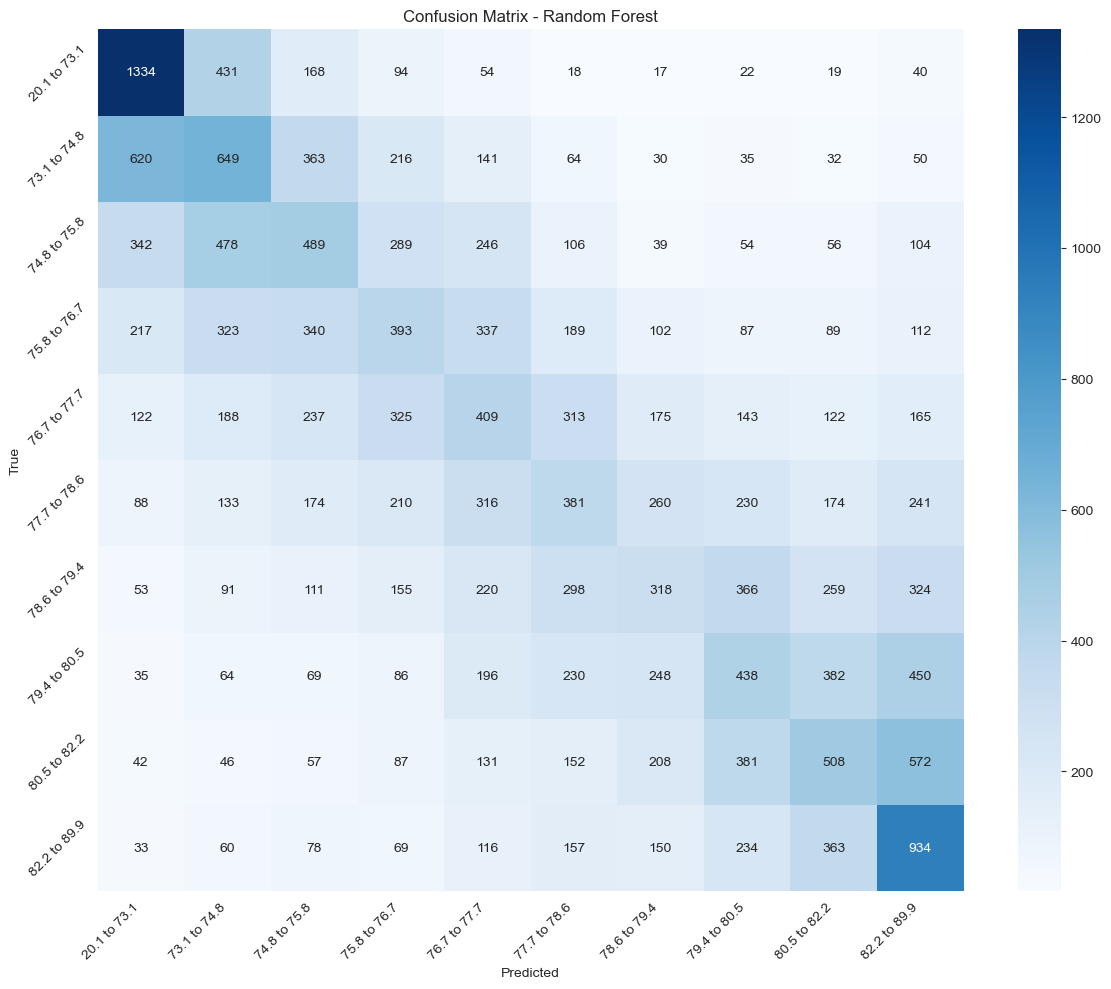

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

20.1 to 73.1       0.46      0.61      0.52      2197
73.1 to 74.8       0.26      0.29      0.28      2200
74.8 to 75.8       0.23      0.22      0.23      2203
75.8 to 76.7       0.20      0.18      0.19      2189
76.7 to 77.7       0.19      0.19      0.19      2199
77.7 to 78.6       0.20      0.17      0.19      2207
78.6 to 79.4       0.21      0.14      0.17      2195
79.4 to 80.5       0.22      0.20      0.21      2198
80.5 to 82.2       0.25      0.23      0.24      2184
82.2 to 89.9       0.31      0.43      0.36      2194

    accuracy                           0.27     21966
   macro avg       0.25      0.27      0.26     21966
weighted avg       0.25      0.27      0.26     21966


Training KNN...


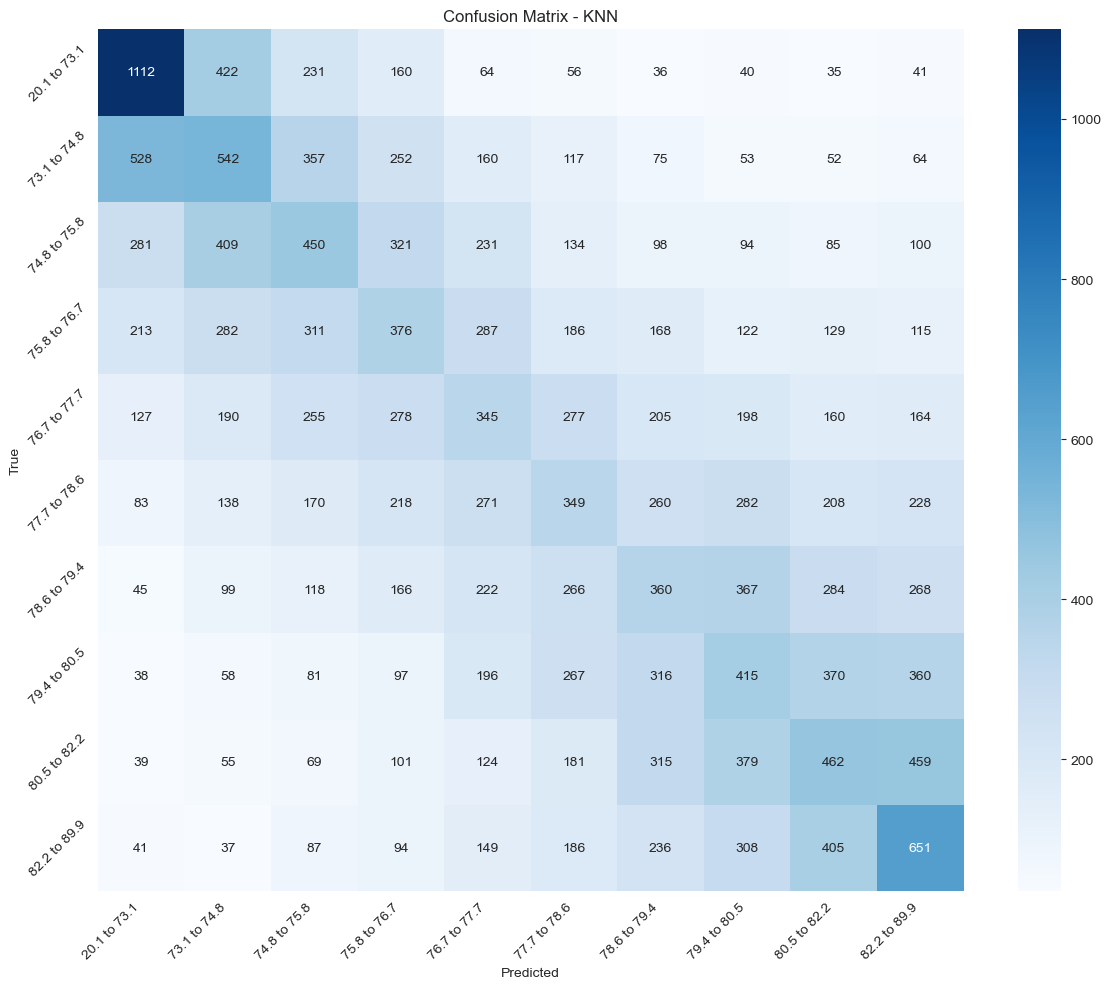

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
              precision    recall  f1-score   support

20.1 to 73.1       0.44      0.51      0.47      2197
73.1 to 74.8       0.24      0.25      0.24      2200
74.8 to 75.8       0.21      0.20      0.21      2203
75.8 to 76.7       0.18      0.17      0.18      2189
76.7 to 77.7       0.17      0.16      0.16      2199
77.7 to 78.6       0.17      0.16      0.17      2207
78.6 to 79.4       0.17      0.16      0.17      2195
79.4 to 80.5       0.18      0.19      0.19      2198
80.5 to 82.2       0.21      0.21      0.21      2184
82.2 to 89.9       0.27      0.30      0.28      2194

    accuracy                           0.23     21966
   macro avg       0.23      0.23      0.23     21966
weighted avg       0.23      0.23      0.23     21966


Training Decision Tree...


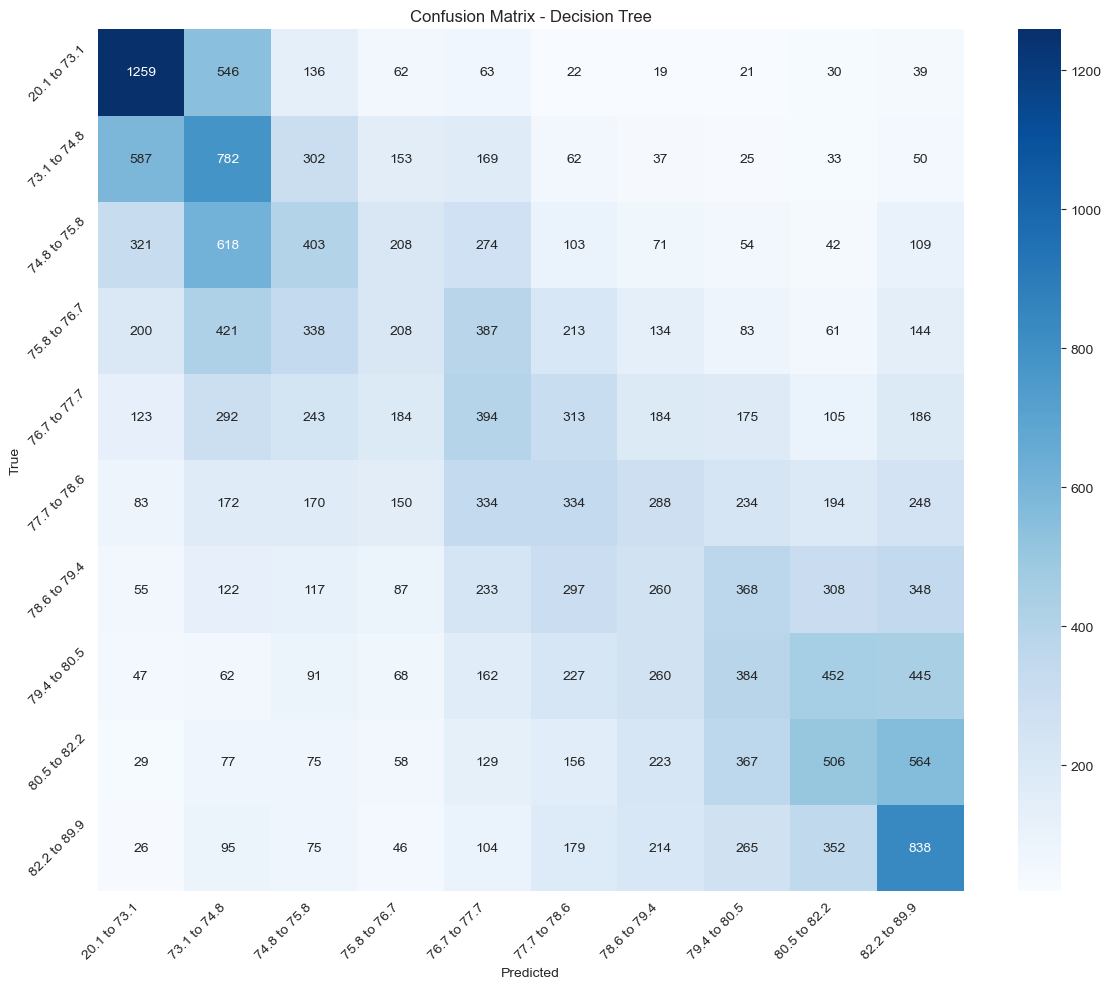

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

20.1 to 73.1       0.46      0.57      0.51      2197
73.1 to 74.8       0.25      0.36      0.29      2200
74.8 to 75.8       0.21      0.18      0.19      2203
75.8 to 76.7       0.17      0.10      0.12      2189
76.7 to 77.7       0.18      0.18      0.18      2199
77.7 to 78.6       0.18      0.15      0.16      2207
78.6 to 79.4       0.15      0.12      0.13      2195
79.4 to 80.5       0.19      0.17      0.18      2198
80.5 to 82.2       0.24      0.23      0.24      2184
82.2 to 89.9       0.28      0.38      0.32      2194

    accuracy                           0.24     21966
   macro avg       0.23      0.24      0.23     21966
weighted avg       0.23      0.24      0.23     21966



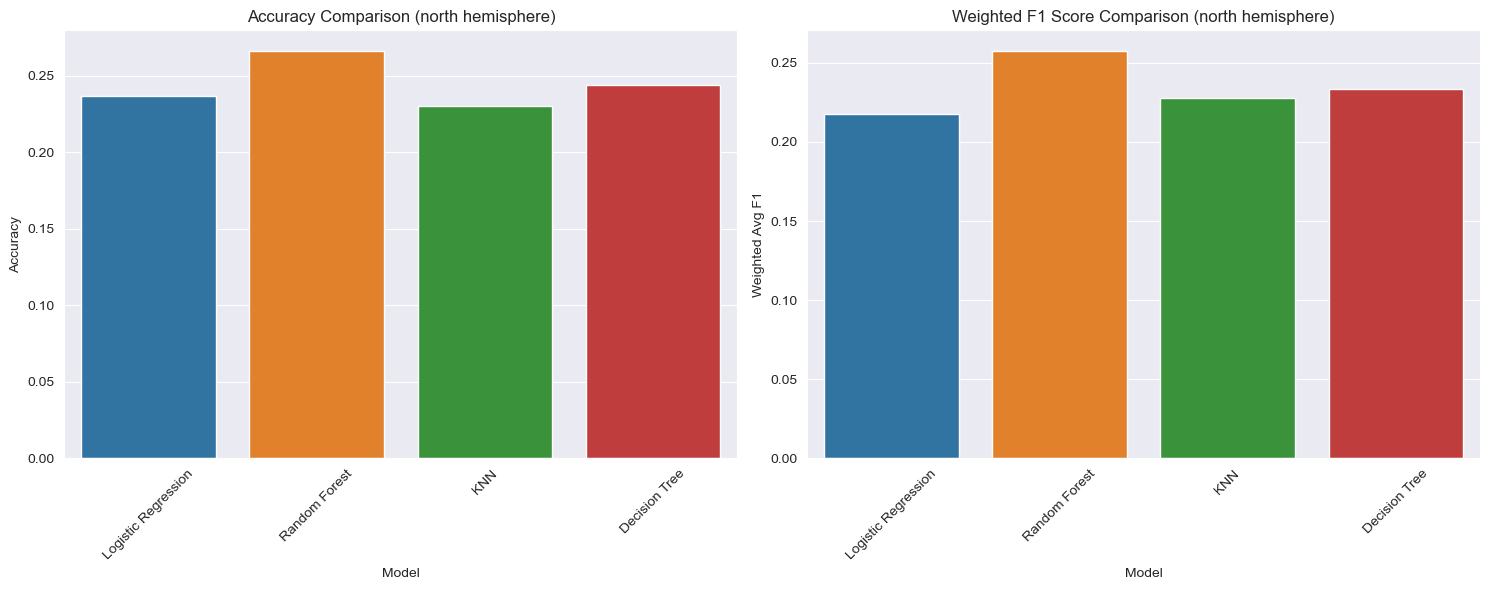

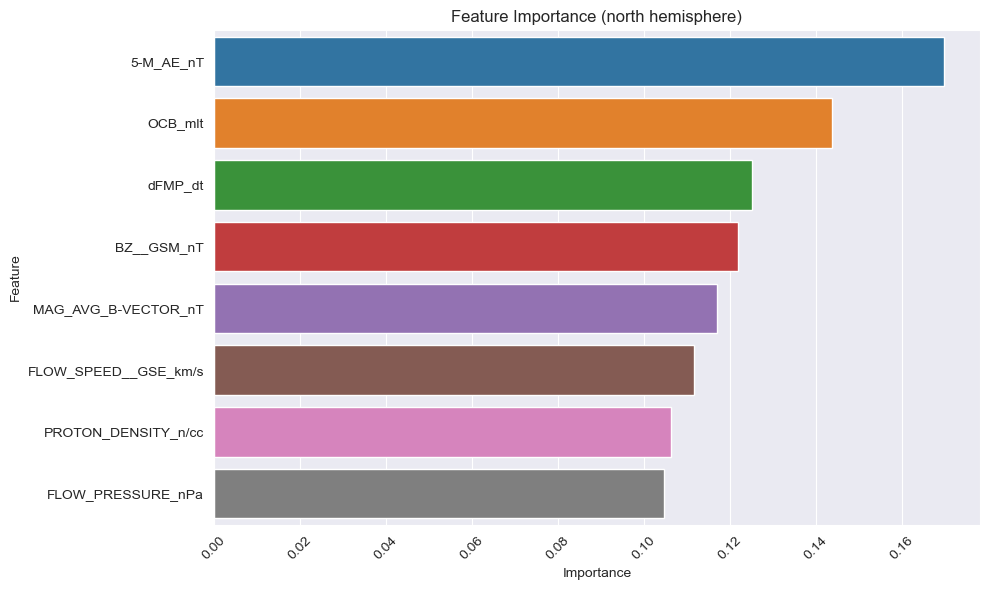

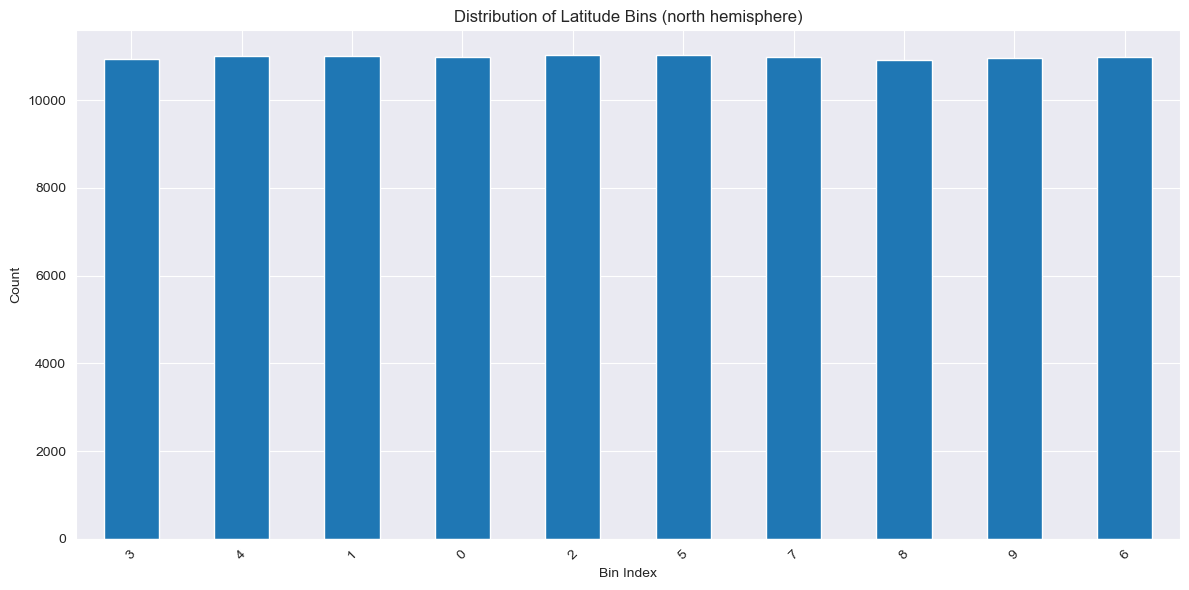


North Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.236775      0.217912         0.217860
1        Random Forest  0.266457      0.257688         0.257668
2                  KNN  0.230447      0.227632         0.227619
3        Decision Tree  0.244378      0.233643         0.233635

Training South Hemisphere Models...

Training Logistic Regression...


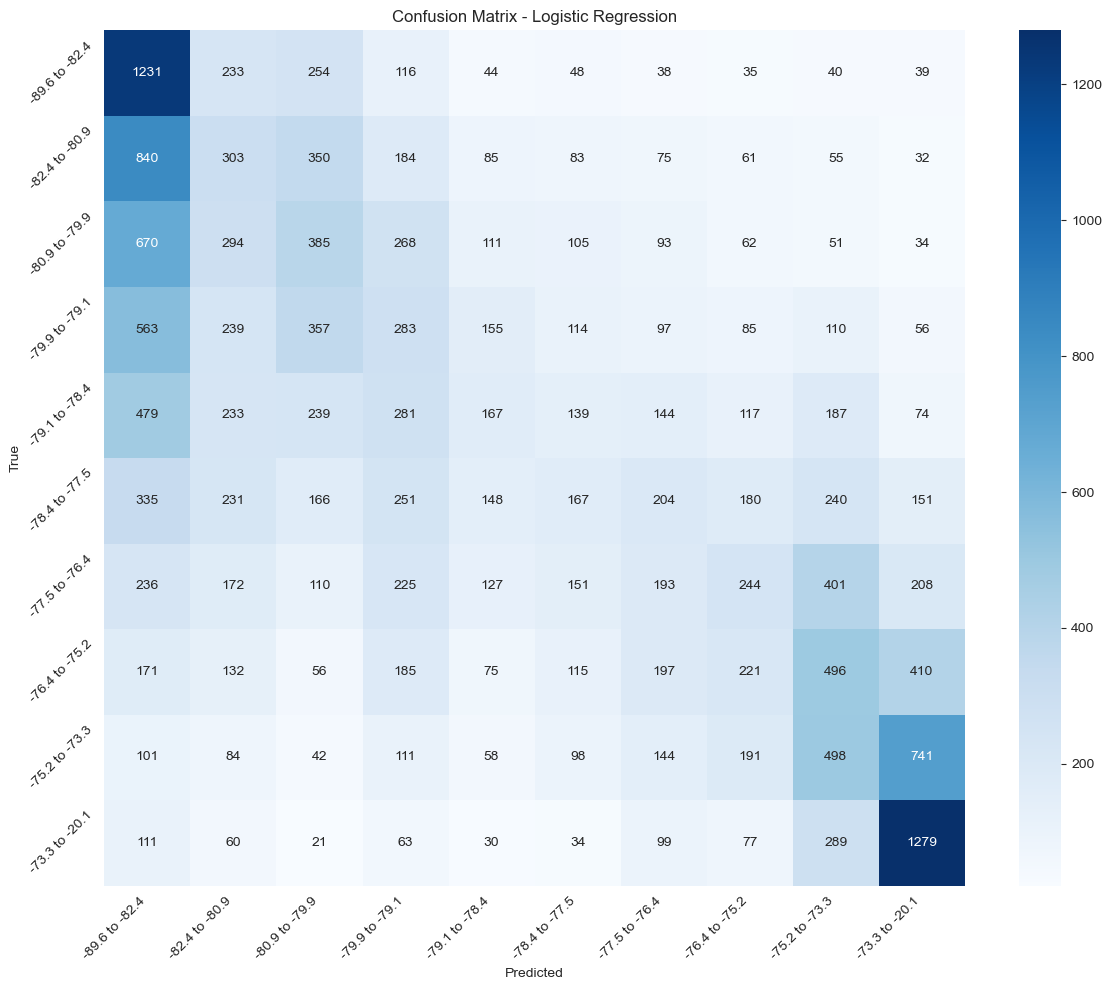

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -82.4       0.26      0.59      0.36      2078
-82.4 to -80.9       0.15      0.15      0.15      2068
-80.9 to -79.9       0.19      0.19      0.19      2073
-79.9 to -79.1       0.14      0.14      0.14      2059
-79.1 to -78.4       0.17      0.08      0.11      2060
-78.4 to -77.5       0.16      0.08      0.11      2073
-77.5 to -76.4       0.15      0.09      0.12      2067
-76.4 to -75.2       0.17      0.11      0.13      2058
-75.2 to -73.3       0.21      0.24      0.22      2068
-73.3 to -20.1       0.42      0.62      0.50      2063

      accuracy                           0.23     20667
     macro avg       0.20      0.23      0.20     20667
  weighted avg       0.20      0.23      0.20     20667


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


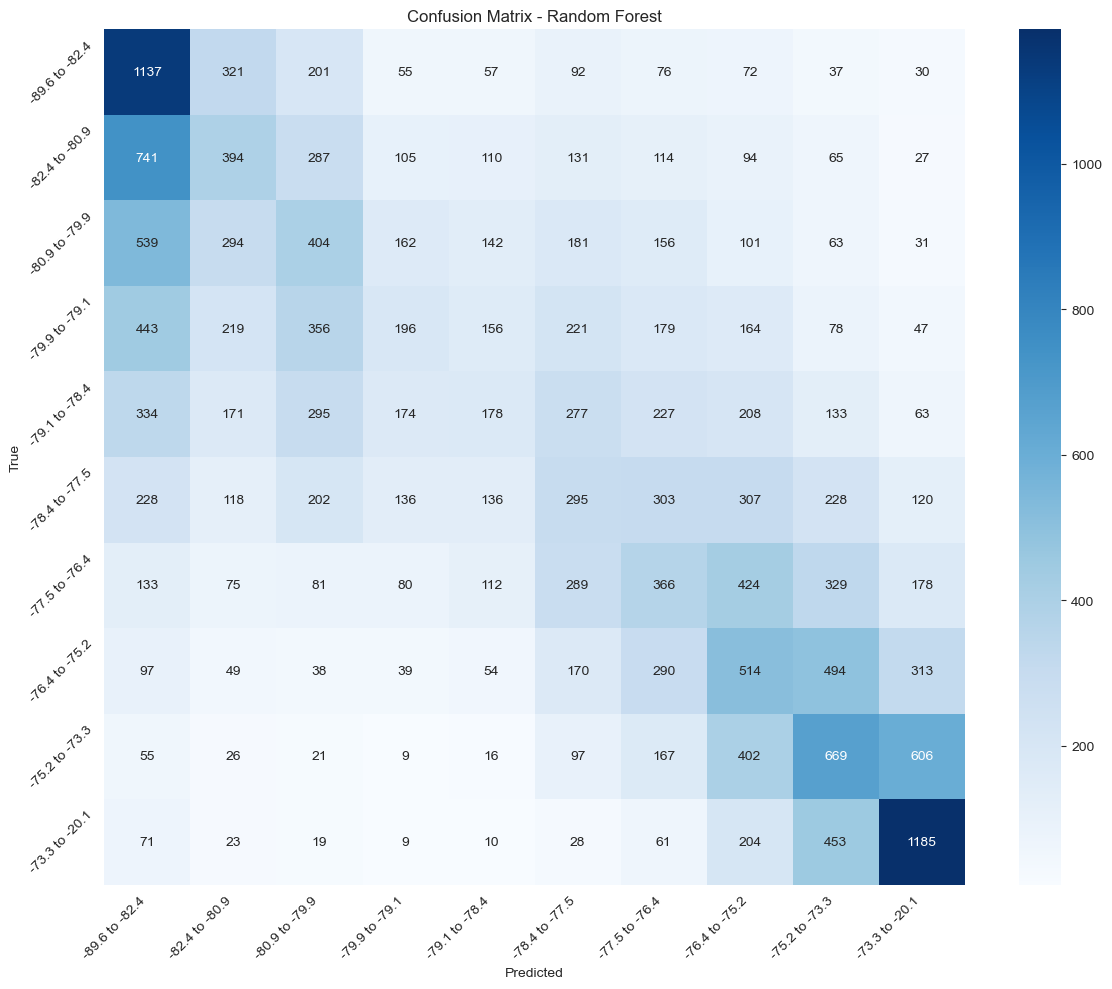

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -82.4       0.30      0.55      0.39      2078
-82.4 to -80.9       0.23      0.19      0.21      2068
-80.9 to -79.9       0.21      0.19      0.20      2073
-79.9 to -79.1       0.20      0.10      0.13      2059
-79.1 to -78.4       0.18      0.09      0.12      2060
-78.4 to -77.5       0.17      0.14      0.15      2073
-77.5 to -76.4       0.19      0.18      0.18      2067
-76.4 to -75.2       0.21      0.25      0.23      2058
-75.2 to -73.3       0.26      0.32      0.29      2068
-73.3 to -20.1       0.46      0.57      0.51      2063

      accuracy                           0.26     20667
     macro avg       0.24      0.26      0.24     20667
  weighted avg       0.24      0.26      0.24     20667


Training KNN...


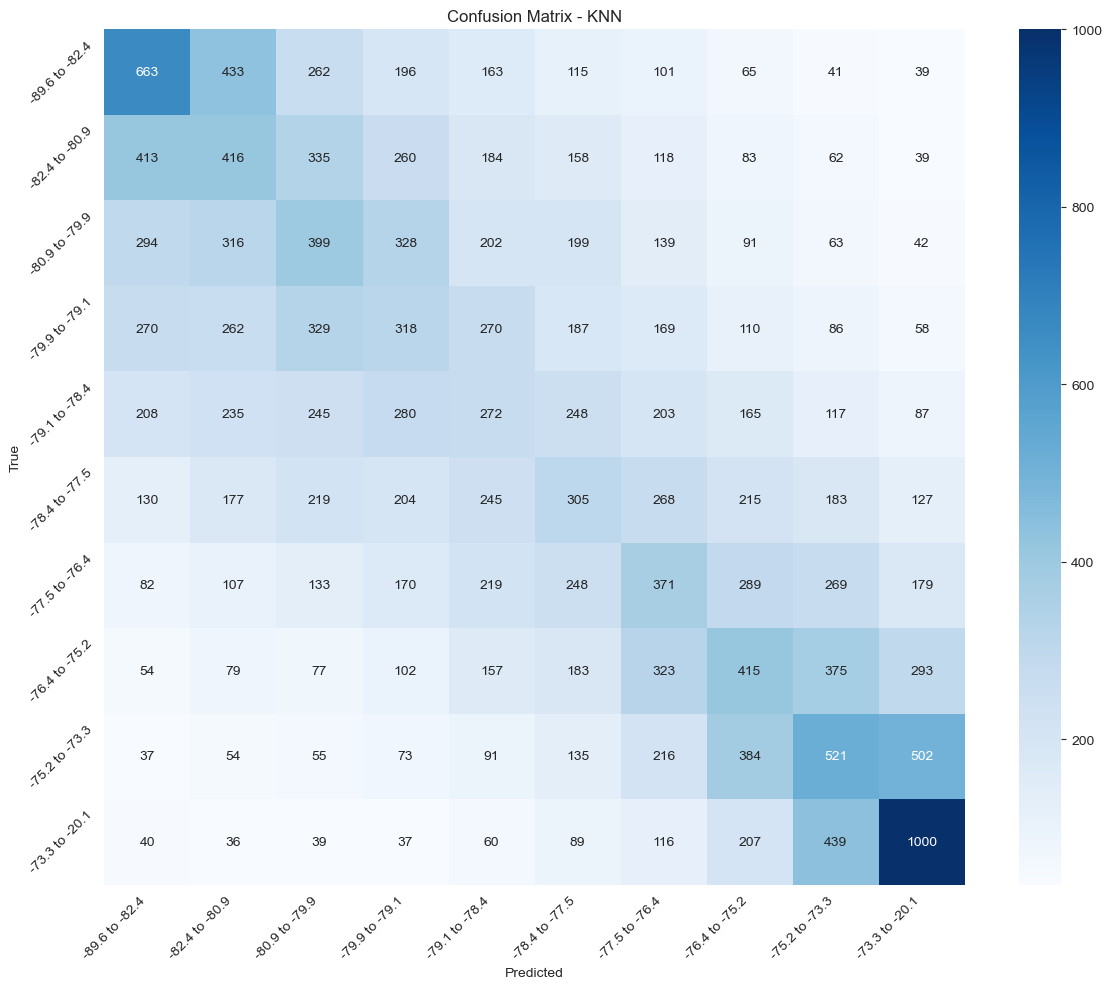

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -82.4       0.30      0.32      0.31      2078
-82.4 to -80.9       0.20      0.20      0.20      2068
-80.9 to -79.9       0.19      0.19      0.19      2073
-79.9 to -79.1       0.16      0.15      0.16      2059
-79.1 to -78.4       0.15      0.13      0.14      2060
-78.4 to -77.5       0.16      0.15      0.15      2073
-77.5 to -76.4       0.18      0.18      0.18      2067
-76.4 to -75.2       0.21      0.20      0.20      2058
-75.2 to -73.3       0.24      0.25      0.25      2068
-73.3 to -20.1       0.42      0.48      0.45      2063

      accuracy                           0.23     20667
     macro avg       0.22      0.23      0.22     20667
  weighted avg       0.22      0.23      0.22     20667


Training Decision Tree...


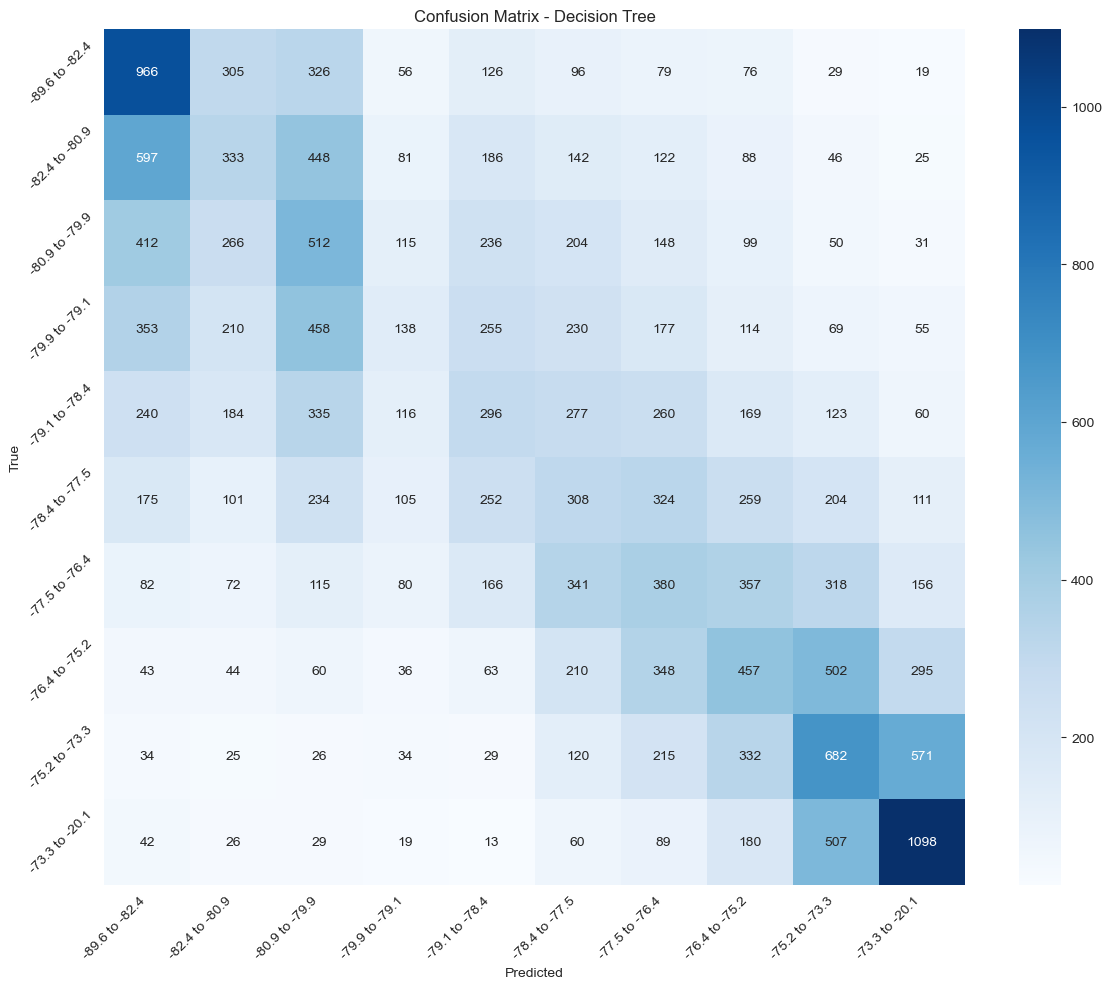

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -82.4       0.33      0.46      0.38      2078
-82.4 to -80.9       0.21      0.16      0.18      2068
-80.9 to -79.9       0.20      0.25      0.22      2073
-79.9 to -79.1       0.18      0.07      0.10      2059
-79.1 to -78.4       0.18      0.14      0.16      2060
-78.4 to -77.5       0.15      0.15      0.15      2073
-77.5 to -76.4       0.18      0.18      0.18      2067
-76.4 to -75.2       0.21      0.22      0.22      2058
-75.2 to -73.3       0.27      0.33      0.30      2068
-73.3 to -20.1       0.45      0.53      0.49      2063

      accuracy                           0.25     20667
     macro avg       0.24      0.25      0.24     20667
  weighted avg       0.24      0.25      0.24     20667



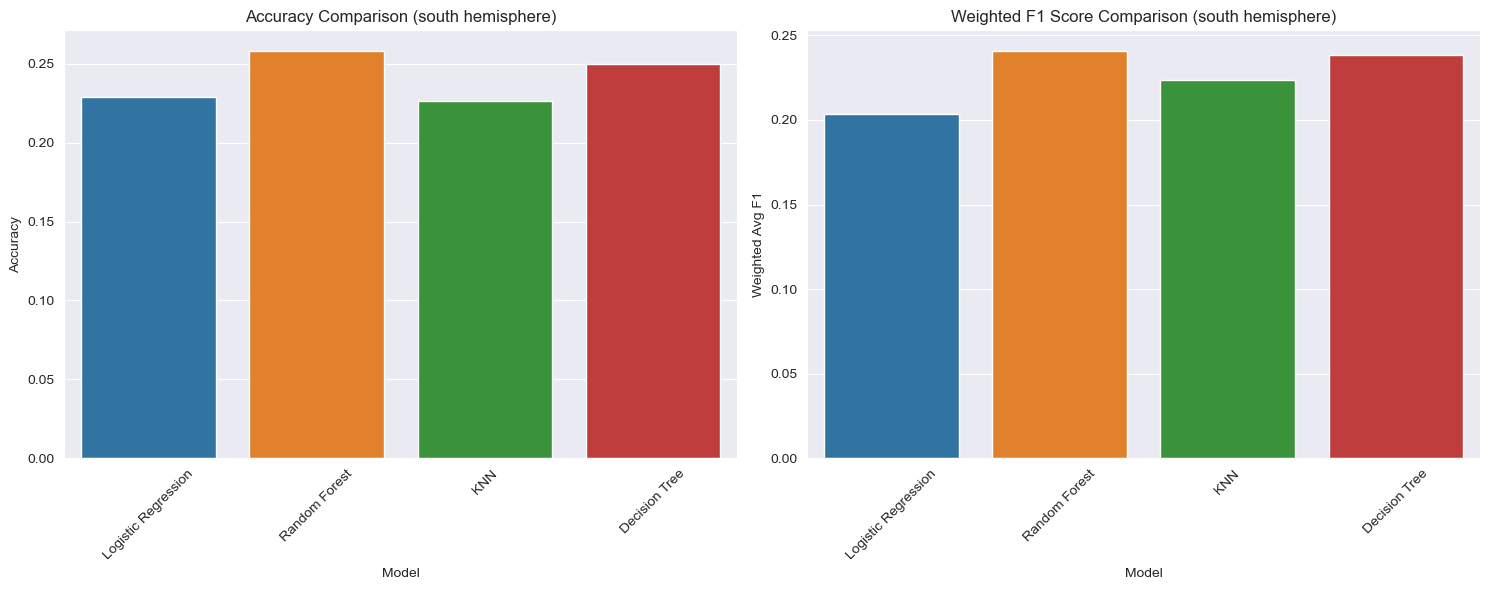

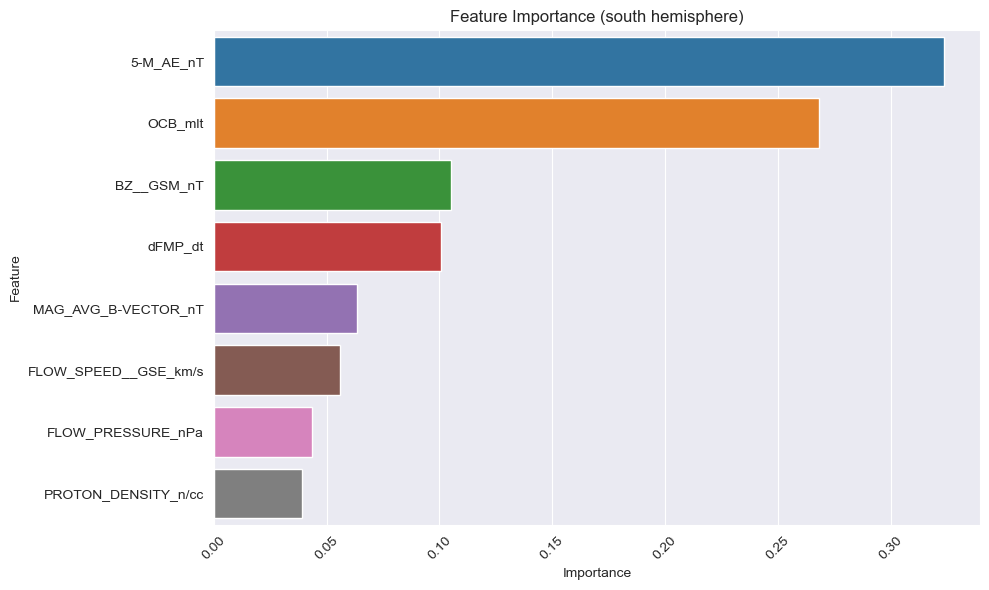

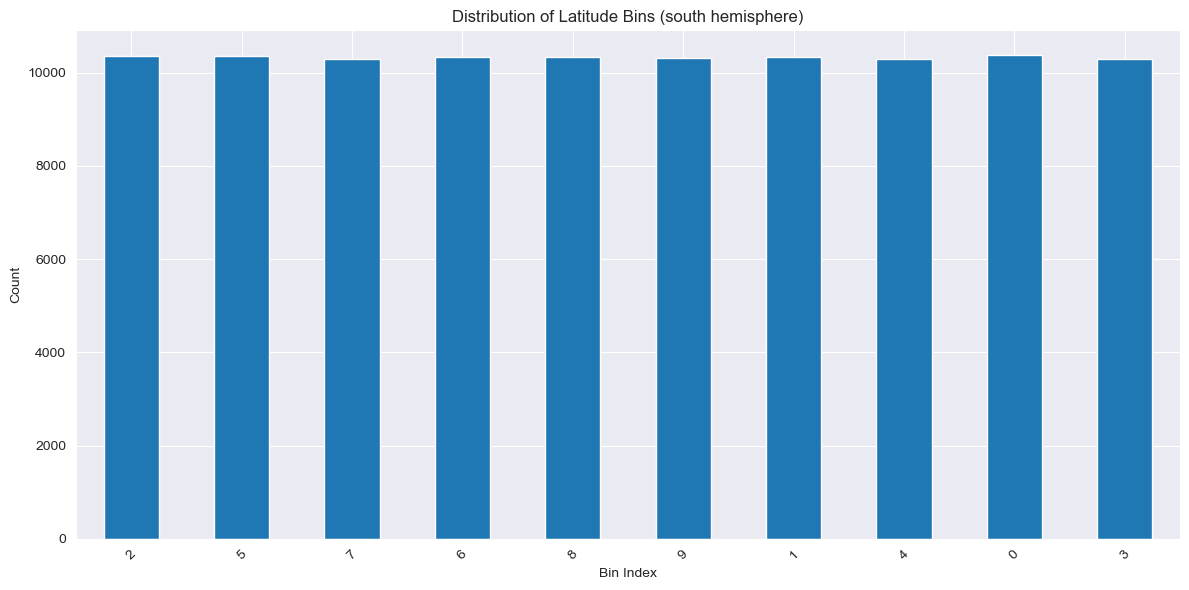


South Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.228722      0.203277         0.203357
1        Random Forest  0.258286      0.240816         0.240898
2                  KNN  0.226448      0.223545         0.223581
3        Decision Tree  0.250157      0.238465         0.238554

Predictions for example input (North):
Logistic Regression: 82.2 to 89.9
Random Forest: 75.8 to 76.7
KNN: 76.7 to 77.7
Decision Tree: 75.8 to 76.7


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_latitude_bins(y, n_bins=10):
    """
    Create latitude bins with approximately equal number of samples in each bin
    """
    # Get bin edges using quantiles
    _, bin_edges = pd.qcut(y, q=n_bins, retbins=True, duplicates='drop')
    
    # Create bin labels
    bin_labels = [f"{bin_edges[i]:.1f} to {bin_edges[i+1]:.1f}" 
                 for i in range(len(bin_edges)-1)]
    
    # Assign data points to bins
    bins = pd.cut(y, bins=bin_edges, labels=False, include_lowest=True)
    
    return bins, bin_labels, bin_edges

def evaluate_classifier(y_true, y_pred, model_name):
    """Calculate and return evaluation metrics for a classification model"""
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Macro Avg F1': report['macro avg']['f1-score'],
        'Weighted Avg F1': report['weighted avg']['f1-score']
    }

def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    """Plot confusion matrix for the classifier"""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def train_classification_models(df, hemisphere='north', n_bins=10):
    """
    Train and evaluate multiple classification models
    """
    features = [
        'OCB_mlt', 'MAG_AVG_B-VECTOR_nT', 'BZ__GSM_nT', 'FLOW_SPEED__GSE_km/s',
        'PROTON_DENSITY_n/cc', 'FLOW_PRESSURE_nPa', '5-M_AE_nT', 'dFMP_dt'
    ]
    target = 'OCB_mlat'
    
    # Prepare data
    df = df.dropna(subset=features + [target])
    X = df[features]
    y = df[target]
    
    # Create bins for latitude values
    y_binned, bin_labels, bin_edges = create_latitude_bins(y, n_bins)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binned, test_size=0.2, random_state=42, stratify=y_binned
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models with hyperparameter grids
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'C': [0.1, 1.0, 10.0],
                'solver': ['lbfgs', 'liblinear']
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5]
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(random_state=42),
            'params': {
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5]
            }
        }
    }
    
    # Train and evaluate models
    results = []
    trained_models = {}
    
    for name, config in models.items():
        print(f"\nTraining {name}...")
        
        # Perform GridSearchCV
        grid_search = GridSearchCV(
            config['model'],
            config['params'],
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
        
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        trained_models[name] = best_model
        
        # Make predictions
        y_pred = best_model.predict(X_test_scaled)
        
        # Calculate metrics
        metrics = evaluate_classifier(y_test, y_pred, name)
        results.append(metrics)
        
        # Plot confusion matrix
        plot_confusion_matrix(y_test, y_pred, bin_labels, name)
        
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=bin_labels))
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Plot model performance comparisons
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    sns.barplot(x='Model', y='Accuracy', data=results_df)
    plt.xticks(rotation=45)
    plt.title(f'Accuracy Comparison ({hemisphere} hemisphere)')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='Model', y='Weighted Avg F1', data=results_df)
    plt.xticks(rotation=45)
    plt.title(f'Weighted F1 Score Comparison ({hemisphere} hemisphere)')
    
    plt.tight_layout()
    plt.show()
    
    # Analyze feature importance for Random Forest
    rf_model = trained_models['Random Forest']
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance ({hemisphere} hemisphere)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Plot distribution of bins
    plt.figure(figsize=(12, 6))
    pd.Series(y_binned).value_counts(sort=False).plot(kind='bar')
    plt.title(f'Distribution of Latitude Bins ({hemisphere} hemisphere)')
    plt.xlabel('Bin Index')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return results_df, trained_models, scaler, bin_edges, bin_labels

def predict_class_with_all_models(input_data, models, scaler, bin_edges, bin_labels):
    """Make classification predictions using all trained models"""
    scaled_input = scaler.transform(input_data)
    predictions = {}
    
    for name, model in models.items():
        pred_bin = model.predict(scaled_input)[0]
        predictions[name] = bin_labels[pred_bin]
        
    return predictions

# Example usage
print("Training North Hemisphere Models...")
north_results, north_models, north_scaler, north_edges, north_labels = train_classification_models(
    daysideN_df, 'north', n_bins=10
)
print("\nNorth Hemisphere Results:")
print(north_results)

print("\nTraining South Hemisphere Models...")
south_results, south_models, south_scaler, south_edges, south_labels = train_classification_models(
    daysideS_df, 'south', n_bins=10
)
print("\nSouth Hemisphere Results:")
print(south_results)

# Example prediction
example_input = daysideN_df[features].iloc[[0]]
north_predictions = predict_class_with_all_models(
    example_input, north_models, north_scaler, north_edges, north_labels
)
print("\nPredictions for example input (North):")
for model_name, pred in north_predictions.items():
    print(f"{model_name}: {pred}")

Training North Hemisphere Models...

Training Logistic Regression...


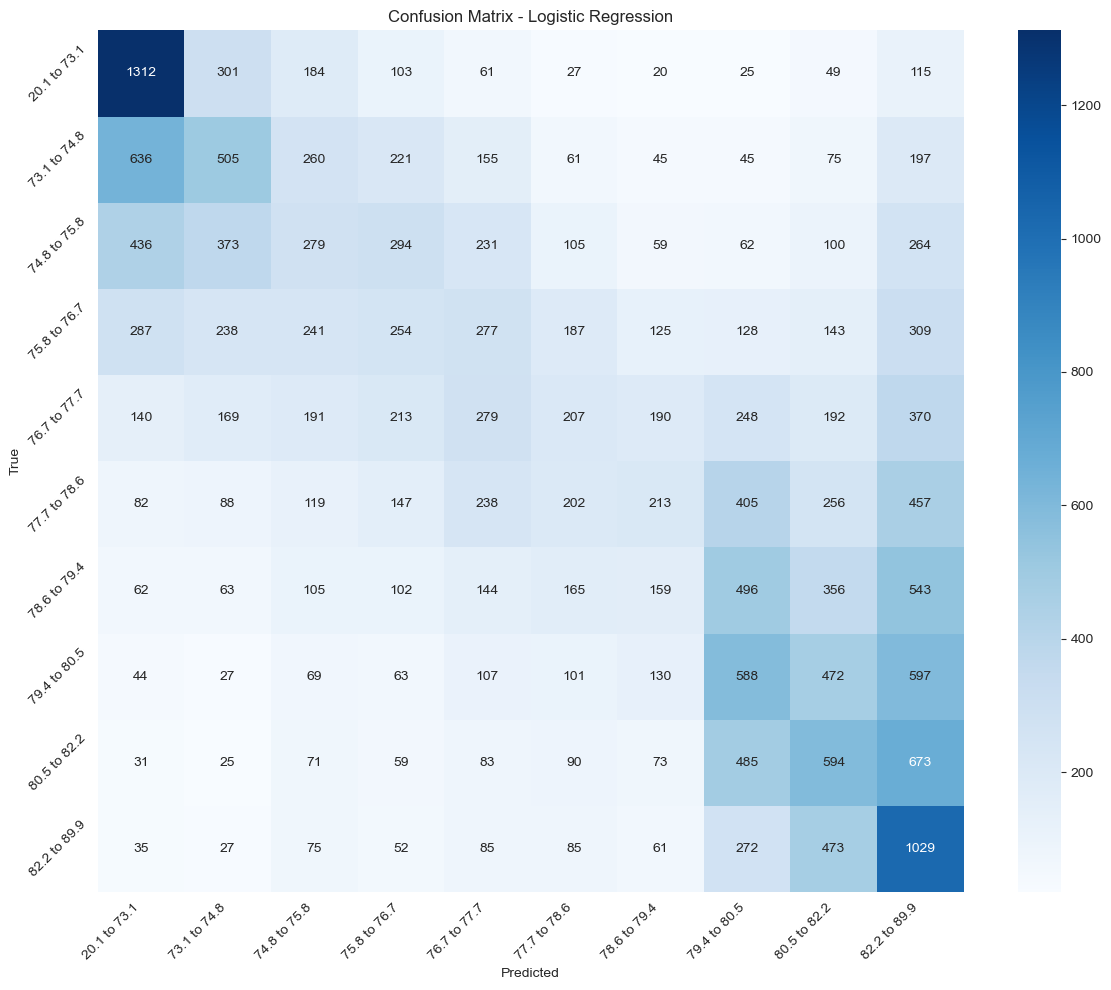

Best parameters for Logistic Regression: {'C': 1.0, 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

20.1 to 73.1       0.43      0.60      0.50      2197
73.1 to 74.8       0.28      0.23      0.25      2200
74.8 to 75.8       0.18      0.13      0.15      2203
75.8 to 76.7       0.17      0.12      0.14      2189
76.7 to 77.7       0.17      0.13      0.14      2199
77.7 to 78.6       0.16      0.09      0.12      2207
78.6 to 79.4       0.15      0.07      0.10      2195
79.4 to 80.5       0.21      0.27      0.24      2198
80.5 to 82.2       0.22      0.27      0.24      2184
82.2 to 89.9       0.23      0.47      0.30      2194

    accuracy                           0.24     21966
   macro avg       0.22      0.24      0.22     21966
weighted avg       0.22      0.24      0.22     21966


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


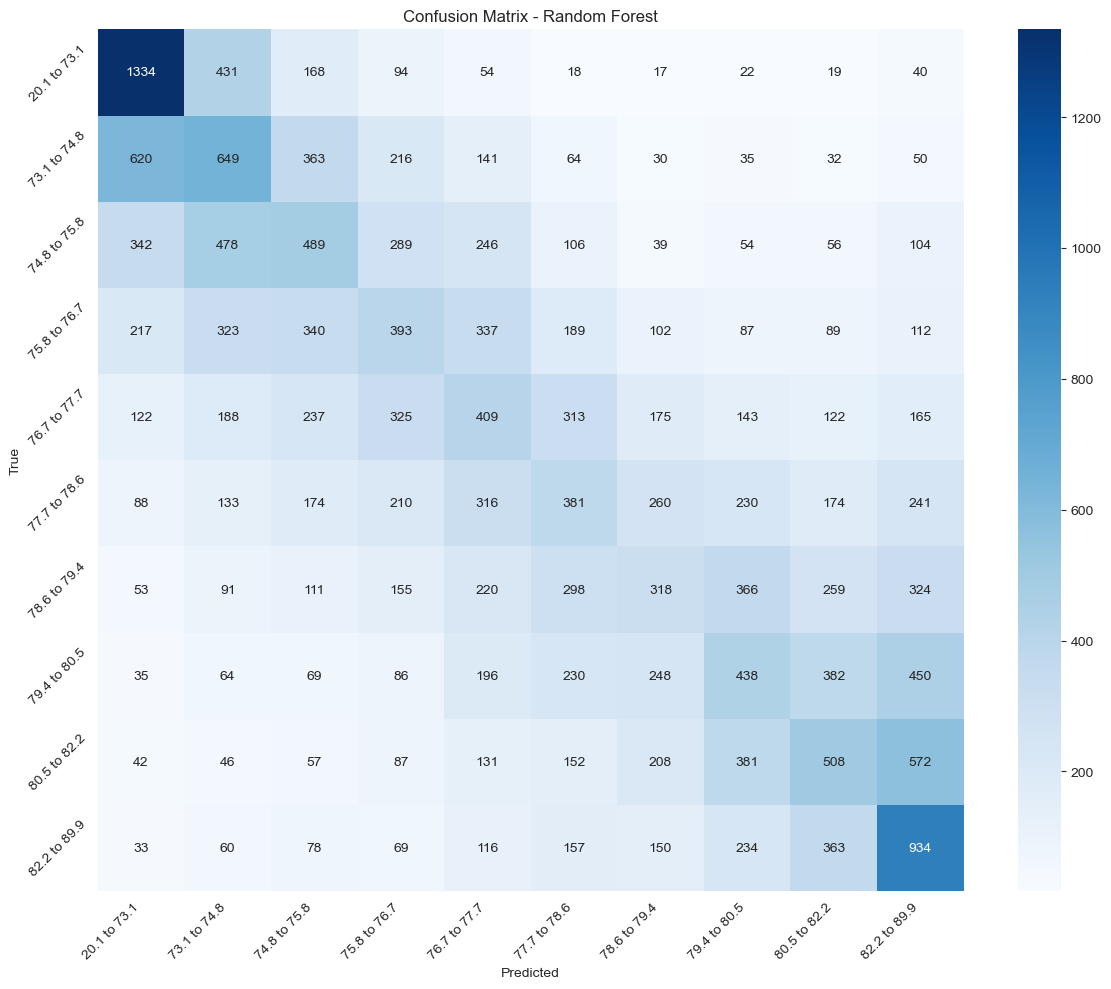

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

20.1 to 73.1       0.46      0.61      0.52      2197
73.1 to 74.8       0.26      0.29      0.28      2200
74.8 to 75.8       0.23      0.22      0.23      2203
75.8 to 76.7       0.20      0.18      0.19      2189
76.7 to 77.7       0.19      0.19      0.19      2199
77.7 to 78.6       0.20      0.17      0.19      2207
78.6 to 79.4       0.21      0.14      0.17      2195
79.4 to 80.5       0.22      0.20      0.21      2198
80.5 to 82.2       0.25      0.23      0.24      2184
82.2 to 89.9       0.31      0.43      0.36      2194

    accuracy                           0.27     21966
   macro avg       0.25      0.27      0.26     21966
weighted avg       0.25      0.27      0.26     21966


Training KNN...


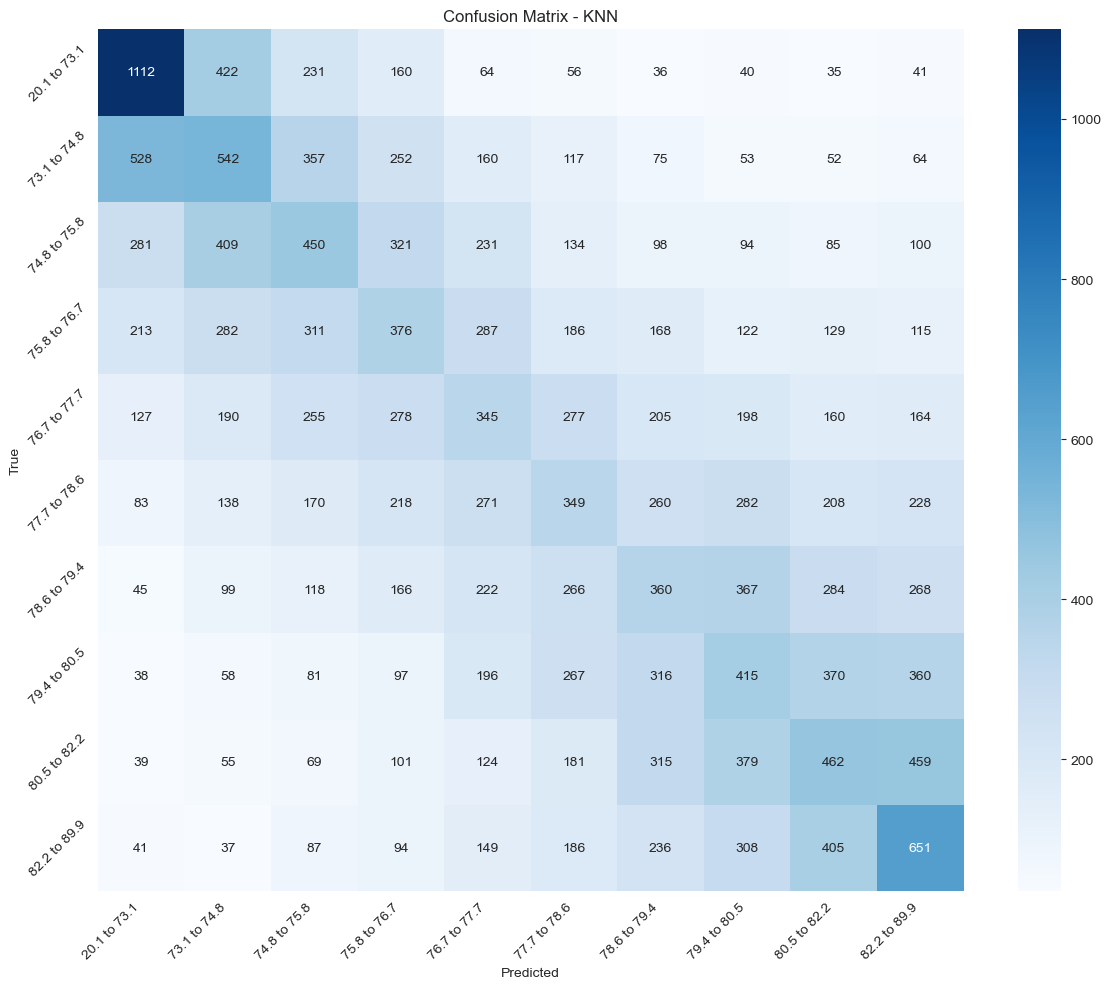

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
              precision    recall  f1-score   support

20.1 to 73.1       0.44      0.51      0.47      2197
73.1 to 74.8       0.24      0.25      0.24      2200
74.8 to 75.8       0.21      0.20      0.21      2203
75.8 to 76.7       0.18      0.17      0.18      2189
76.7 to 77.7       0.17      0.16      0.16      2199
77.7 to 78.6       0.17      0.16      0.17      2207
78.6 to 79.4       0.17      0.16      0.17      2195
79.4 to 80.5       0.18      0.19      0.19      2198
80.5 to 82.2       0.21      0.21      0.21      2184
82.2 to 89.9       0.27      0.30      0.28      2194

    accuracy                           0.23     21966
   macro avg       0.23      0.23      0.23     21966
weighted avg       0.23      0.23      0.23     21966


Training Decision Tree...


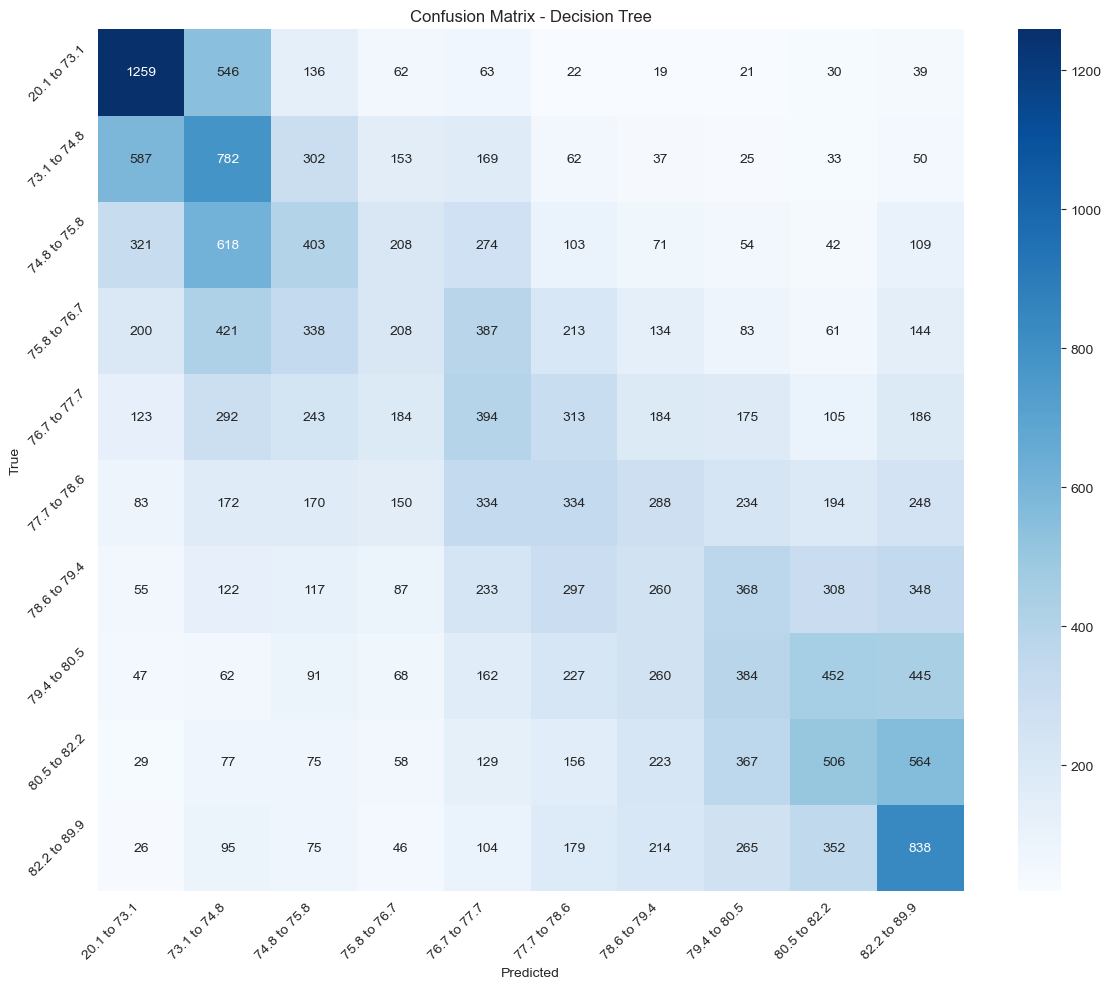

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

20.1 to 73.1       0.46      0.57      0.51      2197
73.1 to 74.8       0.25      0.36      0.29      2200
74.8 to 75.8       0.21      0.18      0.19      2203
75.8 to 76.7       0.17      0.10      0.12      2189
76.7 to 77.7       0.18      0.18      0.18      2199
77.7 to 78.6       0.18      0.15      0.16      2207
78.6 to 79.4       0.15      0.12      0.13      2195
79.4 to 80.5       0.19      0.17      0.18      2198
80.5 to 82.2       0.24      0.23      0.24      2184
82.2 to 89.9       0.28      0.38      0.32      2194

    accuracy                           0.24     21966
   macro avg       0.23      0.24      0.23     21966
weighted avg       0.23      0.24      0.23     21966


Training Neural Network...
Epoch 1/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2025 - loss: 2.1925 - val_accuracy: 0.2377 

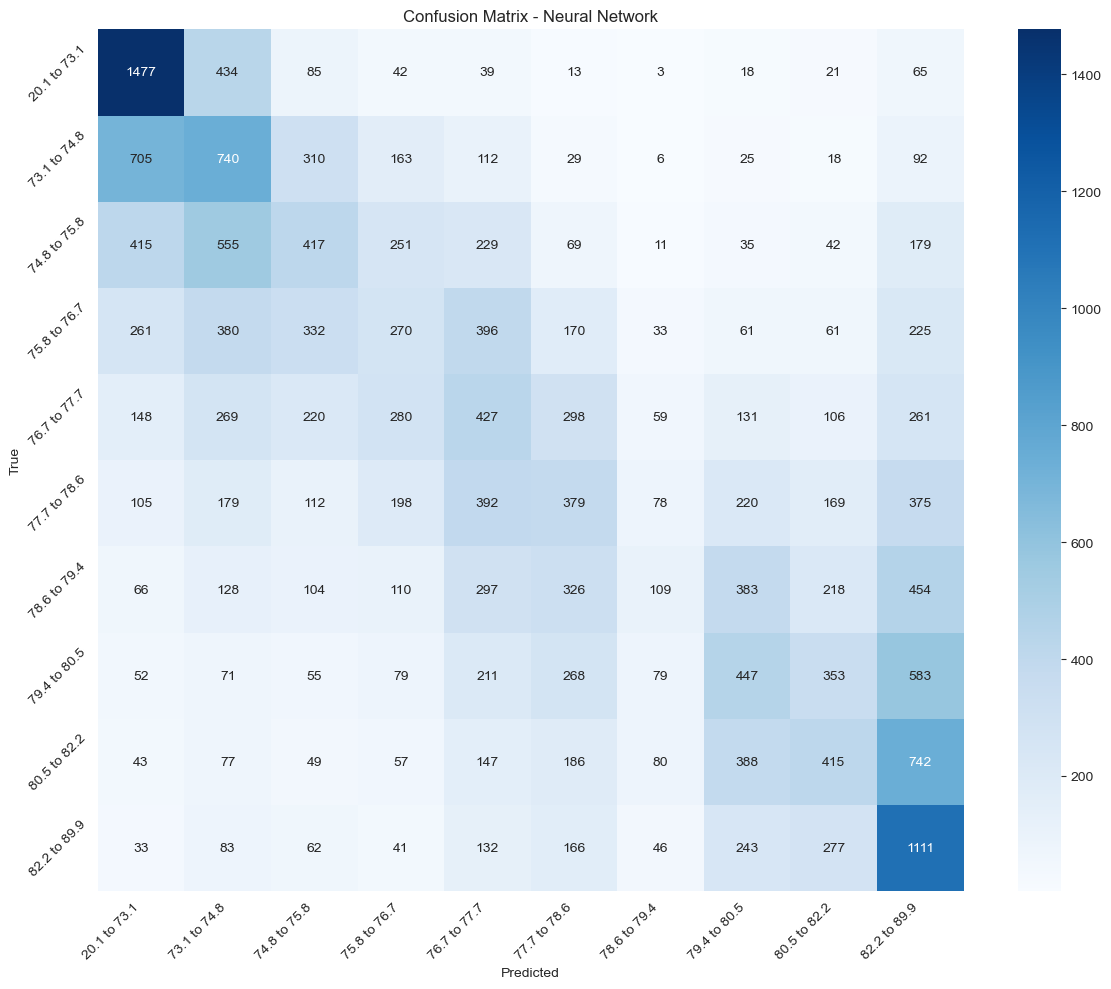


Neural Network Classification Report:
              precision    recall  f1-score   support

20.1 to 73.1       0.45      0.67      0.54      2197
73.1 to 74.8       0.25      0.34      0.29      2200
74.8 to 75.8       0.24      0.19      0.21      2203
75.8 to 76.7       0.18      0.12      0.15      2189
76.7 to 77.7       0.18      0.19      0.19      2199
77.7 to 78.6       0.20      0.17      0.18      2207
78.6 to 79.4       0.22      0.05      0.08      2195
79.4 to 80.5       0.23      0.20      0.22      2198
80.5 to 82.2       0.25      0.19      0.21      2184
82.2 to 89.9       0.27      0.51      0.35      2194

    accuracy                           0.26     21966
   macro avg       0.25      0.26      0.24     21966
weighted avg       0.25      0.26      0.24     21966



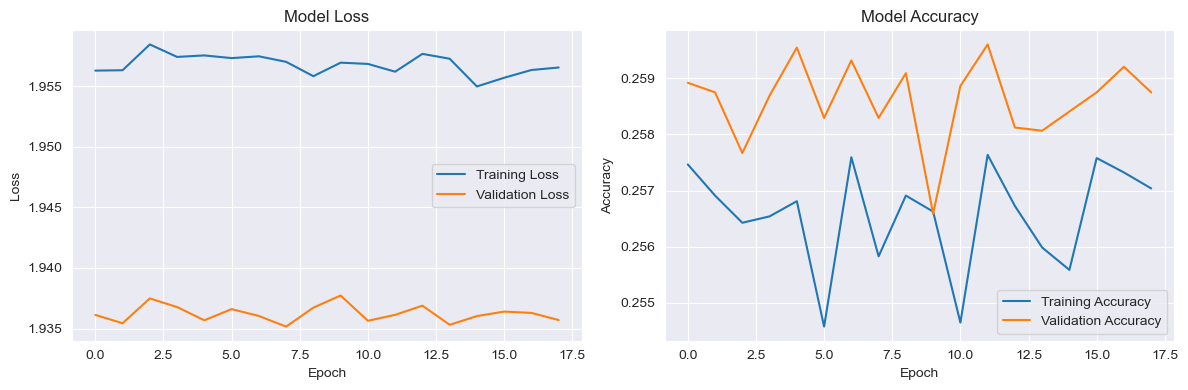

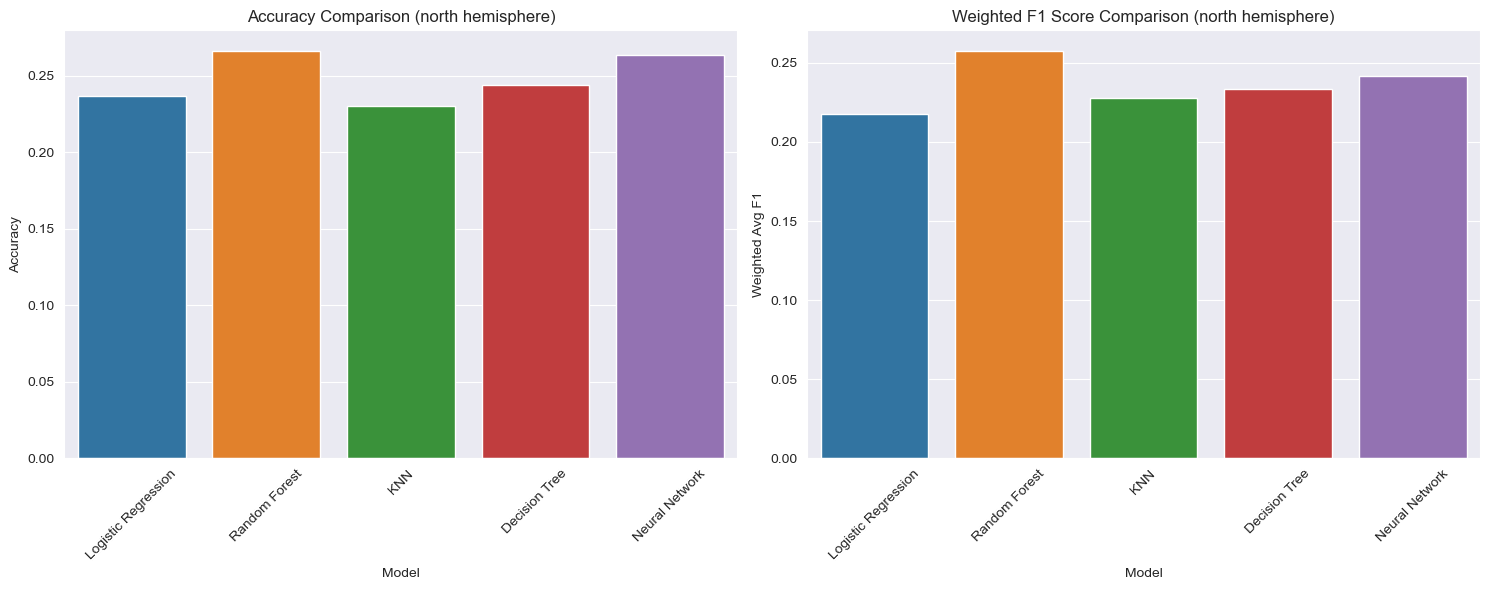


North Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.236775      0.217912         0.217860
1        Random Forest  0.266457      0.257688         0.257668
2                  KNN  0.230447      0.227632         0.227619
3        Decision Tree  0.244378      0.233643         0.233635
4       Neural Network  0.263680      0.241973         0.241989

Training South Hemisphere Models...

Training Logistic Regression...


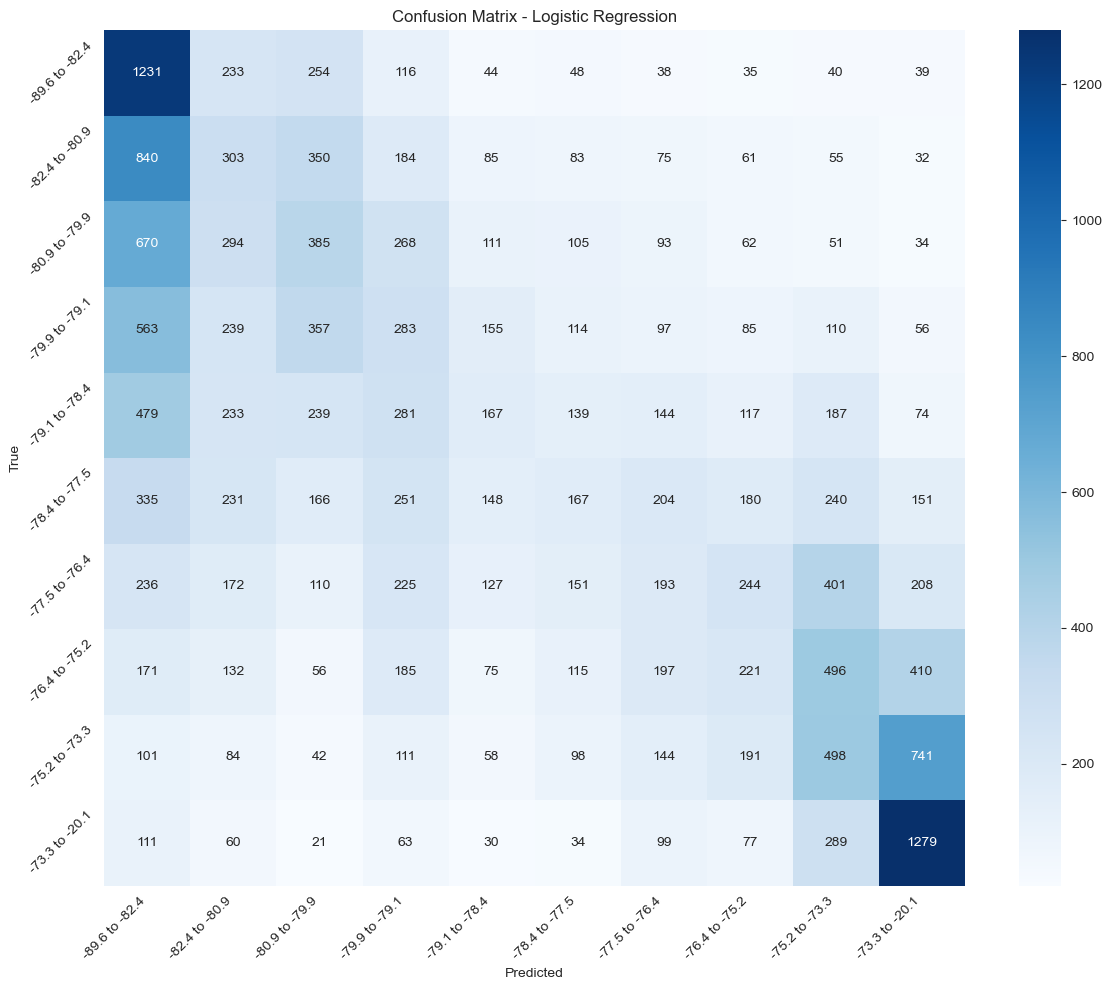

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -82.4       0.26      0.59      0.36      2078
-82.4 to -80.9       0.15      0.15      0.15      2068
-80.9 to -79.9       0.19      0.19      0.19      2073
-79.9 to -79.1       0.14      0.14      0.14      2059
-79.1 to -78.4       0.17      0.08      0.11      2060
-78.4 to -77.5       0.16      0.08      0.11      2073
-77.5 to -76.4       0.15      0.09      0.12      2067
-76.4 to -75.2       0.17      0.11      0.13      2058
-75.2 to -73.3       0.21      0.24      0.22      2068
-73.3 to -20.1       0.42      0.62      0.50      2063

      accuracy                           0.23     20667
     macro avg       0.20      0.23      0.20     20667
  weighted avg       0.20      0.23      0.20     20667


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


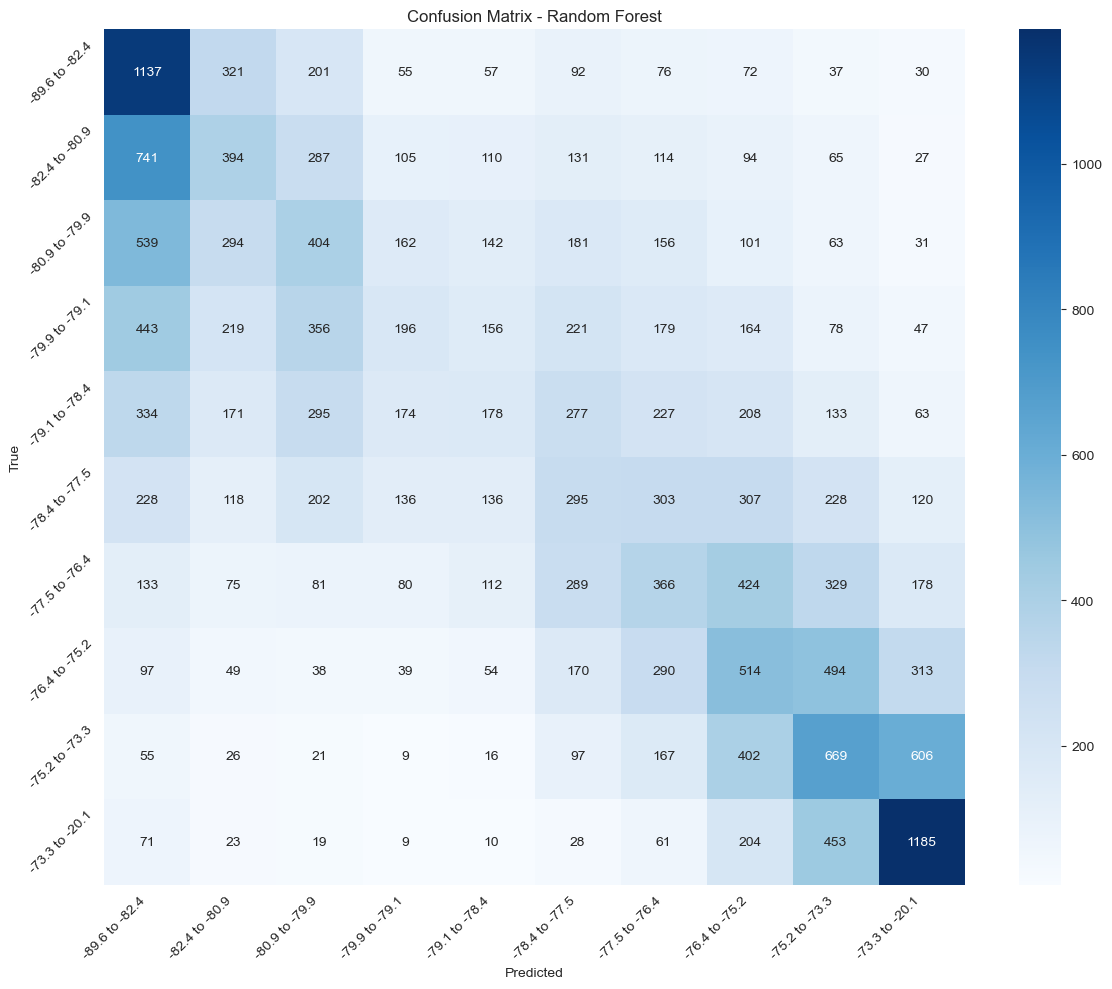

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -82.4       0.30      0.55      0.39      2078
-82.4 to -80.9       0.23      0.19      0.21      2068
-80.9 to -79.9       0.21      0.19      0.20      2073
-79.9 to -79.1       0.20      0.10      0.13      2059
-79.1 to -78.4       0.18      0.09      0.12      2060
-78.4 to -77.5       0.17      0.14      0.15      2073
-77.5 to -76.4       0.19      0.18      0.18      2067
-76.4 to -75.2       0.21      0.25      0.23      2058
-75.2 to -73.3       0.26      0.32      0.29      2068
-73.3 to -20.1       0.46      0.57      0.51      2063

      accuracy                           0.26     20667
     macro avg       0.24      0.26      0.24     20667
  weighted avg       0.24      0.26      0.24     20667


Training KNN...


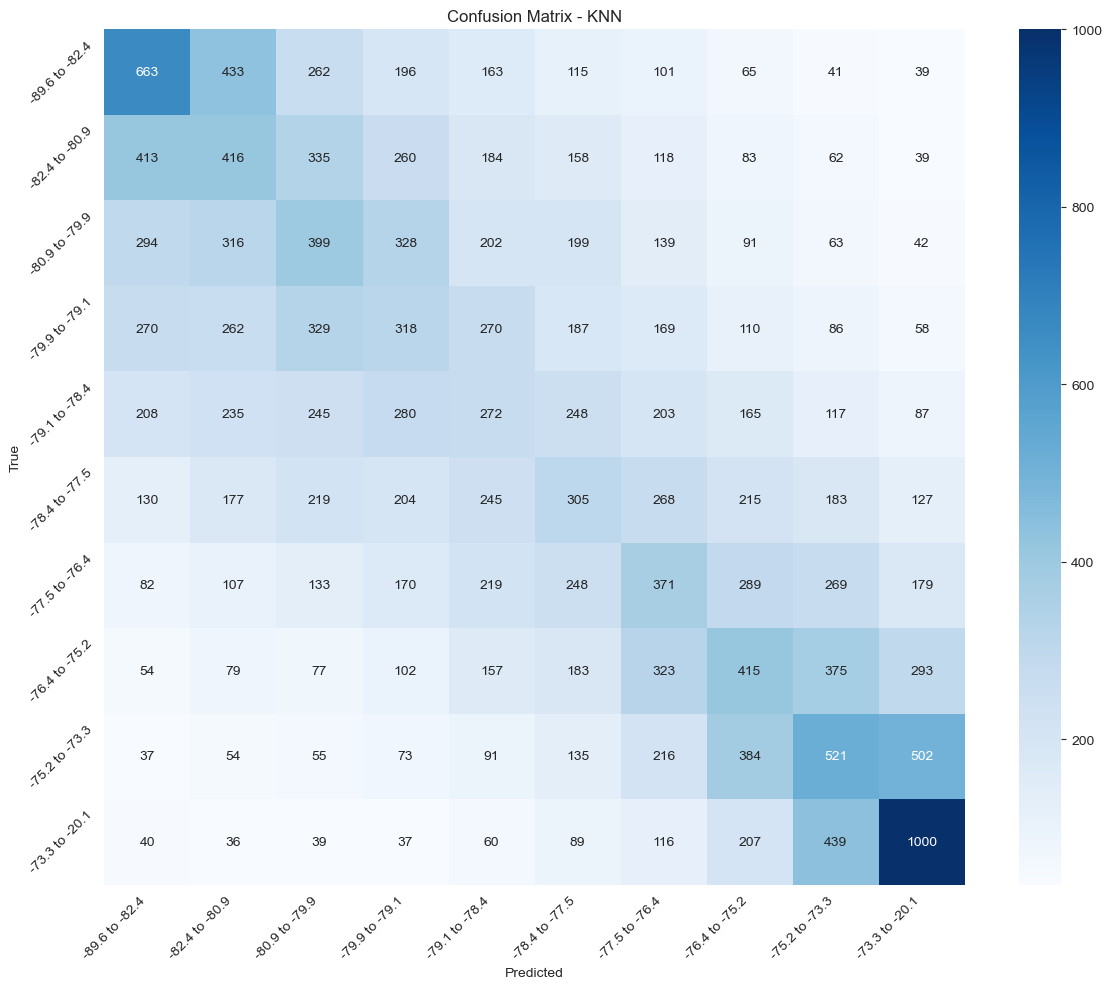

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -82.4       0.30      0.32      0.31      2078
-82.4 to -80.9       0.20      0.20      0.20      2068
-80.9 to -79.9       0.19      0.19      0.19      2073
-79.9 to -79.1       0.16      0.15      0.16      2059
-79.1 to -78.4       0.15      0.13      0.14      2060
-78.4 to -77.5       0.16      0.15      0.15      2073
-77.5 to -76.4       0.18      0.18      0.18      2067
-76.4 to -75.2       0.21      0.20      0.20      2058
-75.2 to -73.3       0.24      0.25      0.25      2068
-73.3 to -20.1       0.42      0.48      0.45      2063

      accuracy                           0.23     20667
     macro avg       0.22      0.23      0.22     20667
  weighted avg       0.22      0.23      0.22     20667


Training Decision Tree...


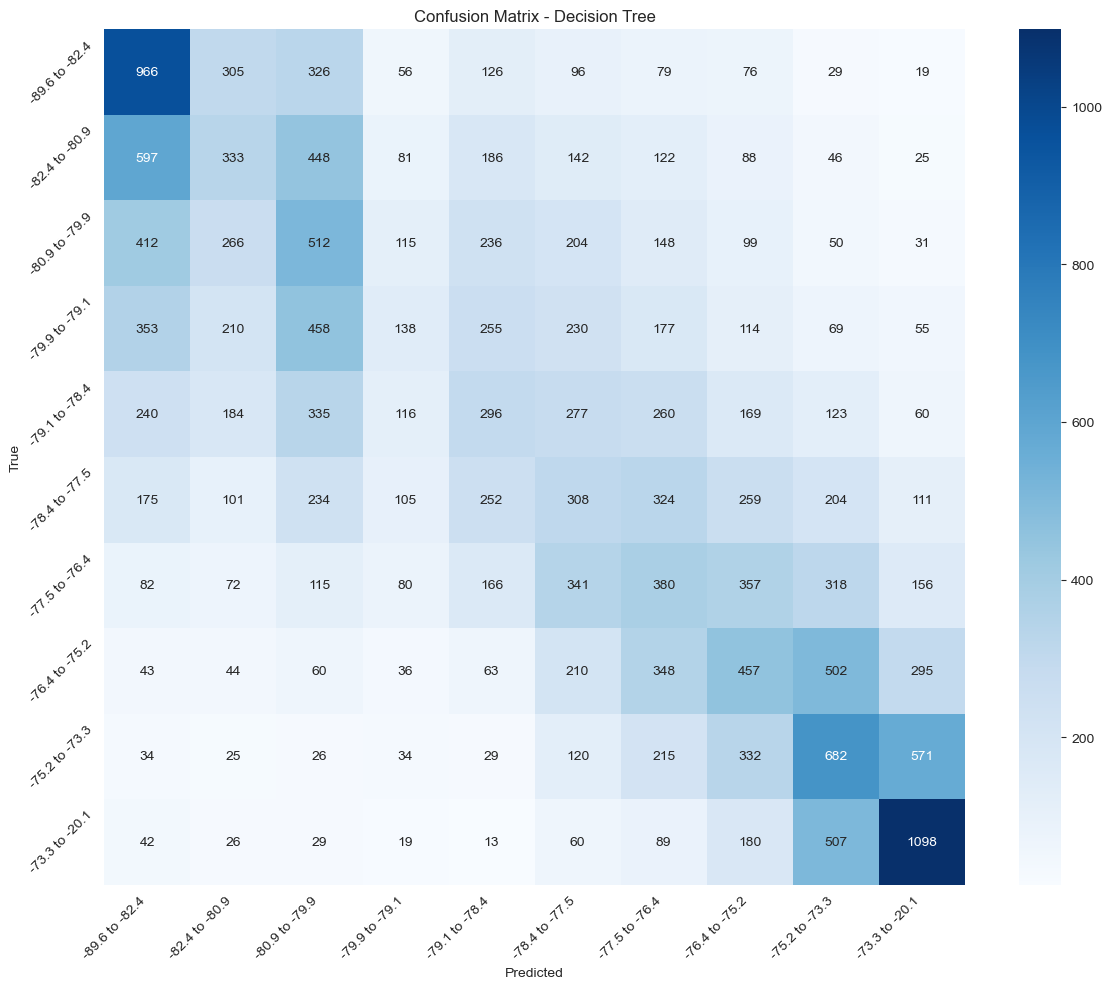

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -82.4       0.33      0.46      0.38      2078
-82.4 to -80.9       0.21      0.16      0.18      2068
-80.9 to -79.9       0.20      0.25      0.22      2073
-79.9 to -79.1       0.18      0.07      0.10      2059
-79.1 to -78.4       0.18      0.14      0.16      2060
-78.4 to -77.5       0.15      0.15      0.15      2073
-77.5 to -76.4       0.18      0.18      0.18      2067
-76.4 to -75.2       0.21      0.22      0.22      2058
-75.2 to -73.3       0.27      0.33      0.30      2068
-73.3 to -20.1       0.45      0.53      0.49      2063

      accuracy                           0.25     20667
     macro avg       0.24      0.25      0.24     20667
  weighted avg       0.24      0.25      0.24     20667


Training Neural Network...
Epoch 1/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1970 - loss: 2.

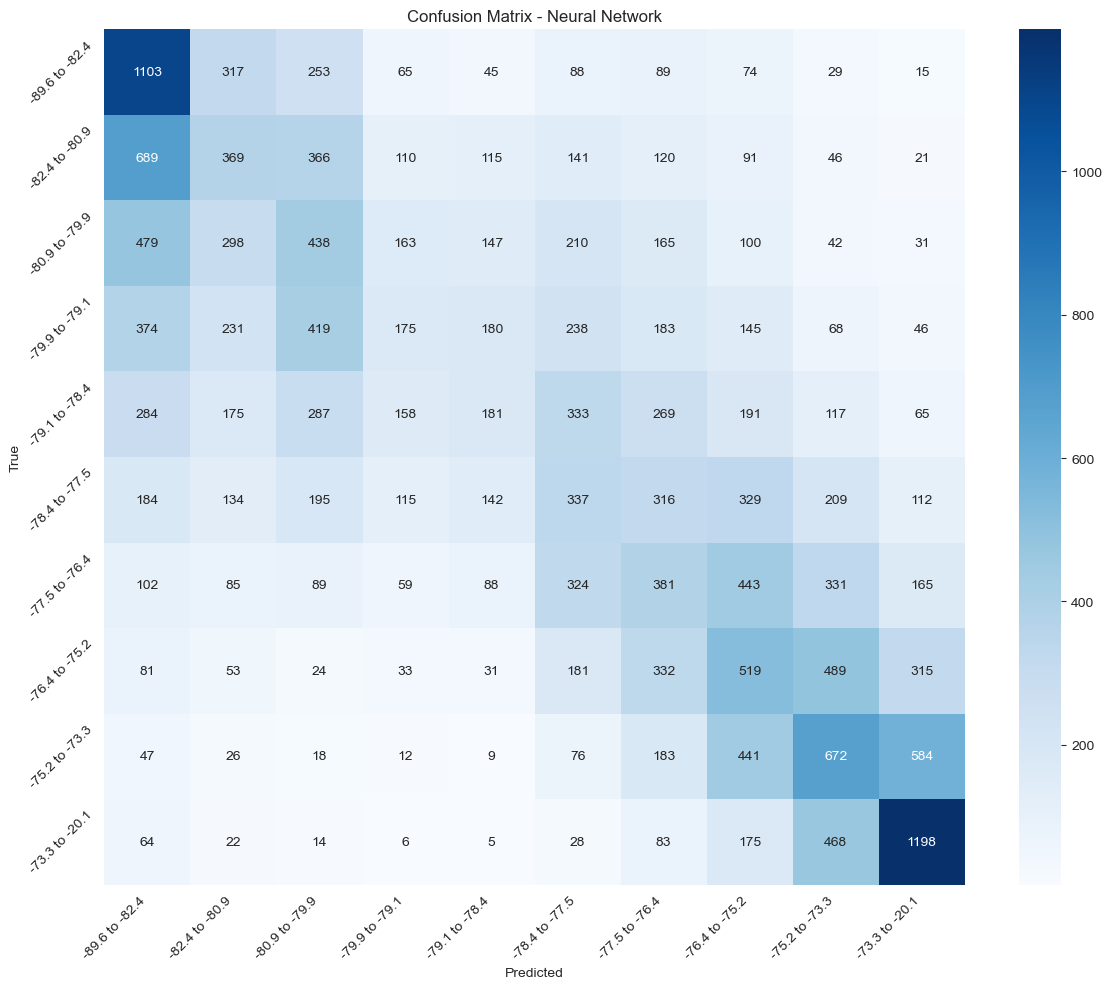


Neural Network Classification Report:
                precision    recall  f1-score   support

-89.6 to -82.4       0.32      0.53      0.40      2078
-82.4 to -80.9       0.22      0.18      0.20      2068
-80.9 to -79.9       0.21      0.21      0.21      2073
-79.9 to -79.1       0.20      0.08      0.12      2059
-79.1 to -78.4       0.19      0.09      0.12      2060
-78.4 to -77.5       0.17      0.16      0.17      2073
-77.5 to -76.4       0.18      0.18      0.18      2067
-76.4 to -75.2       0.21      0.25      0.23      2058
-75.2 to -73.3       0.27      0.32      0.30      2068
-73.3 to -20.1       0.47      0.58      0.52      2063

      accuracy                           0.26     20667
     macro avg       0.24      0.26      0.24     20667
  weighted avg       0.24      0.26      0.24     20667



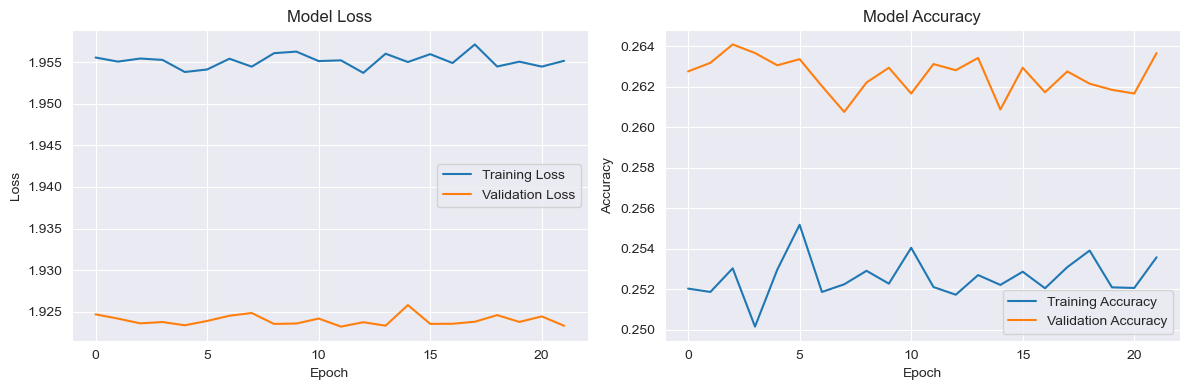

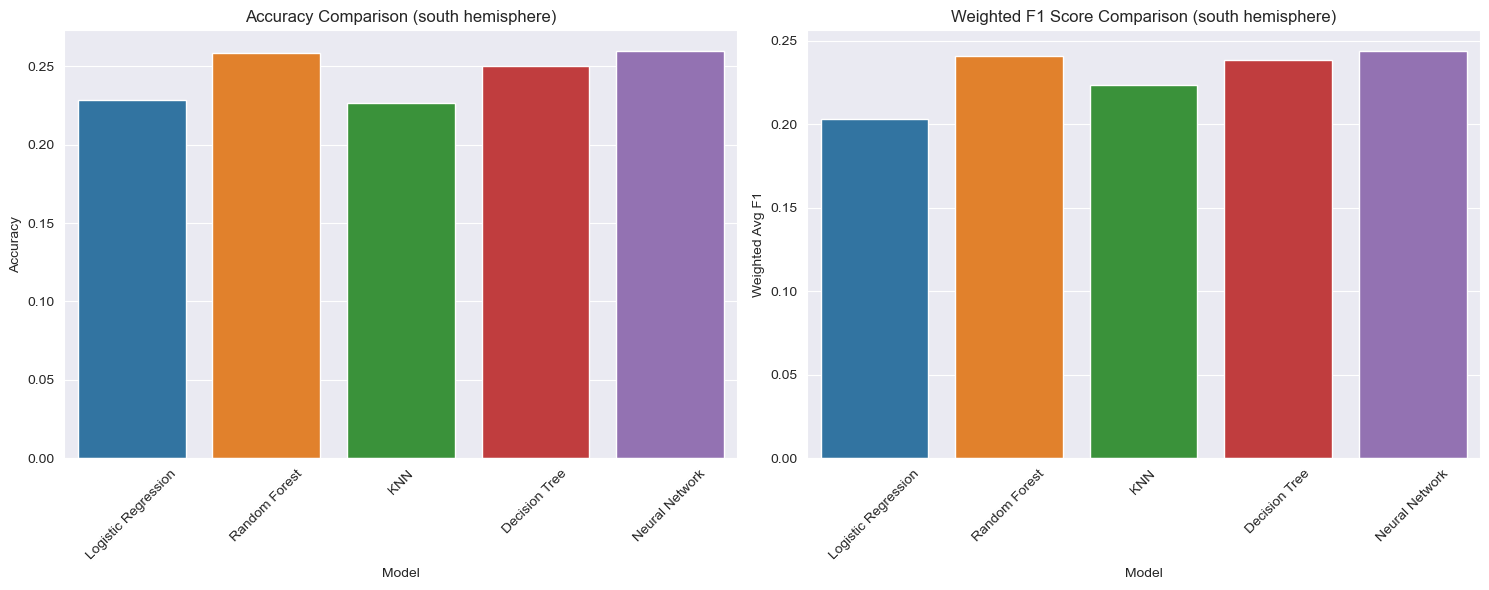


South Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.228722      0.203277         0.203357
1        Random Forest  0.258286      0.240816         0.240898
2                  KNN  0.226448      0.223545         0.223581
3        Decision Tree  0.250157      0.238465         0.238554
4       Neural Network  0.259980      0.243813         0.243910


In [11]:
def create_nn_classifier(input_shape, n_classes):
    """Create a robust neural network classifier
    
    Args:
        input_shape (tuple): Shape of input features (n_features,)
        n_classes (int): Number of output classes
    """
    # Ensure input_shape is a tuple
    if isinstance(input_shape, int):
        input_shape = (input_shape,)
        
    model = tf.keras.Sequential([
        # Input layer with explicit shape specification
        layers.Input(shape=input_shape),
        
        # First dense layer with batch normalization and dropout
        layers.Dense(512, kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),
        
        # Second dense layer
        layers.Dense(256, kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),
        
        # Third dense layer
        layers.Dense(128, kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),
        
        # Output layer
        layers.Dense(n_classes, activation='softmax')
    ])
    
    # Use a fixed learning rate instead of a scheduler
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

def train_classification_models(df, hemisphere='north', n_bins=10):
    """
    Train and evaluate multiple classification models including neural network
    """
    features = [
        'OCB_mlt', 'MAG_AVG_B-VECTOR_nT', 'BZ__GSM_nT', 'FLOW_SPEED__GSE_km/s',
        'PROTON_DENSITY_n/cc', 'FLOW_PRESSURE_nPa', '5-M_AE_nT', 'dFMP_dt'
    ]
    target = 'OCB_mlat'
    
    # Prepare data
    df = df.dropna(subset=features + [target])
    X = df[features]
    y = df[target]
    
    # Create bins for latitude values
    y_binned, bin_labels, bin_edges = create_latitude_bins(y, n_bins)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_binned, test_size=0.2, random_state=42, stratify=y_binned
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models dictionary (previous models remain the same)
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'C': [0.1, 1.0, 10.0],
                'solver': ['lbfgs', 'liblinear']
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5]
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(random_state=42),
            'params': {
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5]
            }
        }
    }
    
    # Train and evaluate traditional models
    results = []
    trained_models = {}
    
    for name, config in models.items():
        print(f"\nTraining {name}...")
        
        grid_search = GridSearchCV(
            config['model'],
            config['params'],
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
        
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        trained_models[name] = best_model
        
        y_pred = best_model.predict(X_test_scaled)
        metrics = evaluate_classifier(y_test, y_pred, name)
        results.append(metrics)
        
        plot_confusion_matrix(y_test, y_pred, bin_labels, name)
        
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=bin_labels))
    
    # Train Neural Network
    print("\nTraining Neural Network...")
    
    # Create and train neural network
    nn_model = create_nn_classifier((X_train_scaled.shape[1],), n_bins)
    
    # Modified callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )
    
    history = nn_model.fit(
        X_train_scaled,
        y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    # Callbacks for neural network
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )
    
    history = nn_model.fit(
        X_train_scaled,
        y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    # Evaluate neural network
    y_pred_nn = np.argmax(nn_model.predict(X_test_scaled), axis=1)
    nn_metrics = evaluate_classifier(y_test, y_pred_nn, "Neural Network")
    results.append(nn_metrics)
    trained_models["Neural Network"] = nn_model
    
    # Plot confusion matrix for neural network
    plot_confusion_matrix(y_test, y_pred_nn, bin_labels, "Neural Network")
    print("\nNeural Network Classification Report:")
    print(classification_report(y_test, y_pred_nn, target_names=bin_labels))
    
    # Plot neural network training history
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Plot model comparisons including neural network
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    sns.barplot(x='Model', y='Accuracy', data=results_df)
    plt.xticks(rotation=45)
    plt.title(f'Accuracy Comparison ({hemisphere} hemisphere)')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='Model', y='Weighted Avg F1', data=results_df)
    plt.xticks(rotation=45)
    plt.title(f'Weighted F1 Score Comparison ({hemisphere} hemisphere)')
    
    plt.tight_layout()
    plt.show()
    
    return results_df, trained_models, scaler, bin_edges, bin_labels, history

# Example usage remains the same but now includes neural network results
print("Training North Hemisphere Models...")
north_results, north_models, north_scaler, north_edges, north_labels, north_history = train_classification_models(
    daysideN_df, 'north', n_bins=10
)
print("\nNorth Hemisphere Results:")
print(north_results)

print("\nTraining South Hemisphere Models...")
south_results, south_models, south_scaler, south_edges, south_labels, south_history = train_classification_models(
    daysideS_df, 'south', n_bins=10
)
print("\nSouth Hemisphere Results:")
print(south_results)

Training North Hemisphere Models...

Training Logistic Regression...


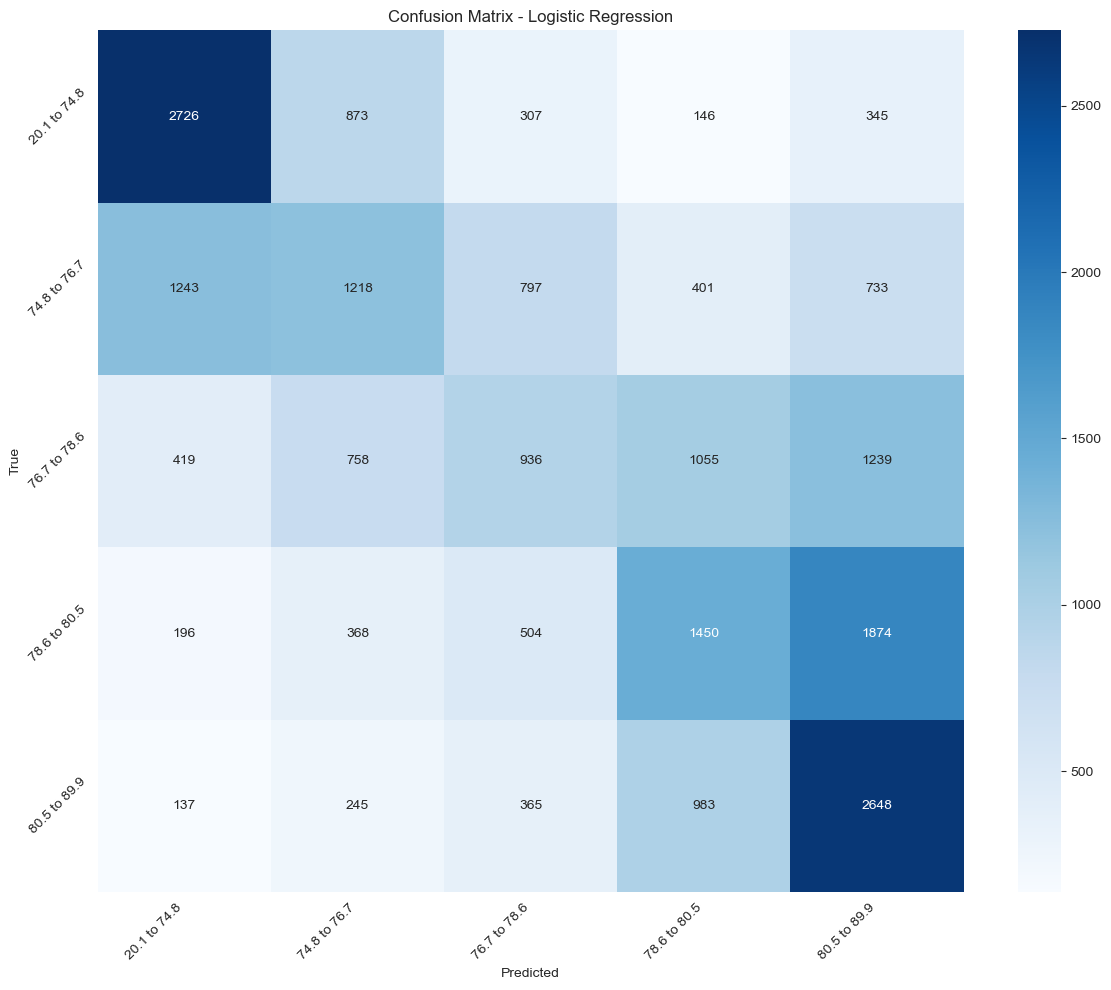

Best parameters for Logistic Regression: {'C': 10.0, 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

20.1 to 74.8       0.58      0.62      0.60      4397
74.8 to 76.7       0.35      0.28      0.31      4392
76.7 to 78.6       0.32      0.21      0.26      4407
78.6 to 80.5       0.36      0.33      0.34      4392
80.5 to 89.9       0.39      0.60      0.47      4378

    accuracy                           0.41     21966
   macro avg       0.40      0.41      0.40     21966
weighted avg       0.40      0.41      0.40     21966


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


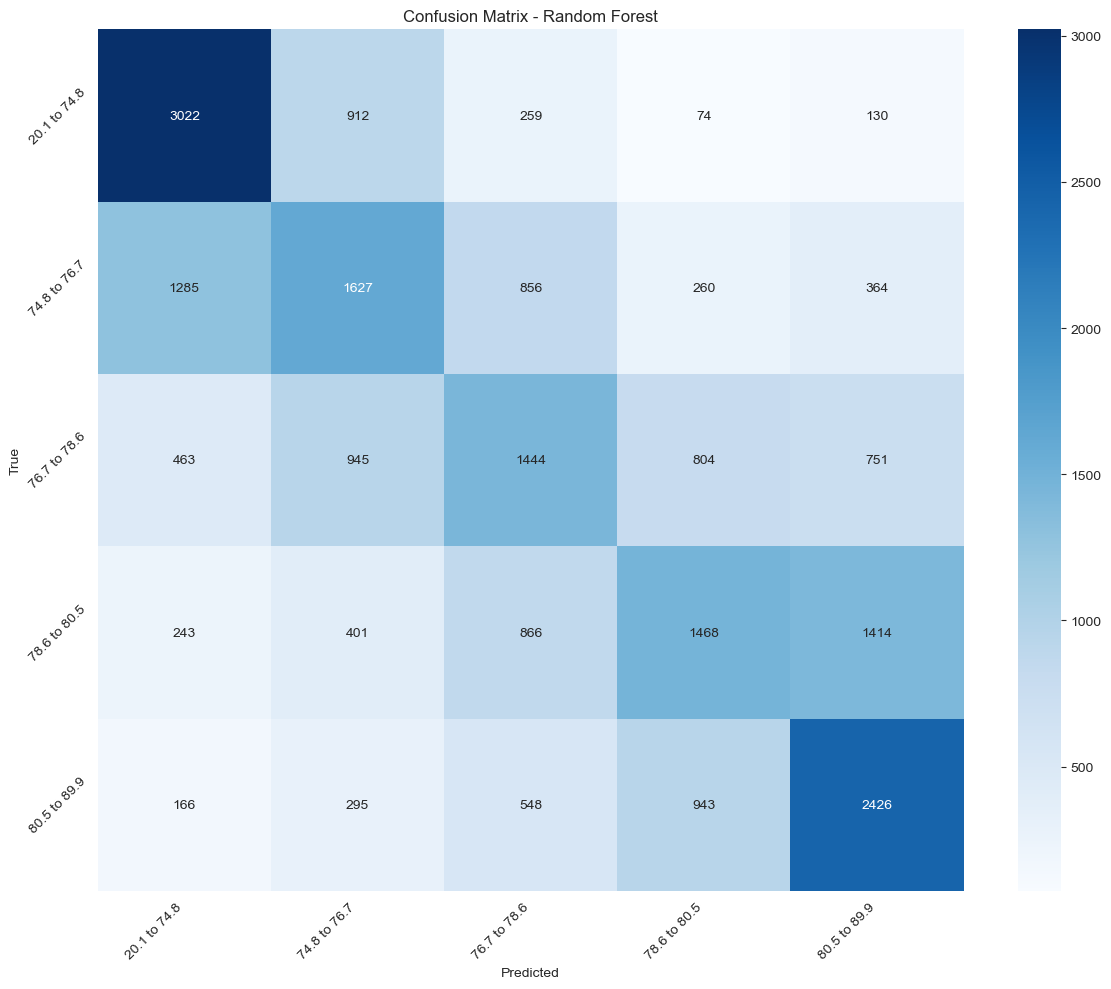

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

20.1 to 74.8       0.58      0.69      0.63      4397
74.8 to 76.7       0.39      0.37      0.38      4392
76.7 to 78.6       0.36      0.33      0.34      4407
78.6 to 80.5       0.41      0.33      0.37      4392
80.5 to 89.9       0.48      0.55      0.51      4378

    accuracy                           0.45     21966
   macro avg       0.45      0.45      0.45     21966
weighted avg       0.45      0.45      0.45     21966


Training KNN...


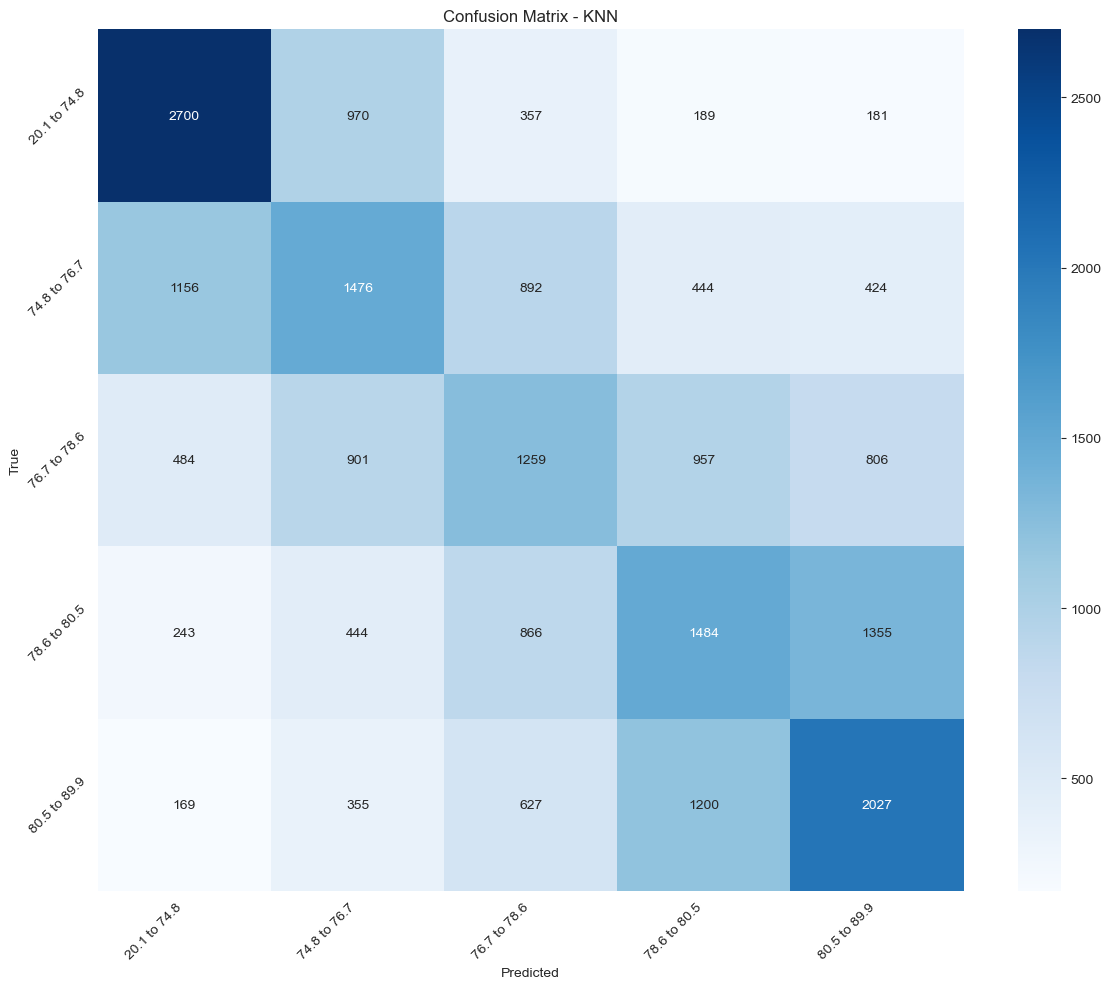

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
              precision    recall  f1-score   support

20.1 to 74.8       0.57      0.61      0.59      4397
74.8 to 76.7       0.36      0.34      0.35      4392
76.7 to 78.6       0.31      0.29      0.30      4407
78.6 to 80.5       0.35      0.34      0.34      4392
80.5 to 89.9       0.42      0.46      0.44      4378

    accuracy                           0.41     21966
   macro avg       0.40      0.41      0.40     21966
weighted avg       0.40      0.41      0.40     21966


Training Decision Tree...


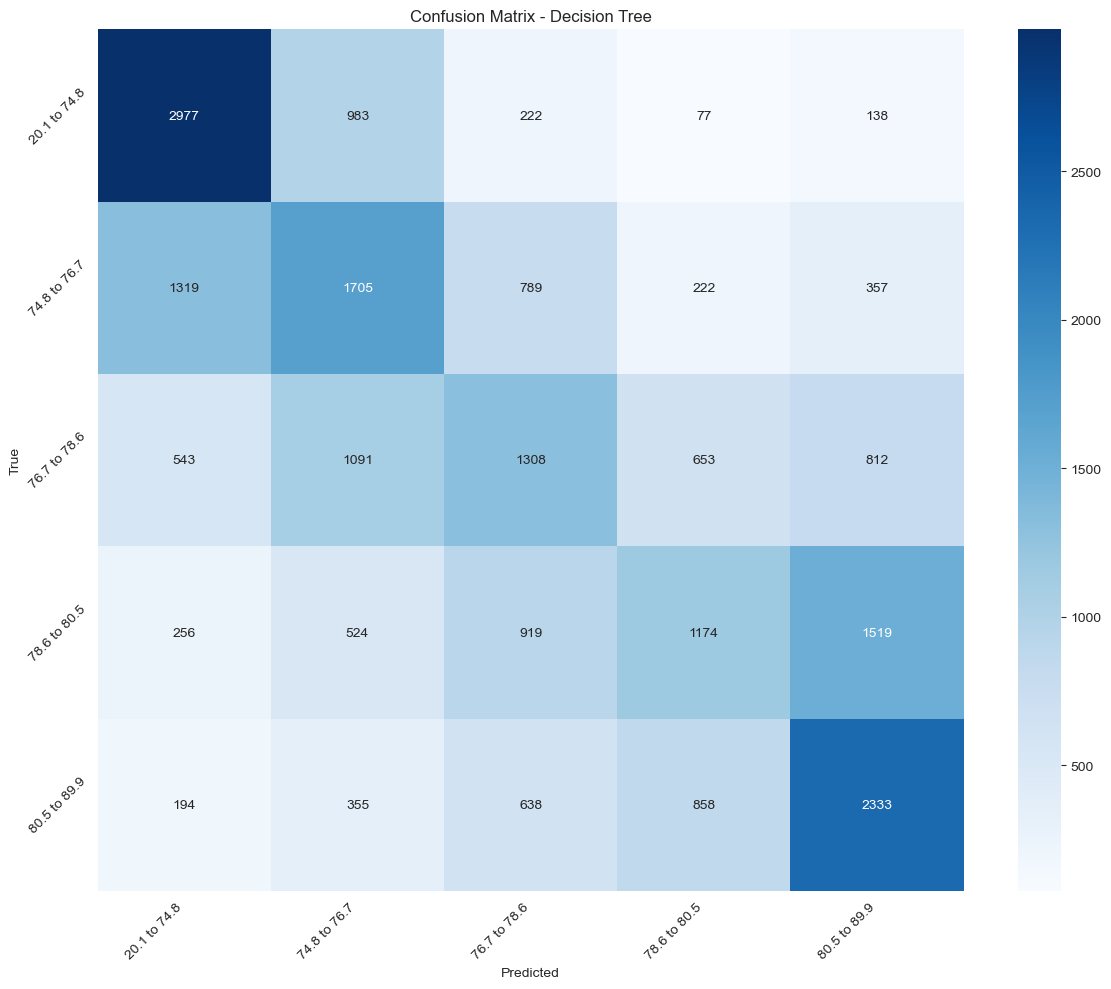

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

20.1 to 74.8       0.56      0.68      0.61      4397
74.8 to 76.7       0.37      0.39      0.38      4392
76.7 to 78.6       0.34      0.30      0.32      4407
78.6 to 80.5       0.39      0.27      0.32      4392
80.5 to 89.9       0.45      0.53      0.49      4378

    accuracy                           0.43     21966
   macro avg       0.42      0.43      0.42     21966
weighted avg       0.42      0.43      0.42     21966


Training Neural Network...
Epoch 1/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3735 - loss: 1.4911 - val_accuracy: 0.4305 - val_loss: 1.3438 - learning_rate: 0.0010
Epoch 2/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4112 - loss: 1.3862 - val_accuracy: 0.4328 - val_loss: 1.3269 - learning_rate: 0.0010
Epoch 3/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.415

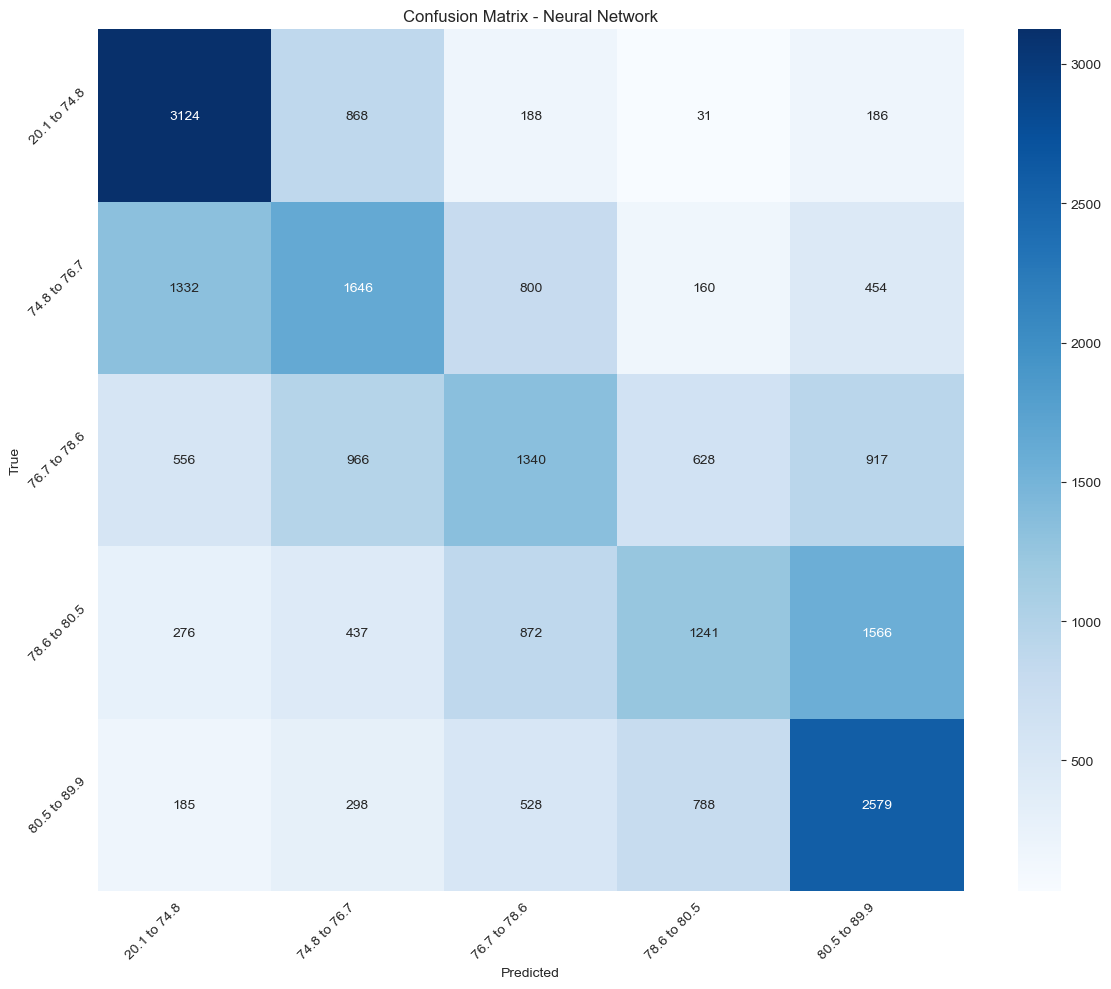


Neural Network Classification Report:
              precision    recall  f1-score   support

20.1 to 74.8       0.57      0.71      0.63      4397
74.8 to 76.7       0.39      0.37      0.38      4392
76.7 to 78.6       0.36      0.30      0.33      4407
78.6 to 80.5       0.44      0.28      0.34      4392
80.5 to 89.9       0.45      0.59      0.51      4378

    accuracy                           0.45     21966
   macro avg       0.44      0.45      0.44     21966
weighted avg       0.44      0.45      0.44     21966



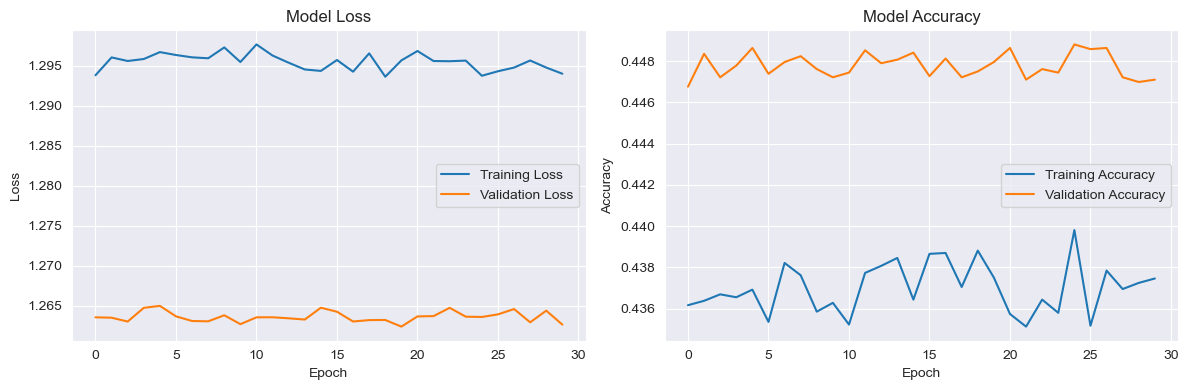

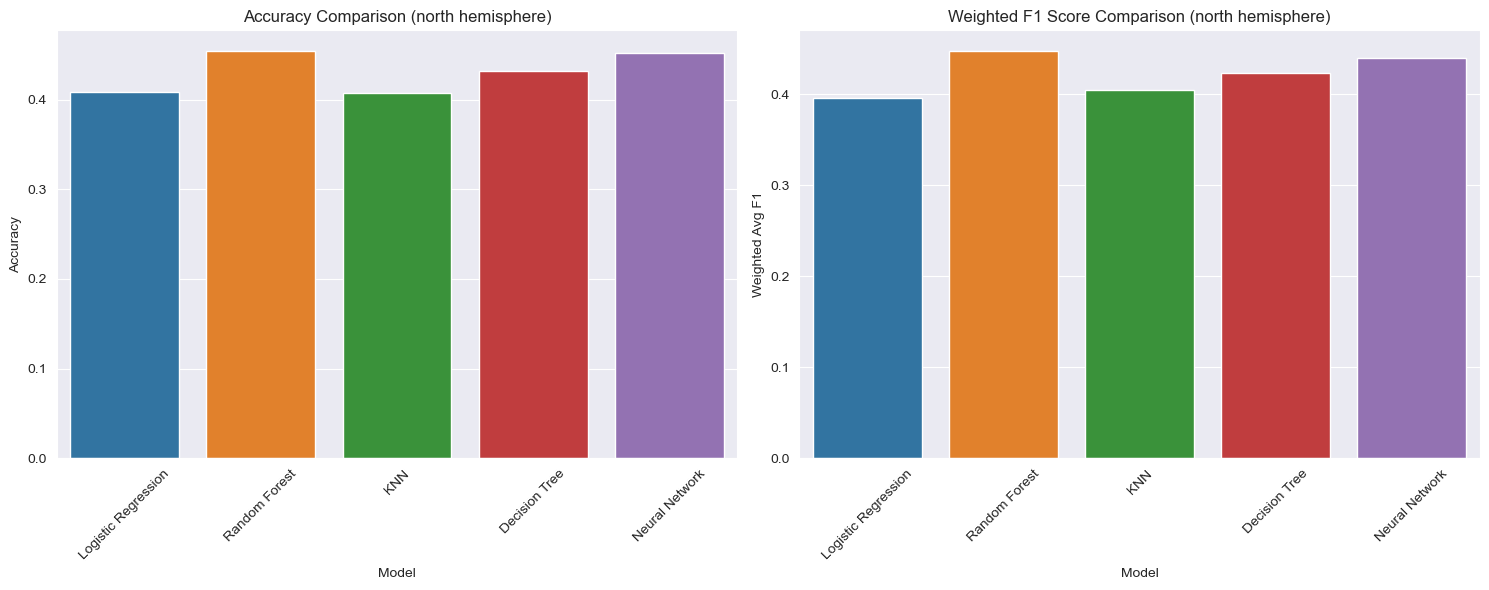


North Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.408723      0.396050         0.395951
1        Random Forest  0.454657      0.447572         0.447502
2                  KNN  0.407266      0.403997         0.403944
3        Decision Tree  0.432350      0.422981         0.422910
4       Neural Network  0.452062      0.439895         0.439817

Training South Hemisphere Models...

Training Logistic Regression...


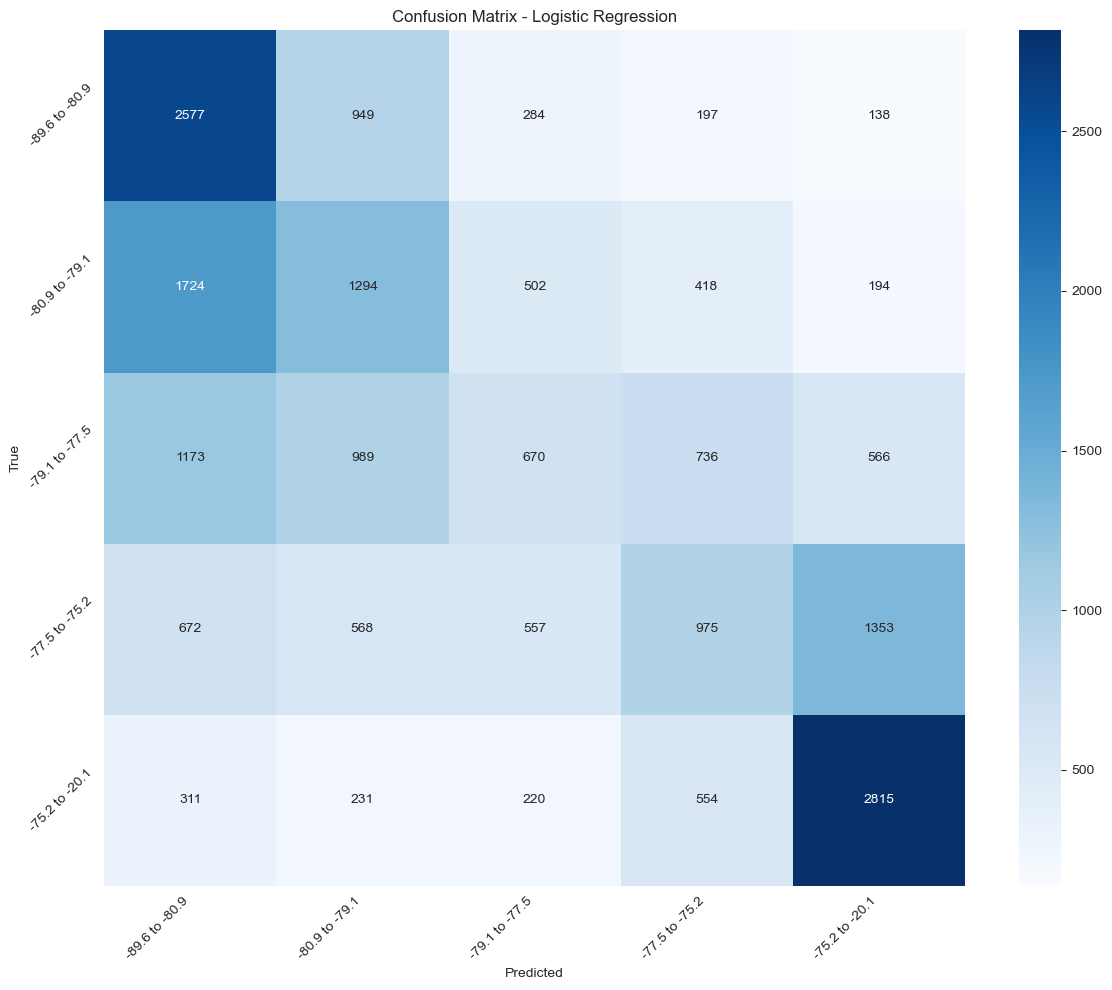

Best parameters for Logistic Regression: {'C': 10.0, 'solver': 'lbfgs'}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -80.9       0.40      0.62      0.49      4145
-80.9 to -79.1       0.32      0.31      0.32      4132
-79.1 to -77.5       0.30      0.16      0.21      4134
-77.5 to -75.2       0.34      0.24      0.28      4125
-75.2 to -20.1       0.56      0.68      0.61      4131

      accuracy                           0.40     20667
     macro avg       0.38      0.40      0.38     20667
  weighted avg       0.38      0.40      0.38     20667


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


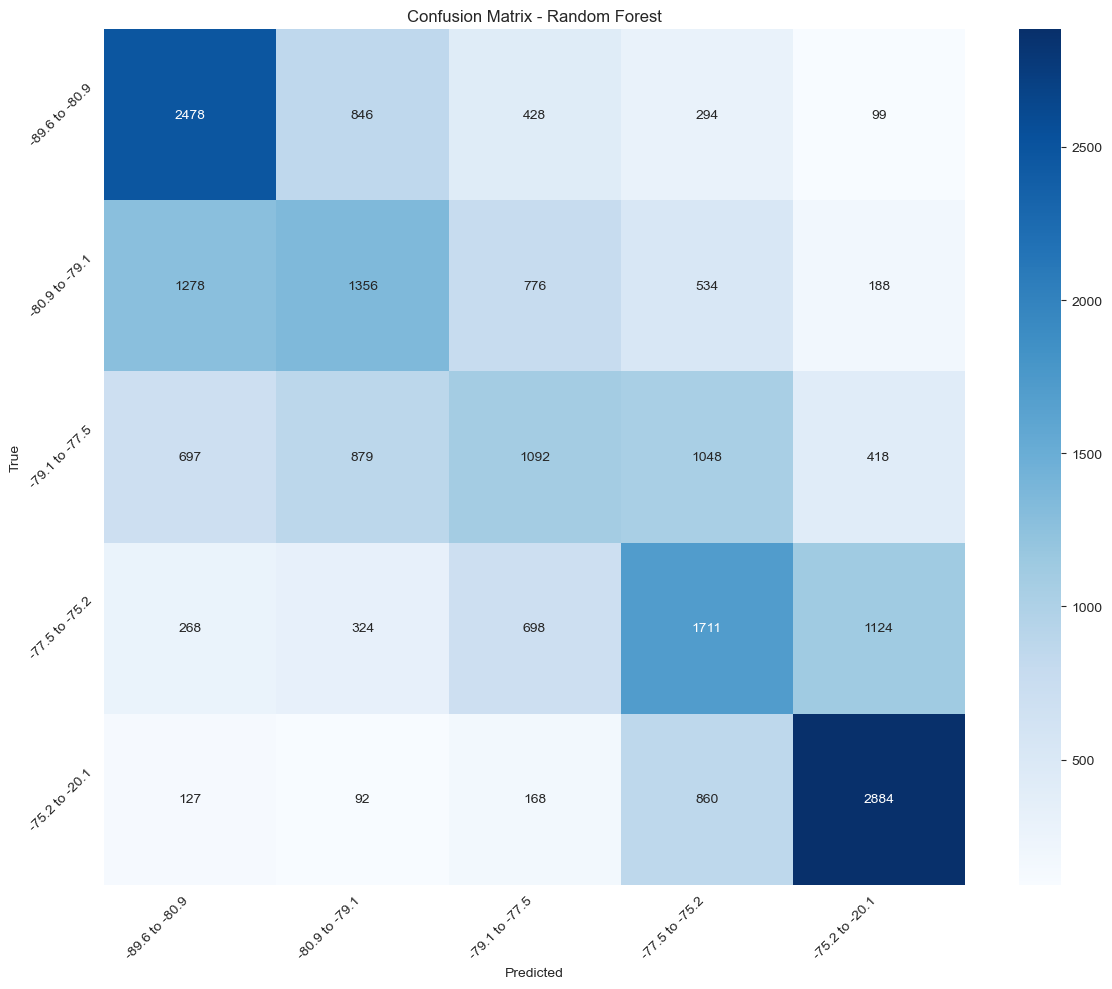

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -80.9       0.51      0.60      0.55      4145
-80.9 to -79.1       0.39      0.33      0.36      4132
-79.1 to -77.5       0.35      0.26      0.30      4134
-77.5 to -75.2       0.38      0.41      0.40      4125
-75.2 to -20.1       0.61      0.70      0.65      4131

      accuracy                           0.46     20667
     macro avg       0.45      0.46      0.45     20667
  weighted avg       0.45      0.46      0.45     20667


Training KNN...


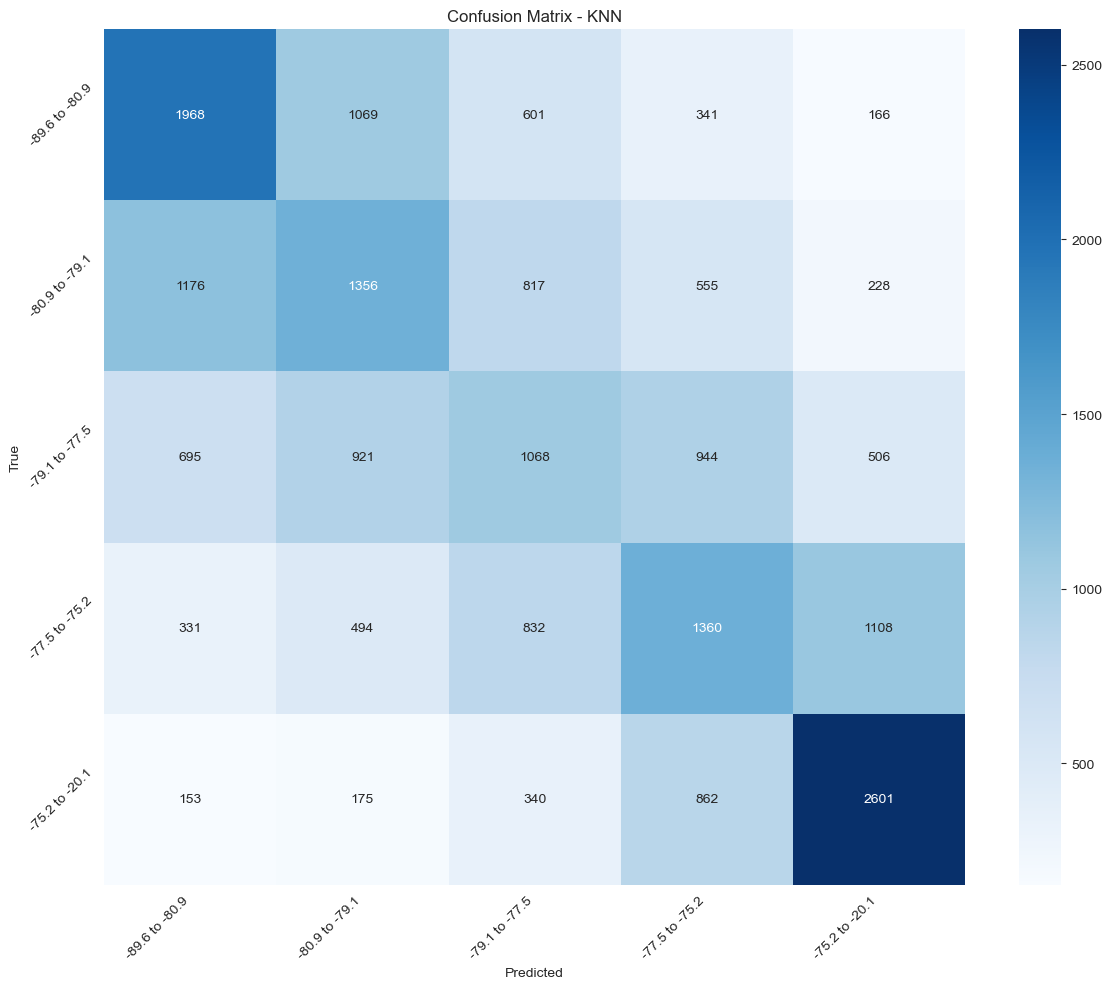

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -80.9       0.46      0.47      0.46      4145
-80.9 to -79.1       0.34      0.33      0.33      4132
-79.1 to -77.5       0.29      0.26      0.27      4134
-77.5 to -75.2       0.33      0.33      0.33      4125
-75.2 to -20.1       0.56      0.63      0.60      4131

      accuracy                           0.40     20667
     macro avg       0.40      0.40      0.40     20667
  weighted avg       0.40      0.40      0.40     20667


Training Decision Tree...


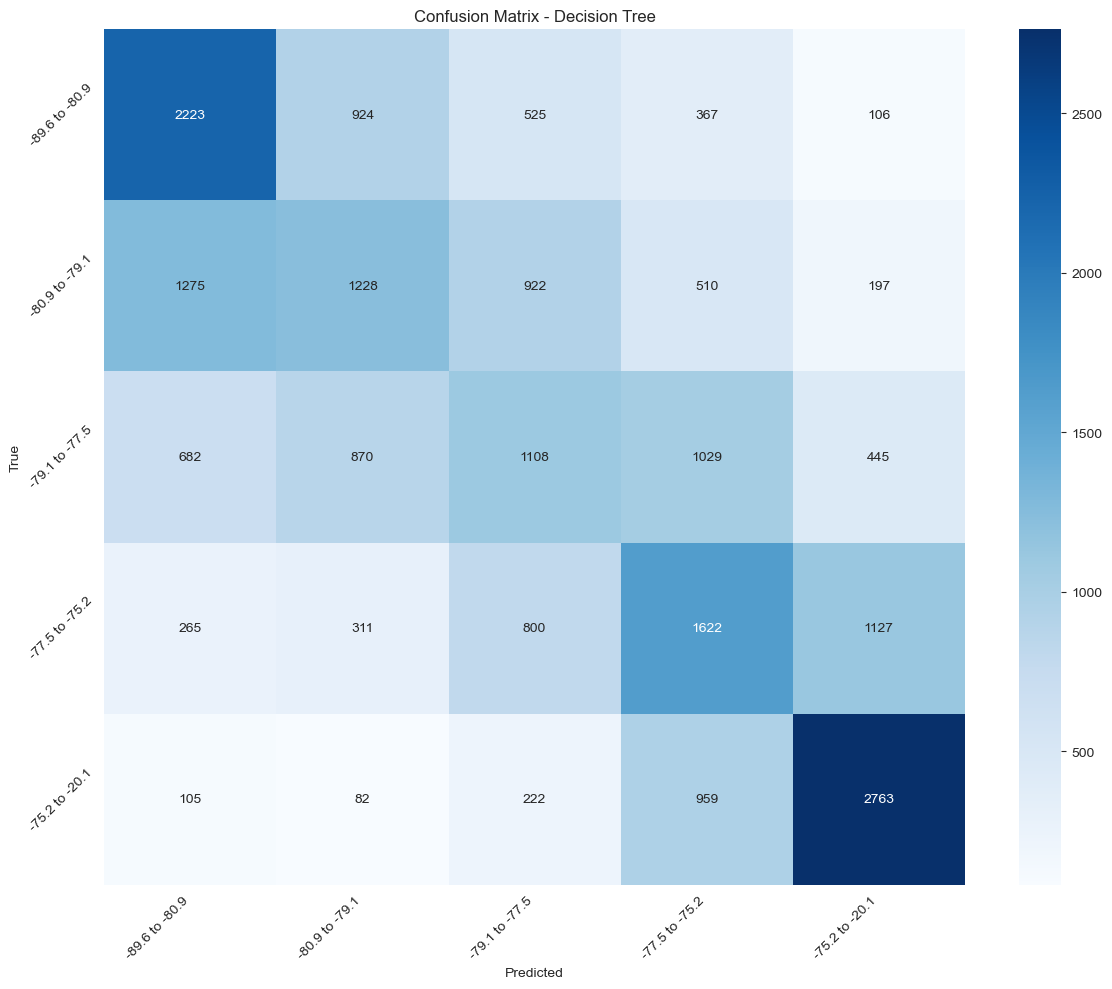

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -80.9       0.49      0.54      0.51      4145
-80.9 to -79.1       0.36      0.30      0.33      4132
-79.1 to -77.5       0.31      0.27      0.29      4134
-77.5 to -75.2       0.36      0.39      0.38      4125
-75.2 to -20.1       0.60      0.67      0.63      4131

      accuracy                           0.43     20667
     macro avg       0.42      0.43      0.43     20667
  weighted avg       0.42      0.43      0.43     20667


Training Neural Network...
Epoch 1/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.3625 - loss: 1.4995 - val_accuracy: 0.4207 - val_loss: 1.3486 - learning_rate: 0.0010
Epoch 2/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4002 - loss: 1.3839 - val_accuracy: 0.4204 - val_loss: 1.3346 - learning_rate: 0.0010
Epoch 3/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

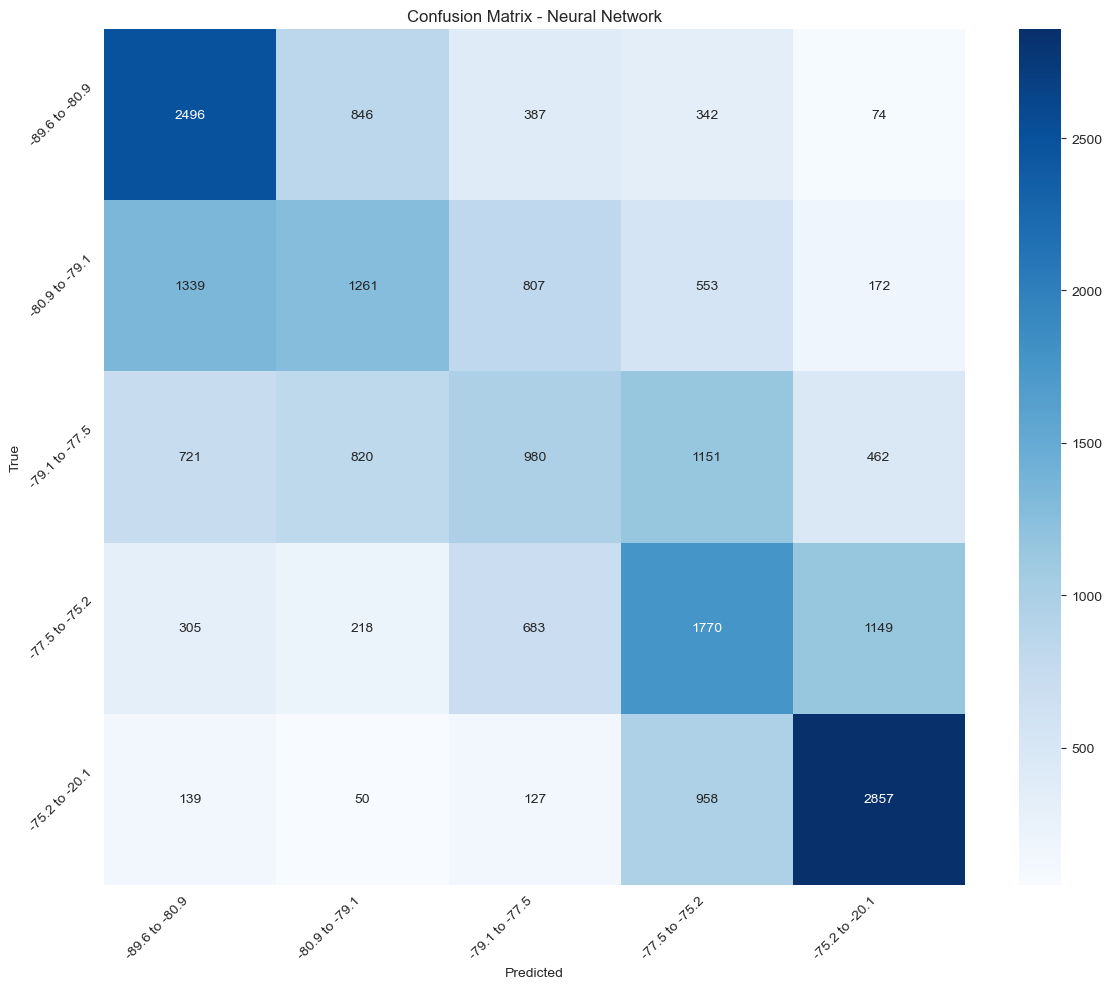


Neural Network Classification Report:
                precision    recall  f1-score   support

-89.6 to -80.9       0.50      0.60      0.55      4145
-80.9 to -79.1       0.39      0.31      0.34      4132
-79.1 to -77.5       0.33      0.24      0.28      4134
-77.5 to -75.2       0.37      0.43      0.40      4125
-75.2 to -20.1       0.61      0.69      0.65      4131

      accuracy                           0.45     20667
     macro avg       0.44      0.45      0.44     20667
  weighted avg       0.44      0.45      0.44     20667



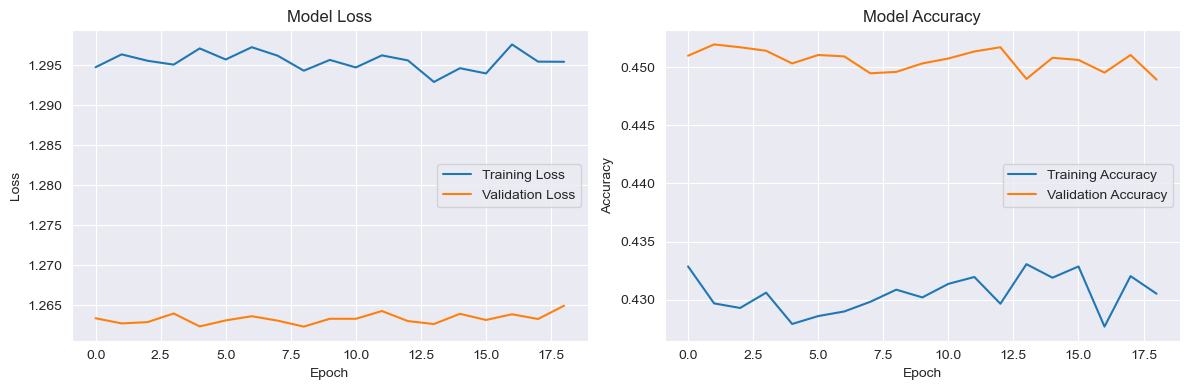

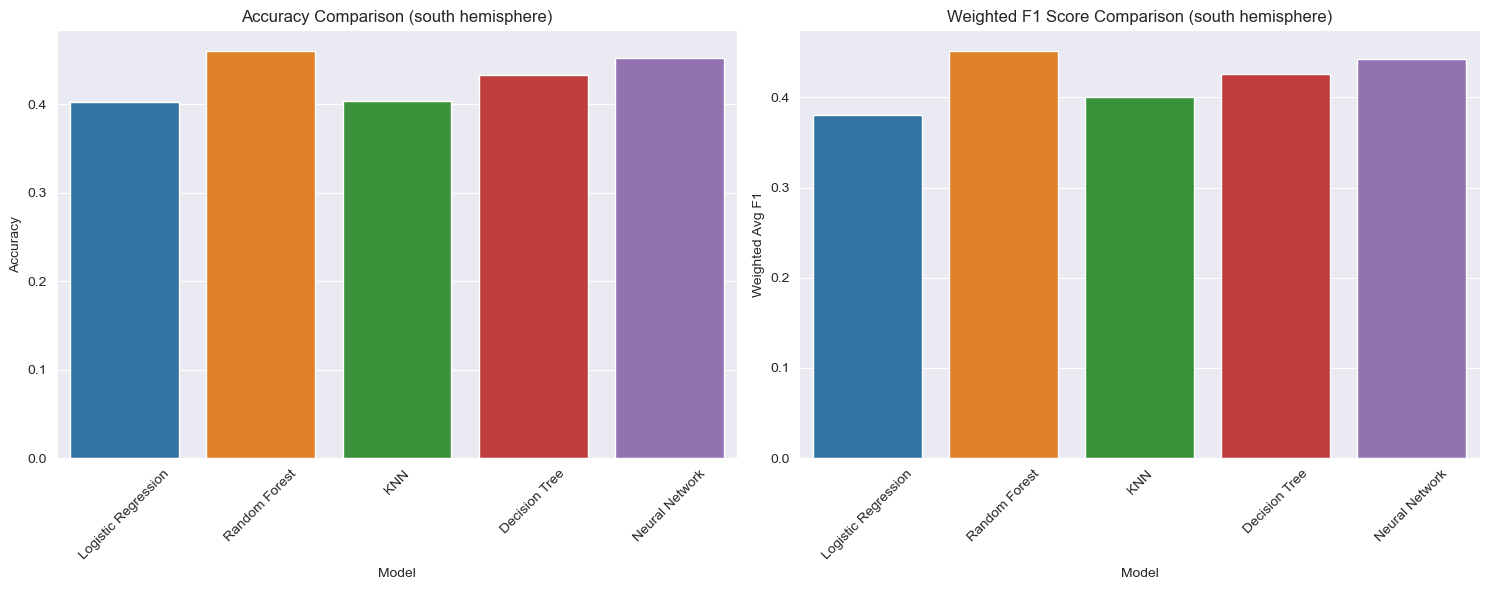


South Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.403106      0.380833         0.380906
1        Random Forest  0.460686      0.451465         0.451521
2                  KNN  0.404171      0.399850         0.399892
3        Decision Tree  0.432767      0.426199         0.426246
4       Neural Network  0.453089      0.441850         0.441904


In [12]:
# Example usage remains the same but now includes neural network results
print("Training North Hemisphere Models...")
north_results, north_models, north_scaler, north_edges, north_labels, north_history = train_classification_models(daysideN_df, 'north', n_bins=5)
print("\nNorth Hemisphere Results:")
print(north_results)

print("\nTraining South Hemisphere Models...")
south_results, south_models, south_scaler, south_edges, south_labels, south_history = train_classification_models(daysideS_df, 'south', n_bins=5)
print("\nSouth Hemisphere Results:")
print(south_results)

Training North Hemisphere Models...

Training Logistic Regression...


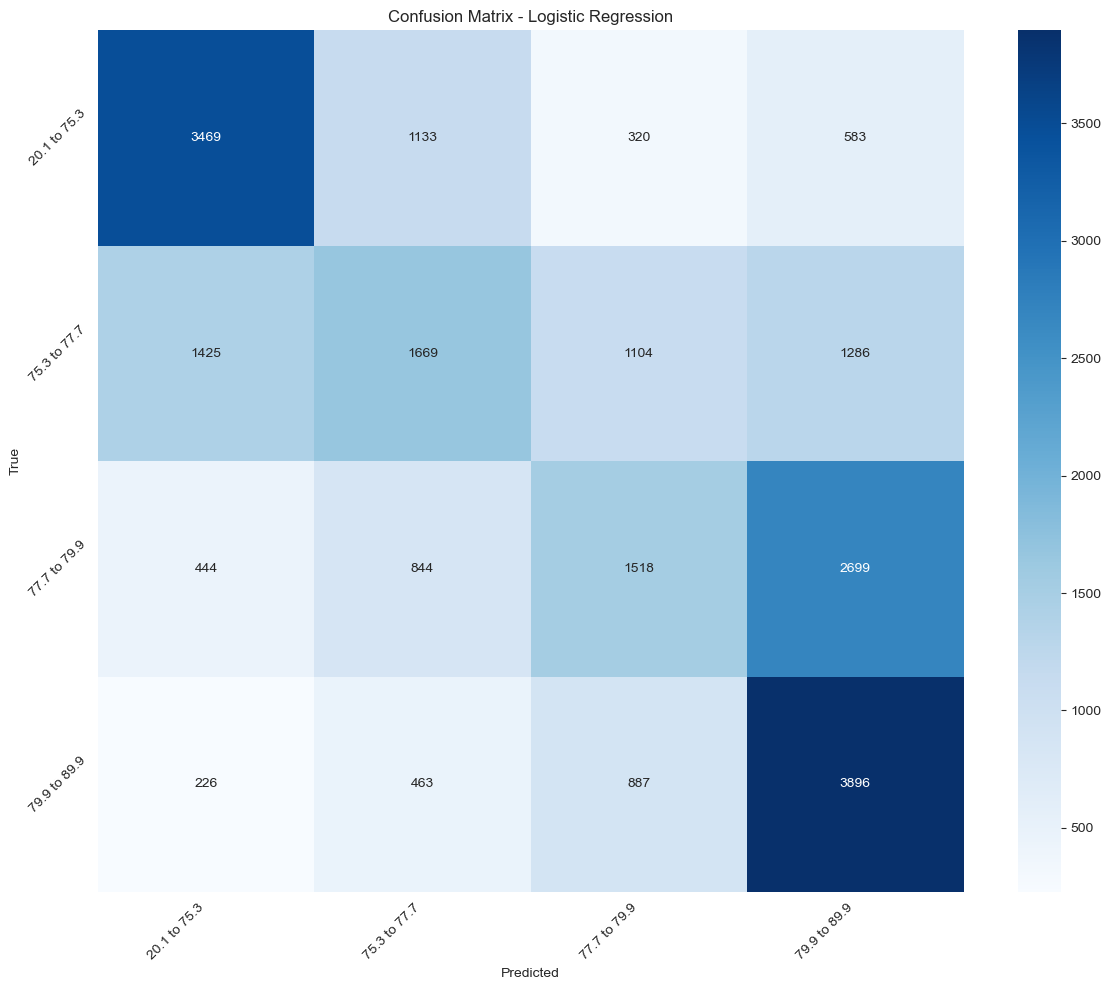

Best parameters for Logistic Regression: {'C': 1.0, 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

20.1 to 75.3       0.62      0.63      0.63      5505
75.3 to 77.7       0.41      0.30      0.35      5484
77.7 to 79.9       0.40      0.28      0.33      5505
79.9 to 89.9       0.46      0.71      0.56      5472

    accuracy                           0.48     21966
   macro avg       0.47      0.48      0.46     21966
weighted avg       0.47      0.48      0.46     21966


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


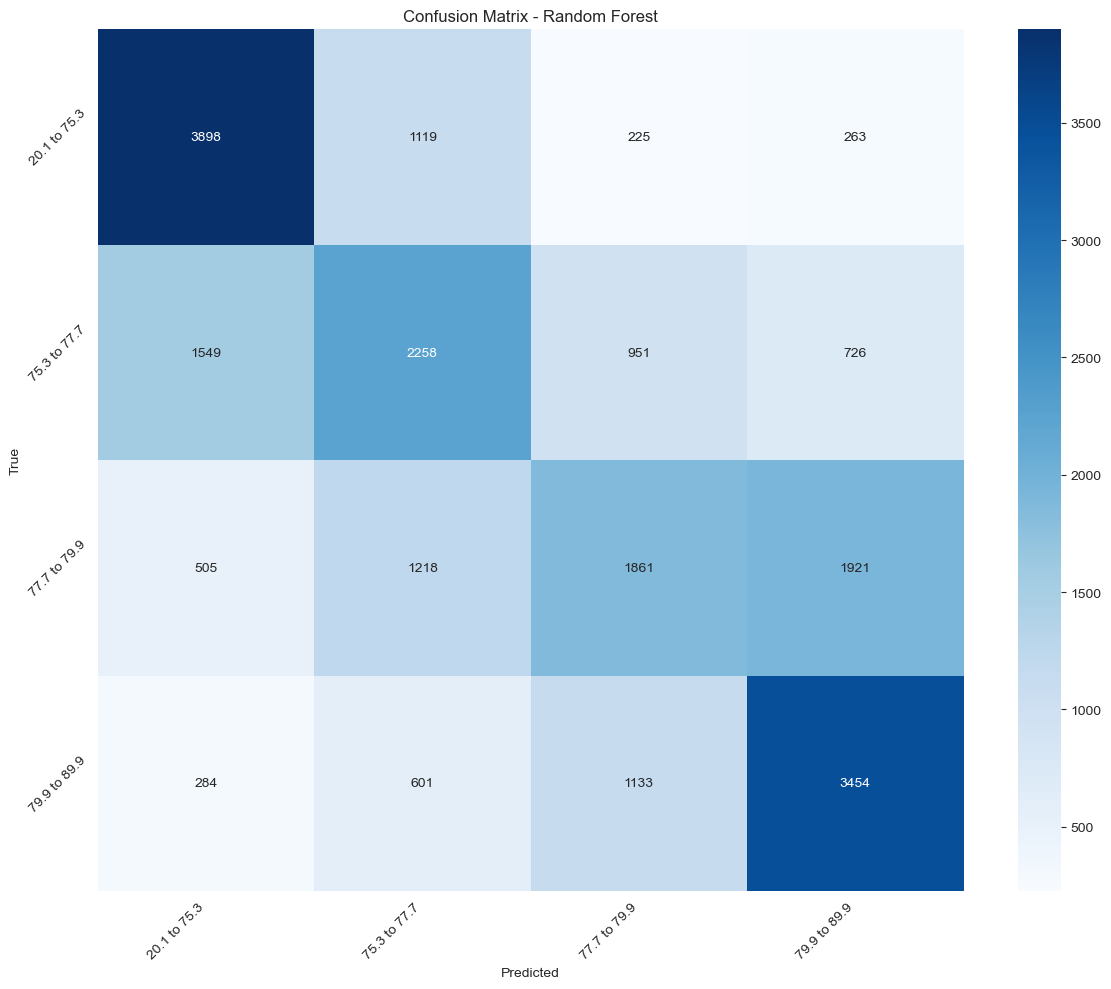

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

20.1 to 75.3       0.63      0.71      0.66      5505
75.3 to 77.7       0.43      0.41      0.42      5484
77.7 to 79.9       0.45      0.34      0.38      5505
79.9 to 89.9       0.54      0.63      0.58      5472

    accuracy                           0.52     21966
   macro avg       0.51      0.52      0.51     21966
weighted avg       0.51      0.52      0.51     21966


Training KNN...


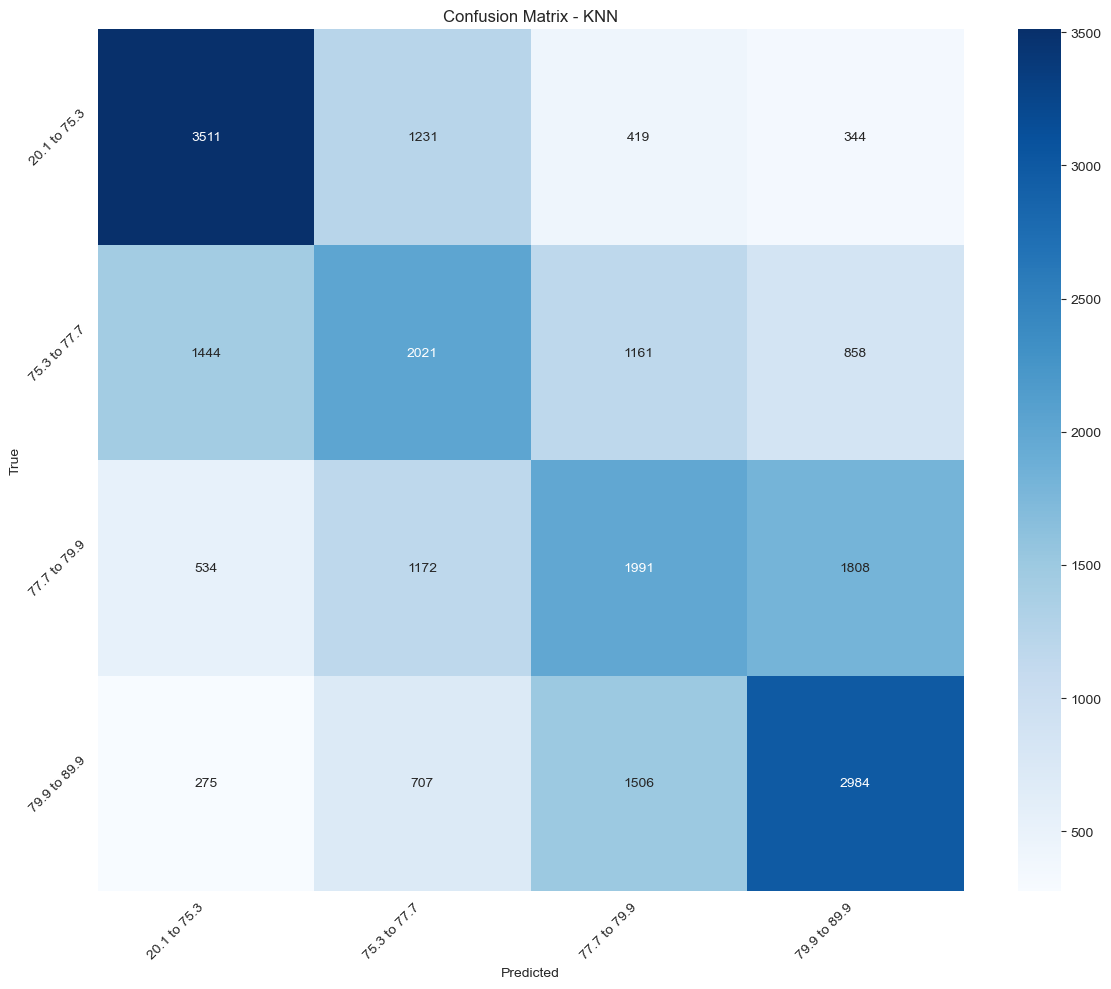

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
              precision    recall  f1-score   support

20.1 to 75.3       0.61      0.64      0.62      5505
75.3 to 77.7       0.39      0.37      0.38      5484
77.7 to 79.9       0.39      0.36      0.38      5505
79.9 to 89.9       0.50      0.55      0.52      5472

    accuracy                           0.48     21966
   macro avg       0.47      0.48      0.48     21966
weighted avg       0.47      0.48      0.48     21966


Training Decision Tree...


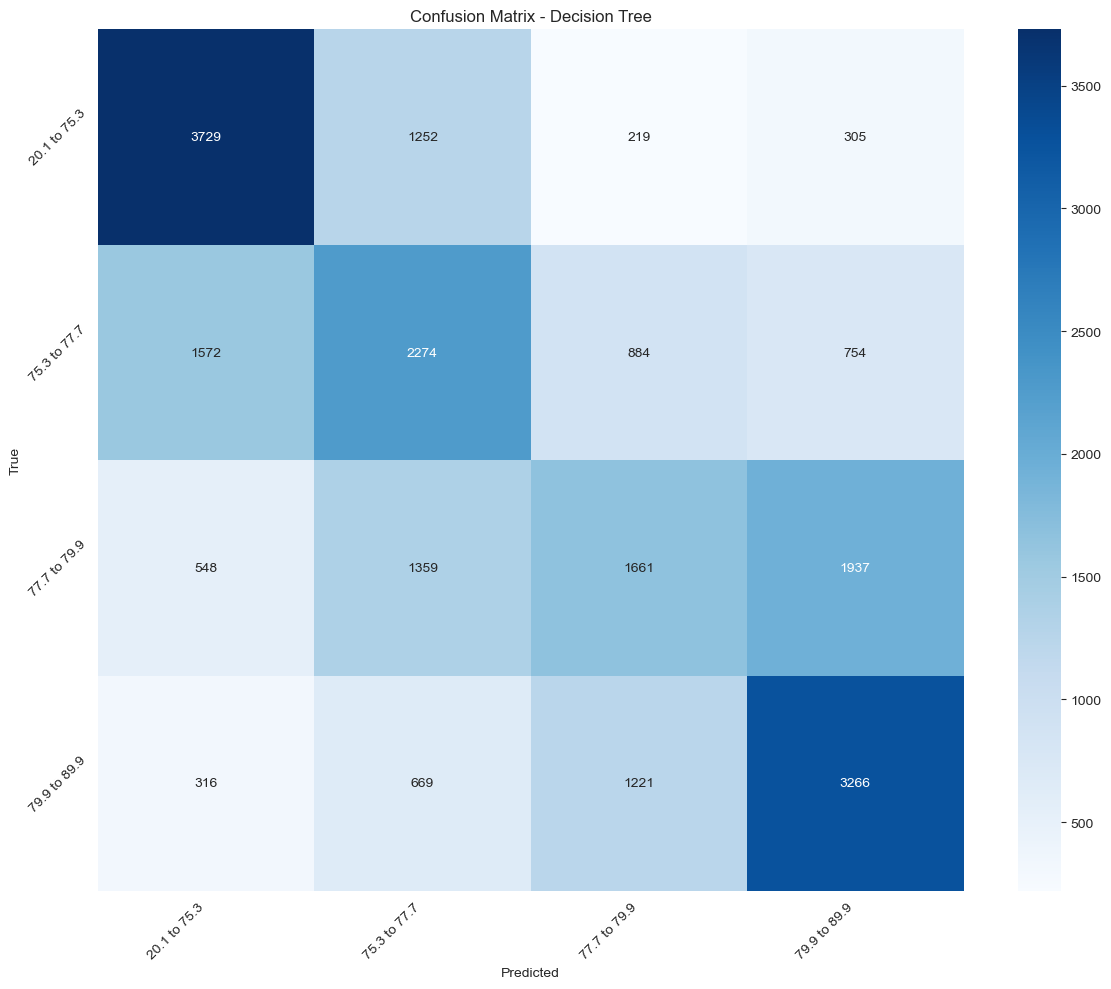

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}

Classification Report:
              precision    recall  f1-score   support

20.1 to 75.3       0.60      0.68      0.64      5505
75.3 to 77.7       0.41      0.41      0.41      5484
77.7 to 79.9       0.42      0.30      0.35      5505
79.9 to 89.9       0.52      0.60      0.56      5472

    accuracy                           0.50     21966
   macro avg       0.49      0.50      0.49     21966
weighted avg       0.49      0.50      0.49     21966


Training Neural Network...
Epoch 1/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4422 - loss: 1.2680 - val_accuracy: 0.5060 - val_loss: 1.1409 - learning_rate: 0.0010
Epoch 2/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4854 - loss: 1.1729 - val_accuracy: 0.5024 - val_loss: 1.1304 - learning_rate: 0.0010
Epoch 3/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4871 - loss: 1.1544 - val_accuracy: 0.5074 - val_loss: 1.

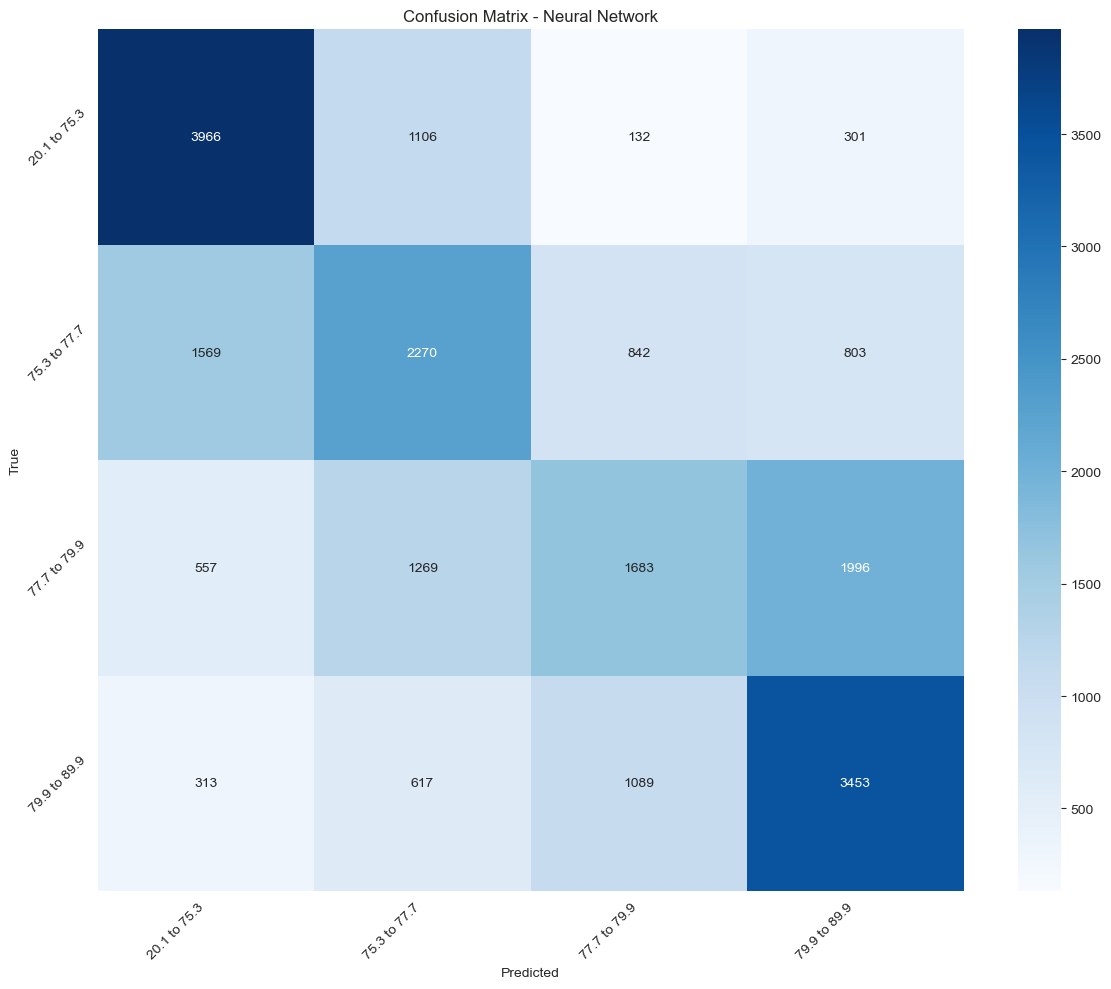


Neural Network Classification Report:
              precision    recall  f1-score   support

20.1 to 75.3       0.62      0.72      0.67      5505
75.3 to 77.7       0.43      0.41      0.42      5484
77.7 to 79.9       0.45      0.31      0.36      5505
79.9 to 89.9       0.53      0.63      0.57      5472

    accuracy                           0.52     21966
   macro avg       0.51      0.52      0.51     21966
weighted avg       0.51      0.52      0.51     21966



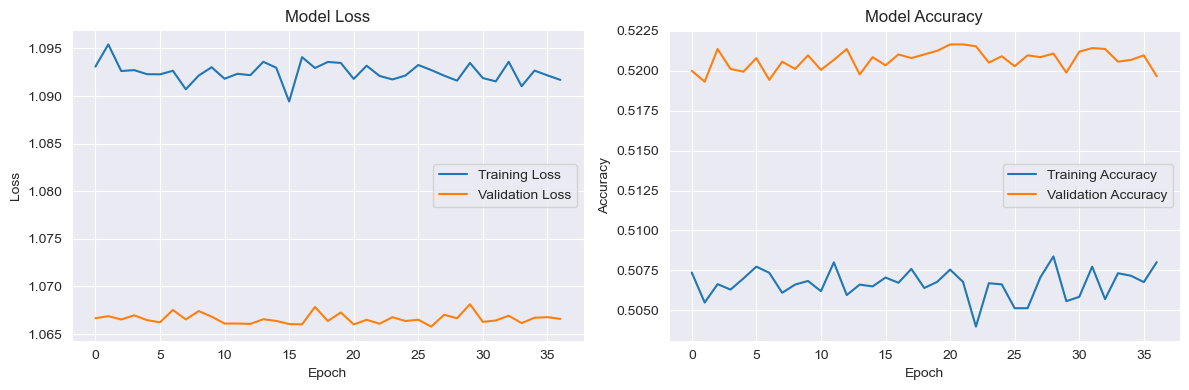

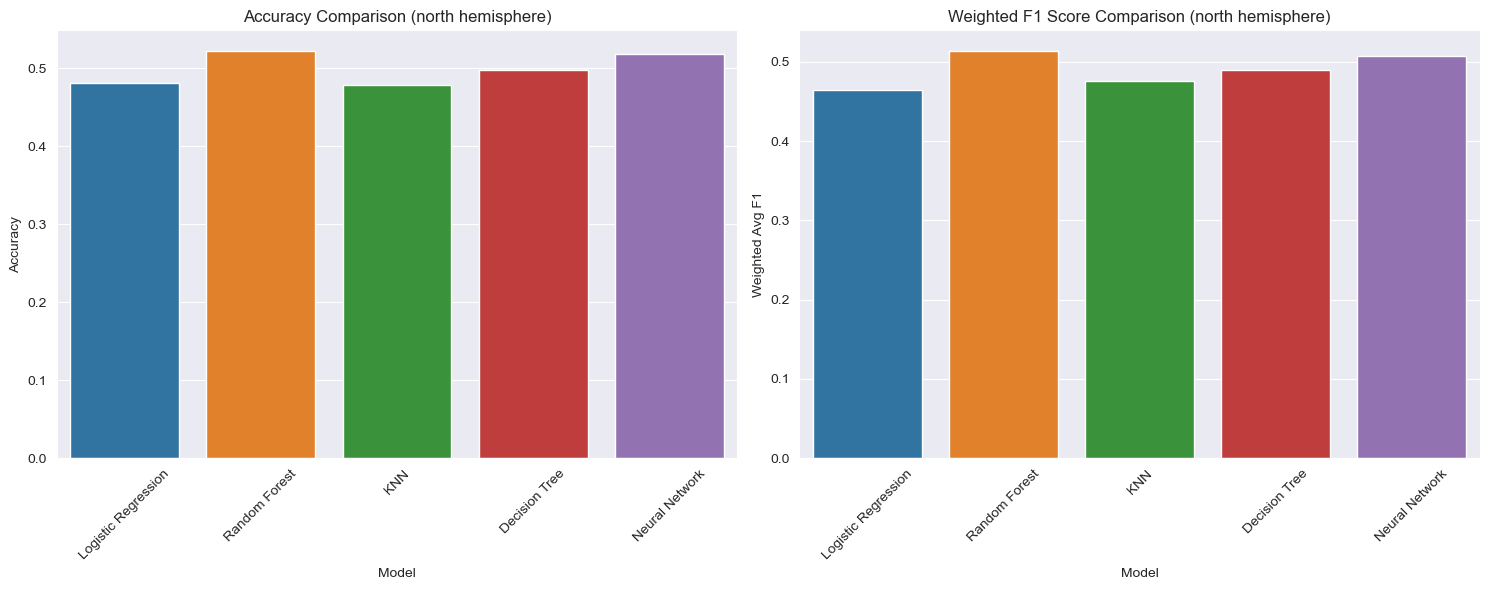


North Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.480379      0.464787         0.464757
1        Random Forest  0.522216      0.513798         0.513780
2                  KNN  0.478330      0.475176         0.475198
3        Decision Tree  0.497587      0.489458         0.489431
4       Neural Network  0.517709      0.506658         0.506637

Training South Hemisphere Models...

Training Logistic Regression...


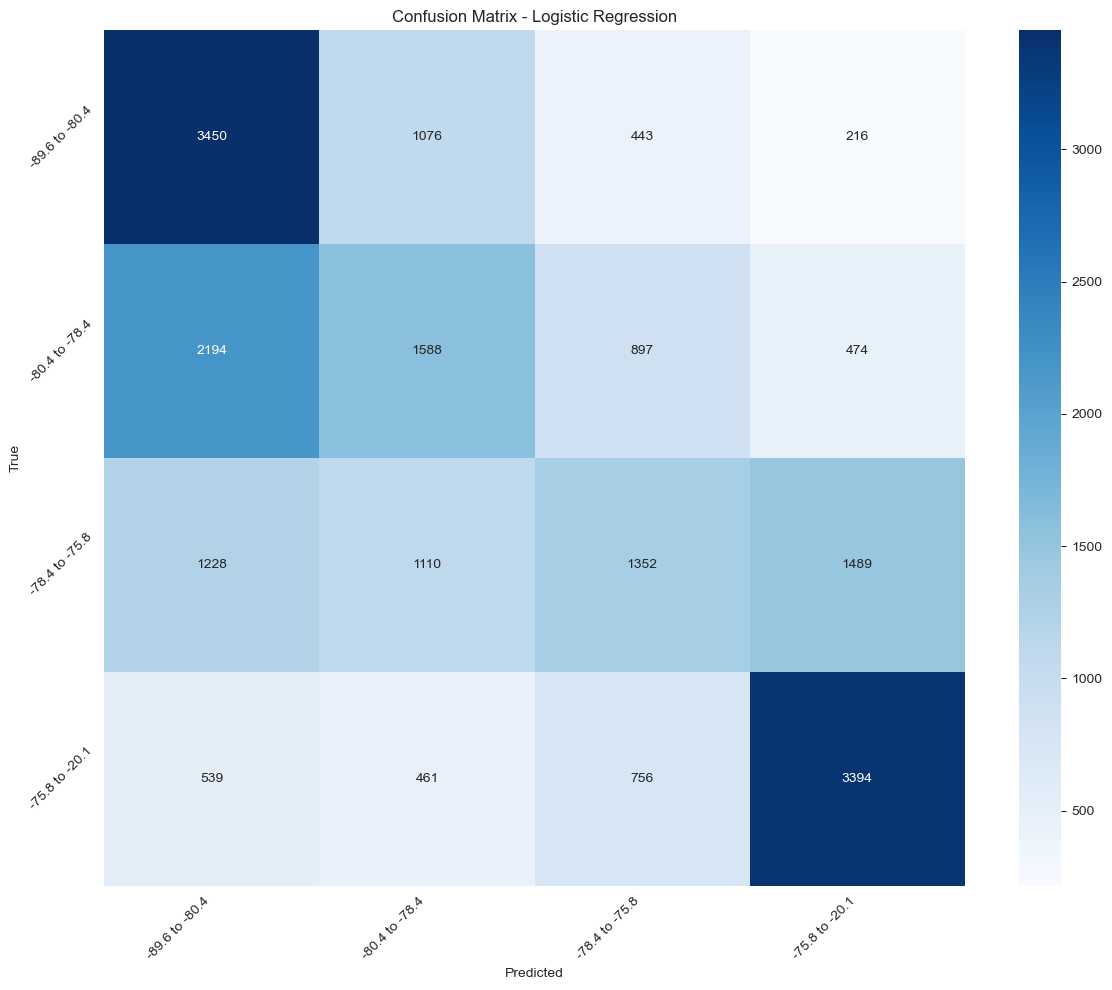

Best parameters for Logistic Regression: {'C': 10.0, 'solver': 'lbfgs'}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -80.4       0.47      0.67      0.55      5185
-80.4 to -78.4       0.37      0.31      0.34      5153
-78.4 to -75.8       0.39      0.26      0.31      5179
-75.8 to -20.1       0.61      0.66      0.63      5150

      accuracy                           0.47     20667
     macro avg       0.46      0.47      0.46     20667
  weighted avg       0.46      0.47      0.46     20667


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


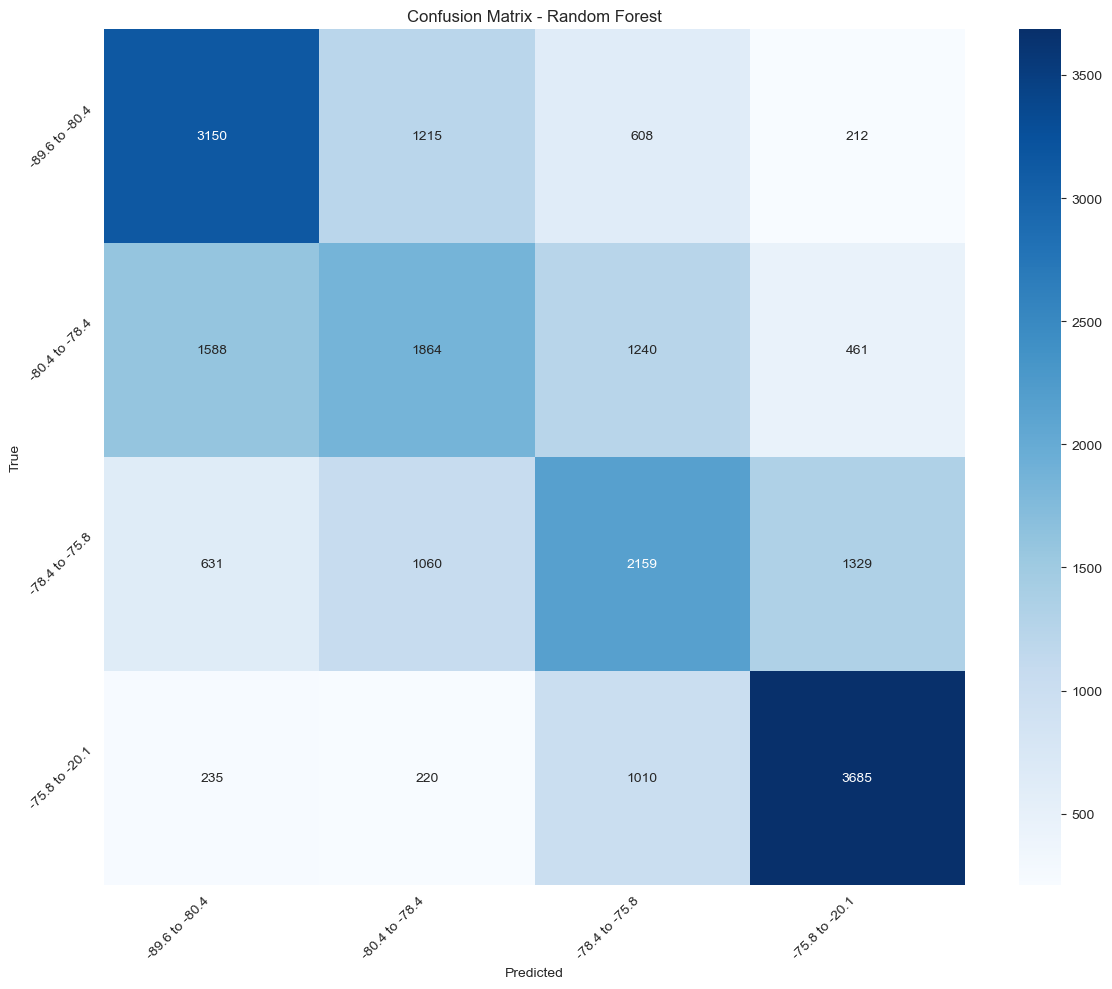

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -80.4       0.56      0.61      0.58      5185
-80.4 to -78.4       0.43      0.36      0.39      5153
-78.4 to -75.8       0.43      0.42      0.42      5179
-75.8 to -20.1       0.65      0.72      0.68      5150

      accuracy                           0.53     20667
     macro avg       0.52      0.53      0.52     20667
  weighted avg       0.52      0.53      0.52     20667


Training KNN...


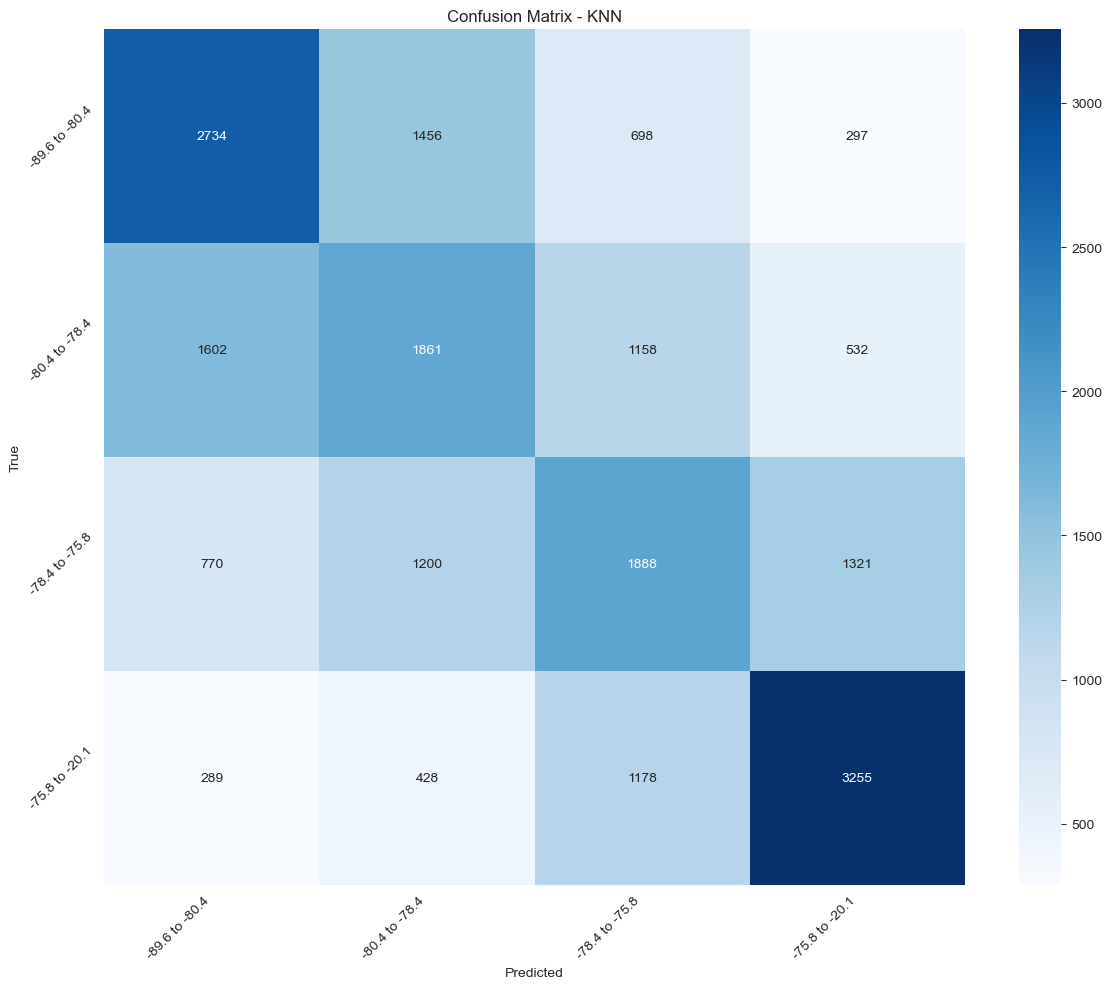

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -80.4       0.51      0.53      0.52      5185
-80.4 to -78.4       0.38      0.36      0.37      5153
-78.4 to -75.8       0.38      0.36      0.37      5179
-75.8 to -20.1       0.60      0.63      0.62      5150

      accuracy                           0.47     20667
     macro avg       0.47      0.47      0.47     20667
  weighted avg       0.47      0.47      0.47     20667


Training Decision Tree...


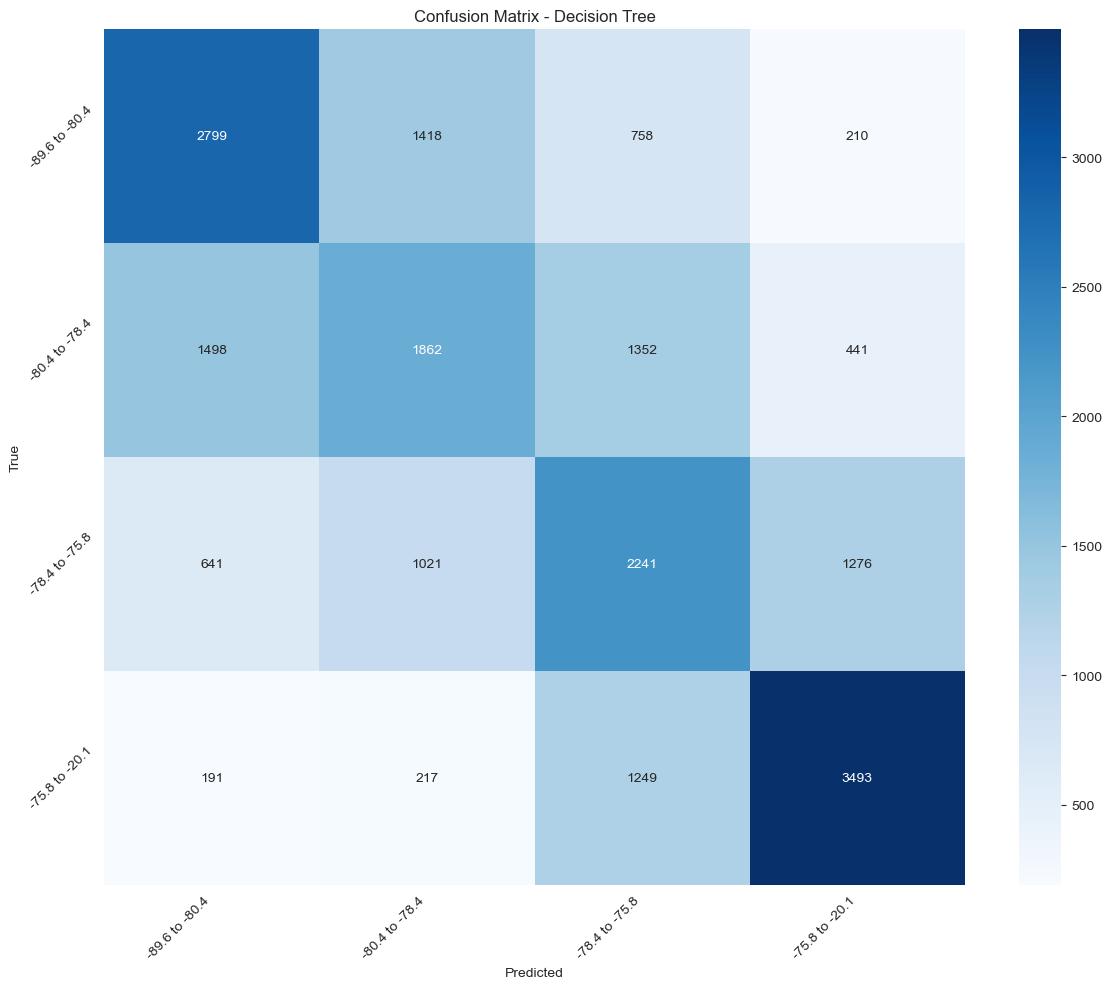

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -80.4       0.55      0.54      0.54      5185
-80.4 to -78.4       0.41      0.36      0.39      5153
-78.4 to -75.8       0.40      0.43      0.42      5179
-75.8 to -20.1       0.64      0.68      0.66      5150

      accuracy                           0.50     20667
     macro avg       0.50      0.50      0.50     20667
  weighted avg       0.50      0.50      0.50     20667


Training Neural Network...
Epoch 1/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4366 - loss: 1.2685 - val_accuracy: 0.5040 - val_loss: 1.1343 - learning_rate: 0.0010
Epoch 2/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4757 - loss: 1.1720 - val_accuracy: 0.5098 - val_loss: 1.1180 - learning_rate: 0.0010
Epoch 3/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4759 - loss: 1.1505 - val_accuracy: 0.502

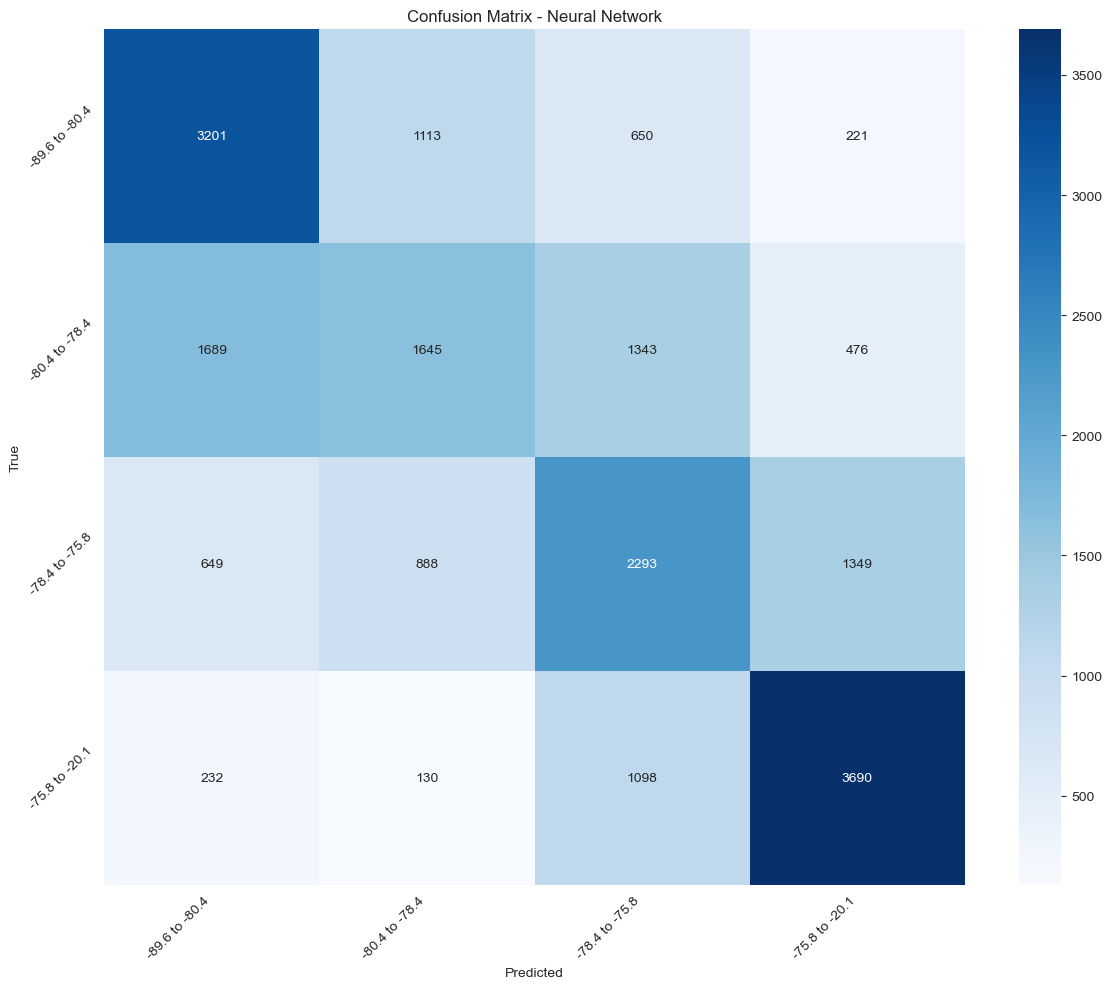


Neural Network Classification Report:
                precision    recall  f1-score   support

-89.6 to -80.4       0.55      0.62      0.58      5185
-80.4 to -78.4       0.44      0.32      0.37      5153
-78.4 to -75.8       0.43      0.44      0.43      5179
-75.8 to -20.1       0.64      0.72      0.68      5150

      accuracy                           0.52     20667
     macro avg       0.51      0.52      0.52     20667
  weighted avg       0.51      0.52      0.52     20667



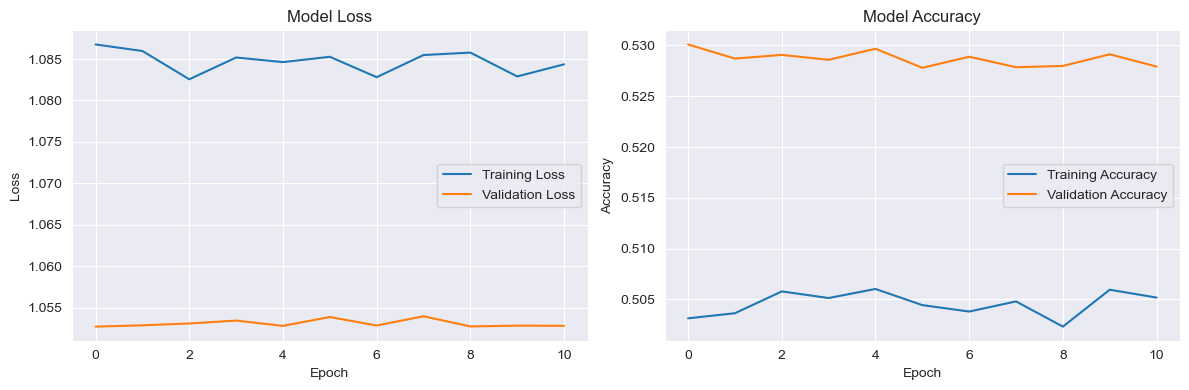

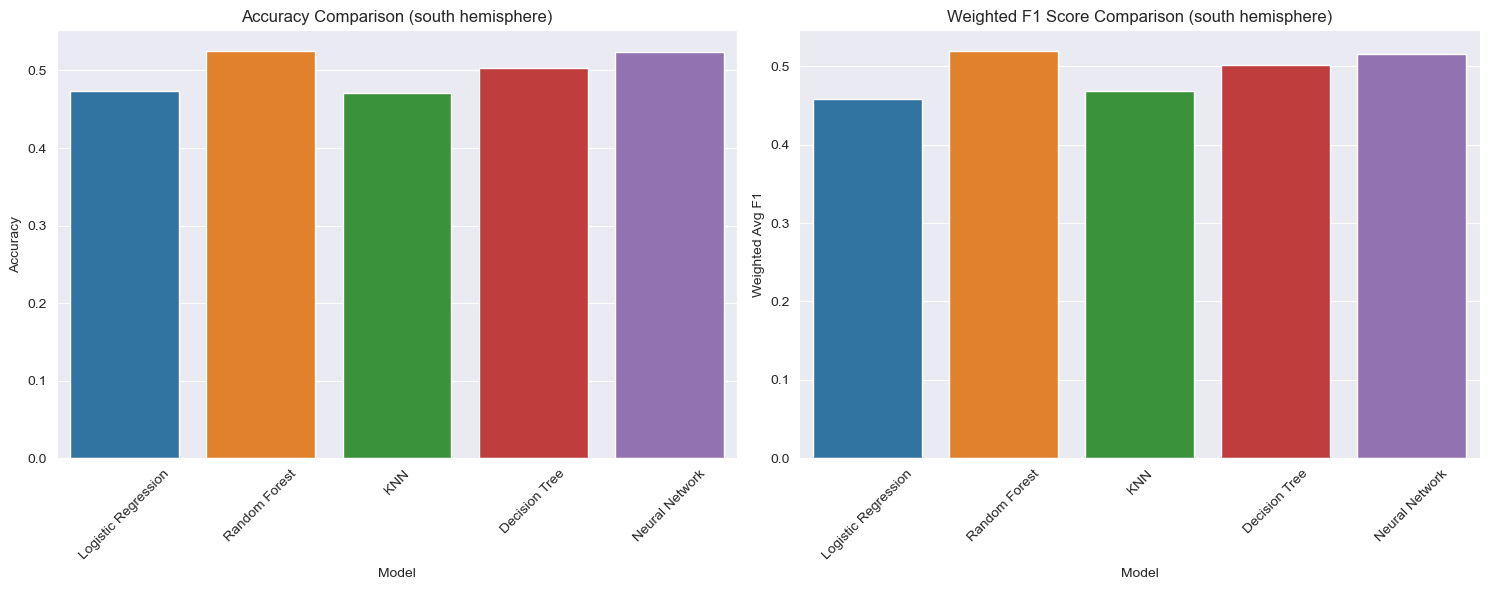


South Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.473412      0.458141         0.458072
1        Random Forest  0.525379      0.519858         0.519812
2                  KNN  0.471186      0.469001         0.468934
3        Decision Tree  0.502976      0.501140         0.501074
4       Neural Network  0.523975      0.516223         0.516202


In [13]:
# Example usage remains the same but now includes neural network results
print("Training North Hemisphere Models...")
north_results, north_models, north_scaler, north_edges, north_labels, north_history = train_classification_models(daysideN_df, 'north', n_bins=4)
print("\nNorth Hemisphere Results:")
print(north_results)

print("\nTraining South Hemisphere Models...")
south_results, south_models, south_scaler, south_edges, south_labels, south_history = train_classification_models(daysideS_df, 'south', n_bins=4)
print("\nSouth Hemisphere Results:")
print(south_results)

Training North Hemisphere Models...

Training Logistic Regression...


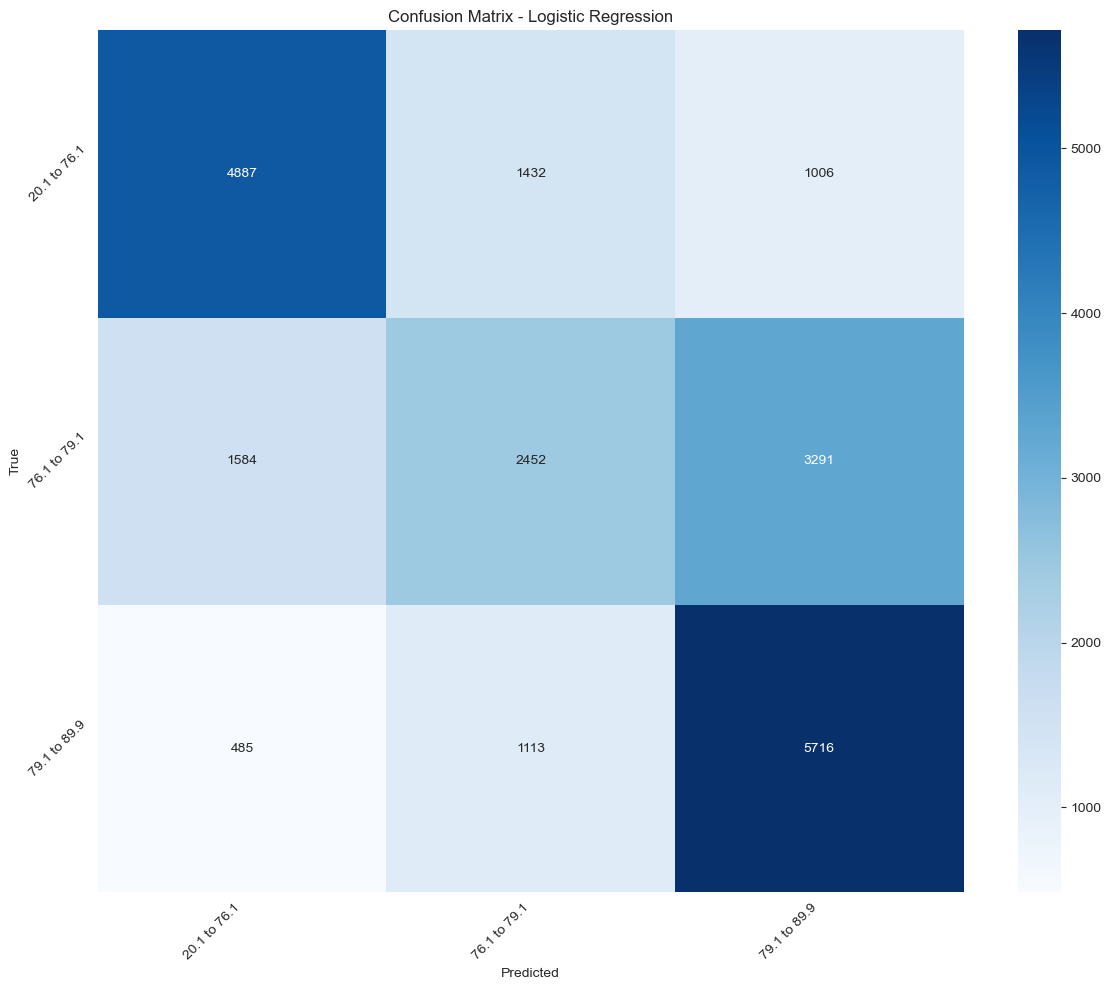

Best parameters for Logistic Regression: {'C': 1.0, 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

20.1 to 76.1       0.70      0.67      0.68      7325
76.1 to 79.1       0.49      0.33      0.40      7327
79.1 to 89.9       0.57      0.78      0.66      7314

    accuracy                           0.59     21966
   macro avg       0.59      0.59      0.58     21966
weighted avg       0.59      0.59      0.58     21966


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


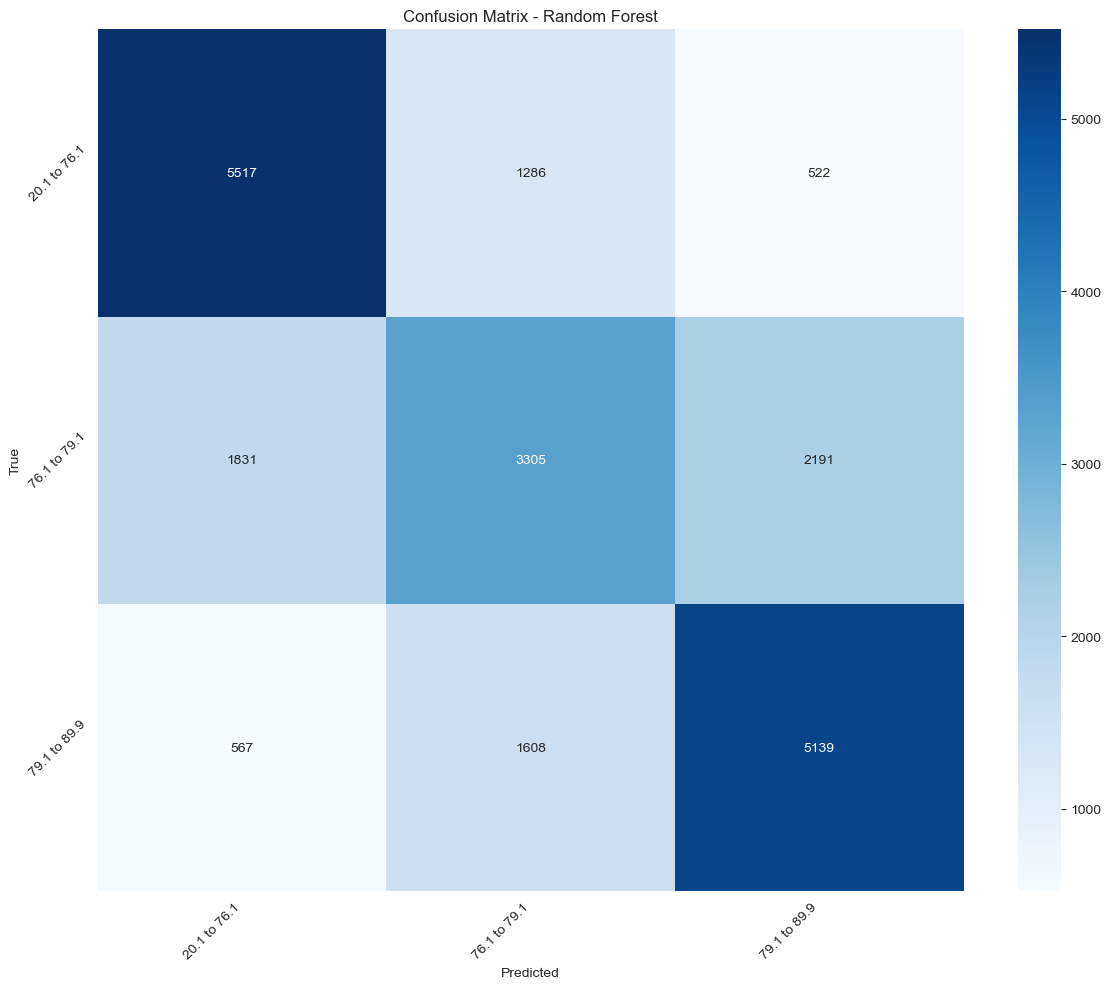

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

20.1 to 76.1       0.70      0.75      0.72      7325
76.1 to 79.1       0.53      0.45      0.49      7327
79.1 to 89.9       0.65      0.70      0.68      7314

    accuracy                           0.64     21966
   macro avg       0.63      0.64      0.63     21966
weighted avg       0.63      0.64      0.63     21966


Training KNN...


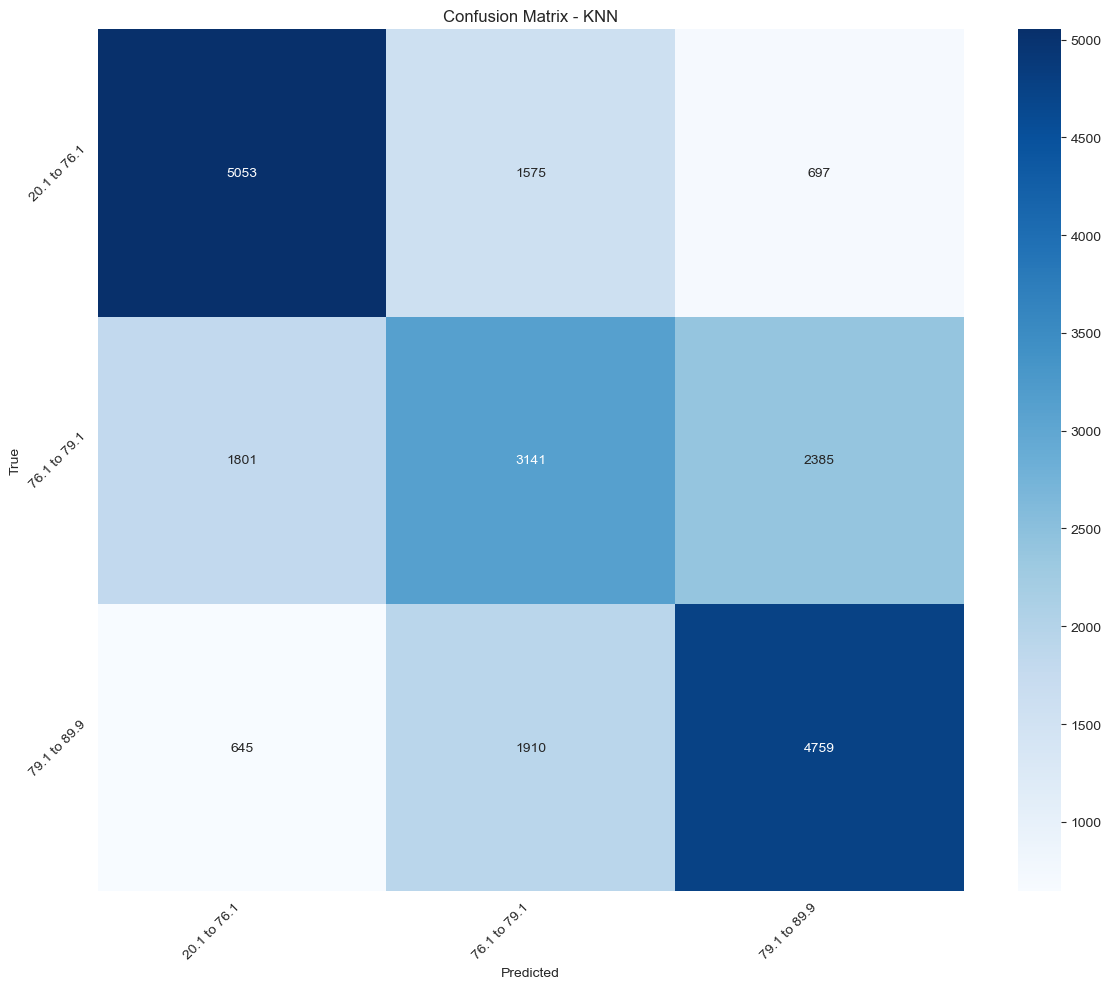

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
              precision    recall  f1-score   support

20.1 to 76.1       0.67      0.69      0.68      7325
76.1 to 79.1       0.47      0.43      0.45      7327
79.1 to 89.9       0.61      0.65      0.63      7314

    accuracy                           0.59     21966
   macro avg       0.58      0.59      0.59     21966
weighted avg       0.58      0.59      0.59     21966


Training Decision Tree...


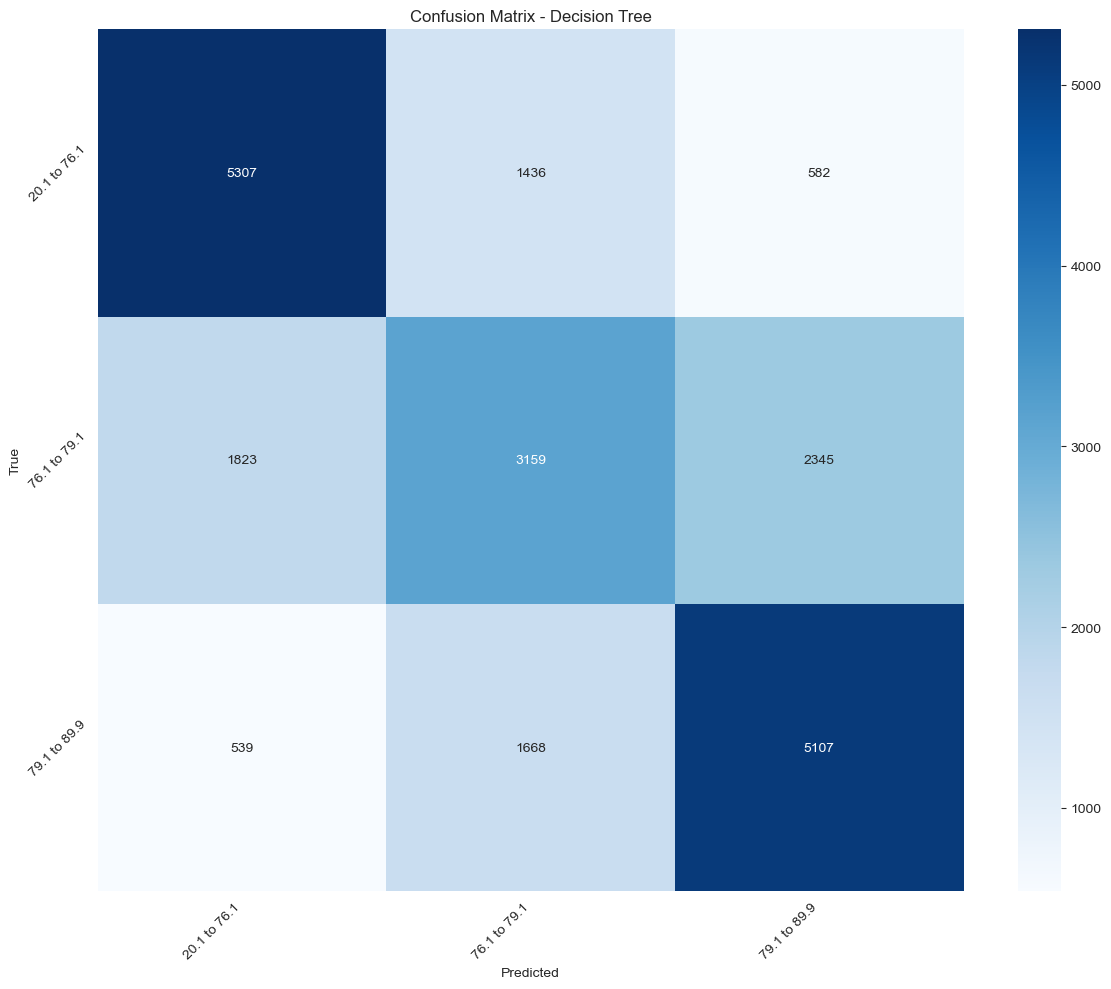

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}

Classification Report:
              precision    recall  f1-score   support

20.1 to 76.1       0.69      0.72      0.71      7325
76.1 to 79.1       0.50      0.43      0.46      7327
79.1 to 89.9       0.64      0.70      0.67      7314

    accuracy                           0.62     21966
   macro avg       0.61      0.62      0.61     21966
weighted avg       0.61      0.62      0.61     21966


Training Neural Network...
Epoch 1/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5653 - loss: 0.9841 - val_accuracy: 0.6113 - val_loss: 0.8845 - learning_rate: 0.0010
Epoch 2/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5983 - loss: 0.9043 - val_accuracy: 0.6107 - val_loss: 0.8670 - learning_rate: 0.0010
Epoch 3/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5984 - loss: 0.8854 - val_accuracy: 0.6128 - val_loss: 0.8548 - learning_rate: 0.0010
Epoch 4/100
2197/2197 ━━━

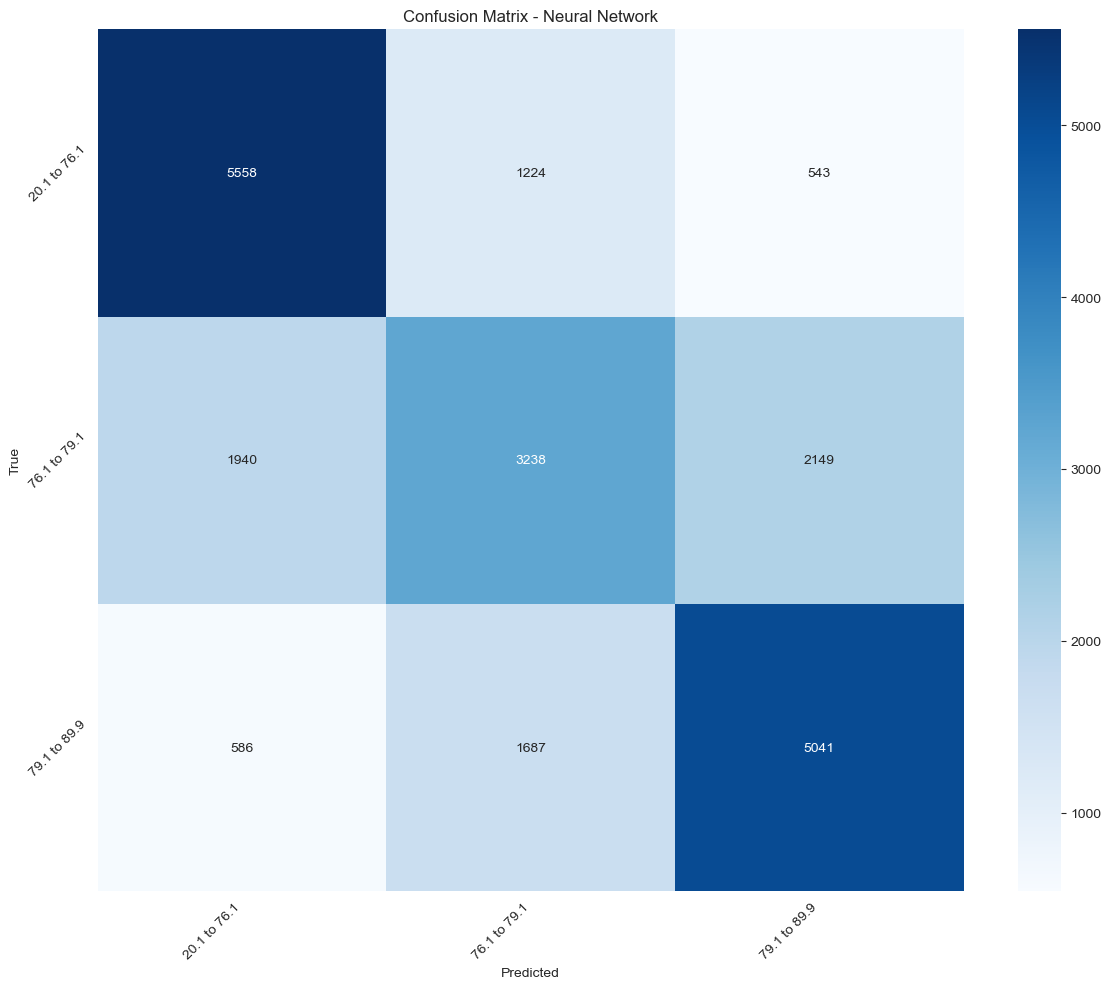


Neural Network Classification Report:
              precision    recall  f1-score   support

20.1 to 76.1       0.69      0.76      0.72      7325
76.1 to 79.1       0.53      0.44      0.48      7327
79.1 to 89.9       0.65      0.69      0.67      7314

    accuracy                           0.63     21966
   macro avg       0.62      0.63      0.62     21966
weighted avg       0.62      0.63      0.62     21966



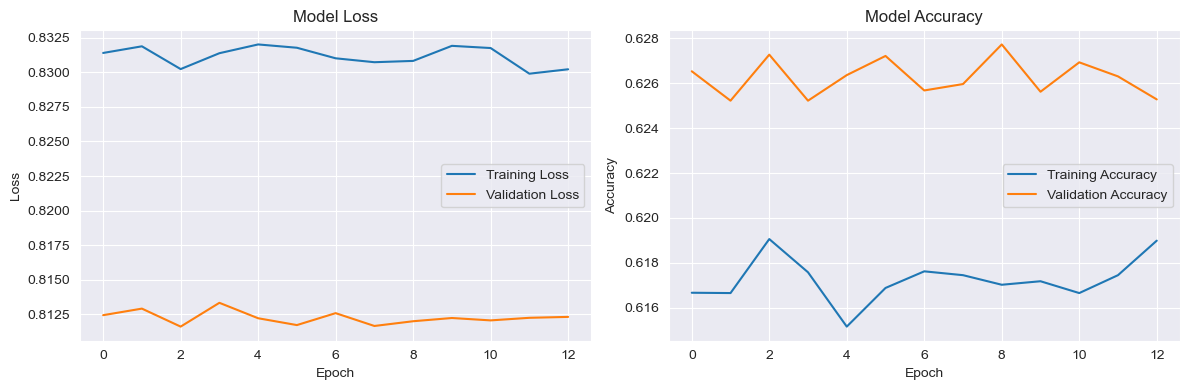

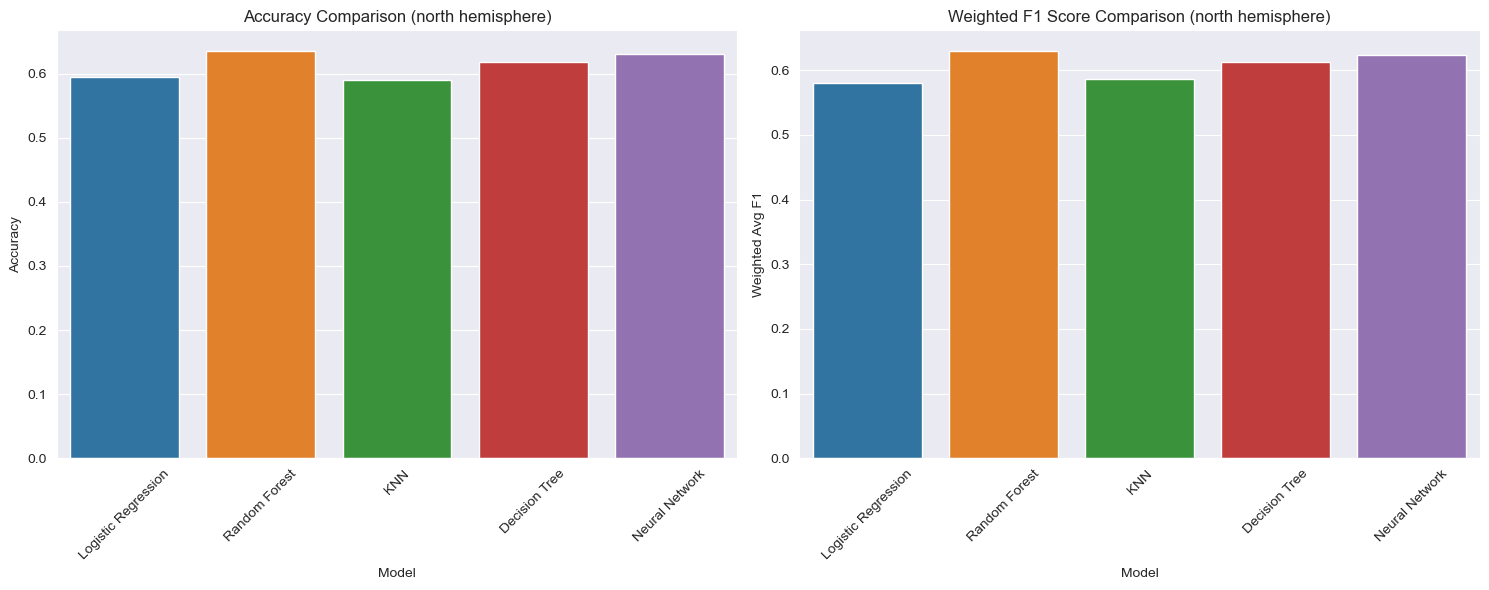


North Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.594328      0.580703         0.580646
1        Random Forest  0.635573      0.630135         0.630098
2                  KNN  0.589684      0.586667         0.586634
3        Decision Tree  0.617909      0.612759         0.612719
4       Neural Network  0.629928      0.623996         0.623960

Training South Hemisphere Models...

Training Logistic Regression...


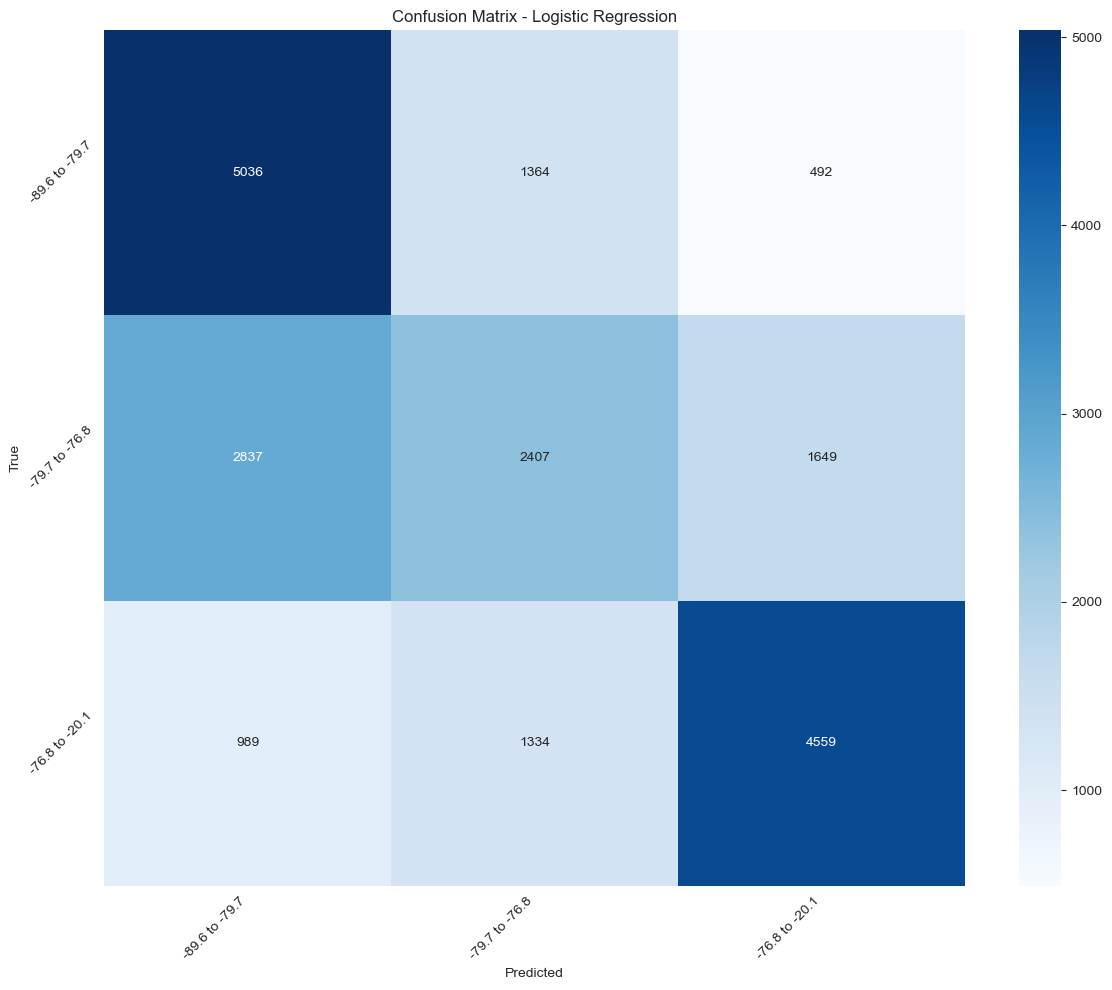

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -79.7       0.57      0.73      0.64      6892
-79.7 to -76.8       0.47      0.35      0.40      6893
-76.8 to -20.1       0.68      0.66      0.67      6882

      accuracy                           0.58     20667
     macro avg       0.57      0.58      0.57     20667
  weighted avg       0.57      0.58      0.57     20667


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


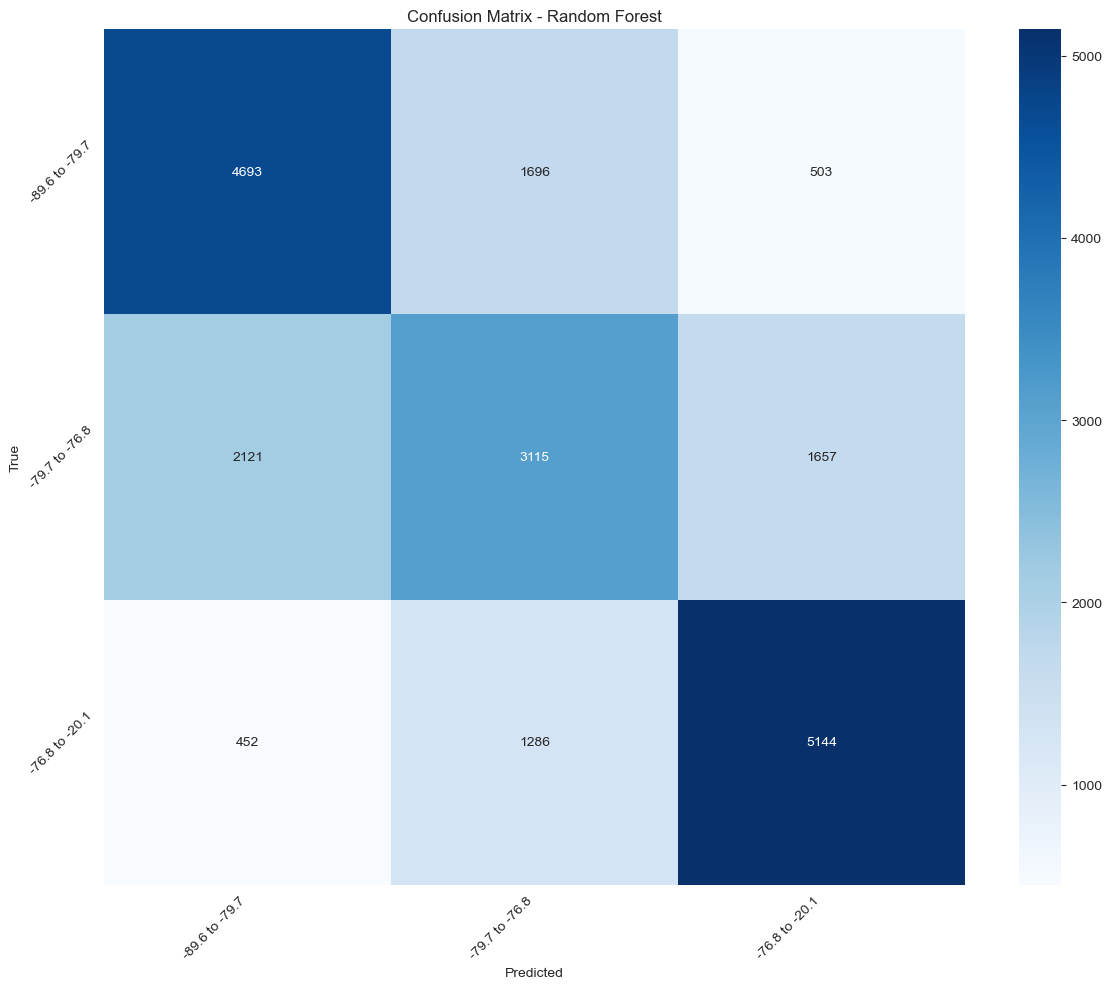

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -79.7       0.65      0.68      0.66      6892
-79.7 to -76.8       0.51      0.45      0.48      6893
-76.8 to -20.1       0.70      0.75      0.73      6882

      accuracy                           0.63     20667
     macro avg       0.62      0.63      0.62     20667
  weighted avg       0.62      0.63      0.62     20667


Training KNN...


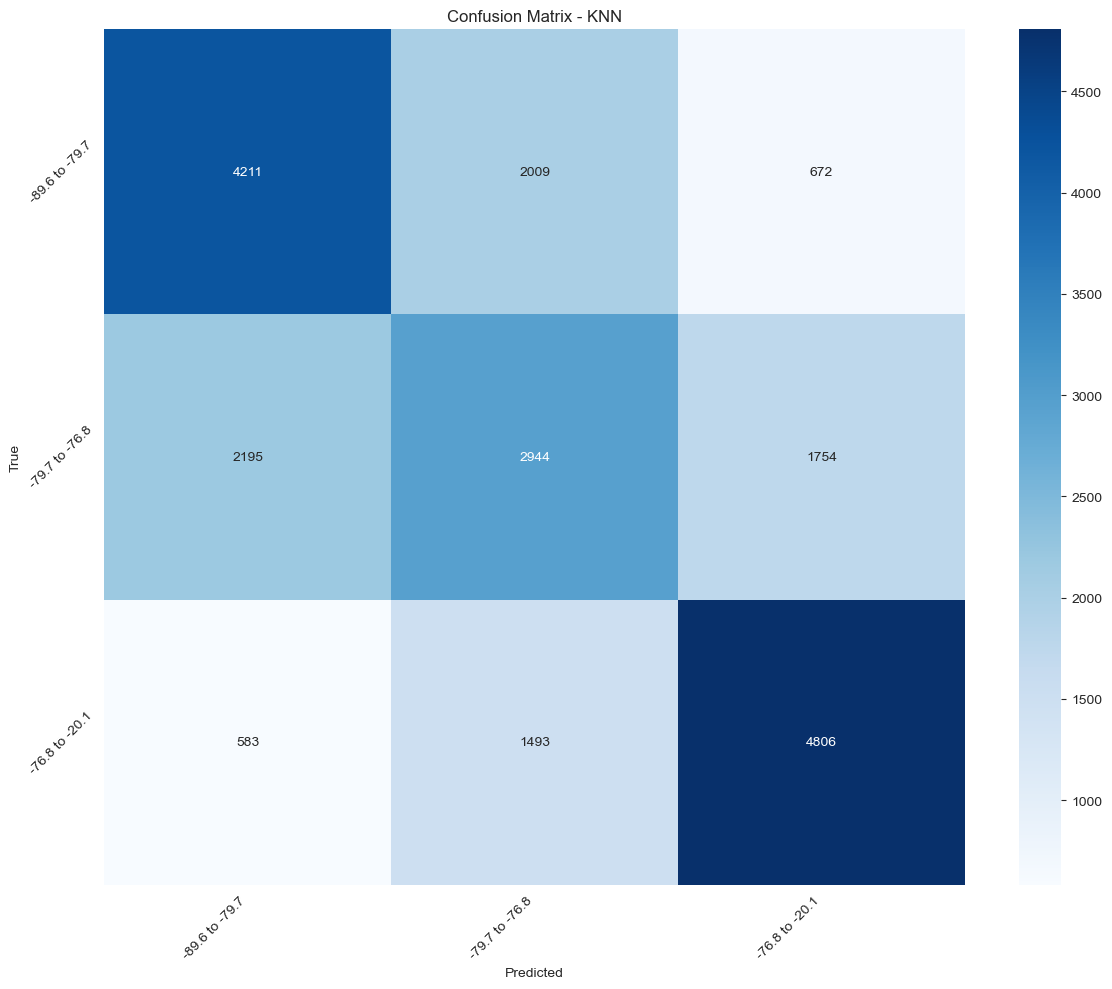

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -79.7       0.60      0.61      0.61      6892
-79.7 to -76.8       0.46      0.43      0.44      6893
-76.8 to -20.1       0.66      0.70      0.68      6882

      accuracy                           0.58     20667
     macro avg       0.57      0.58      0.58     20667
  weighted avg       0.57      0.58      0.58     20667


Training Decision Tree...


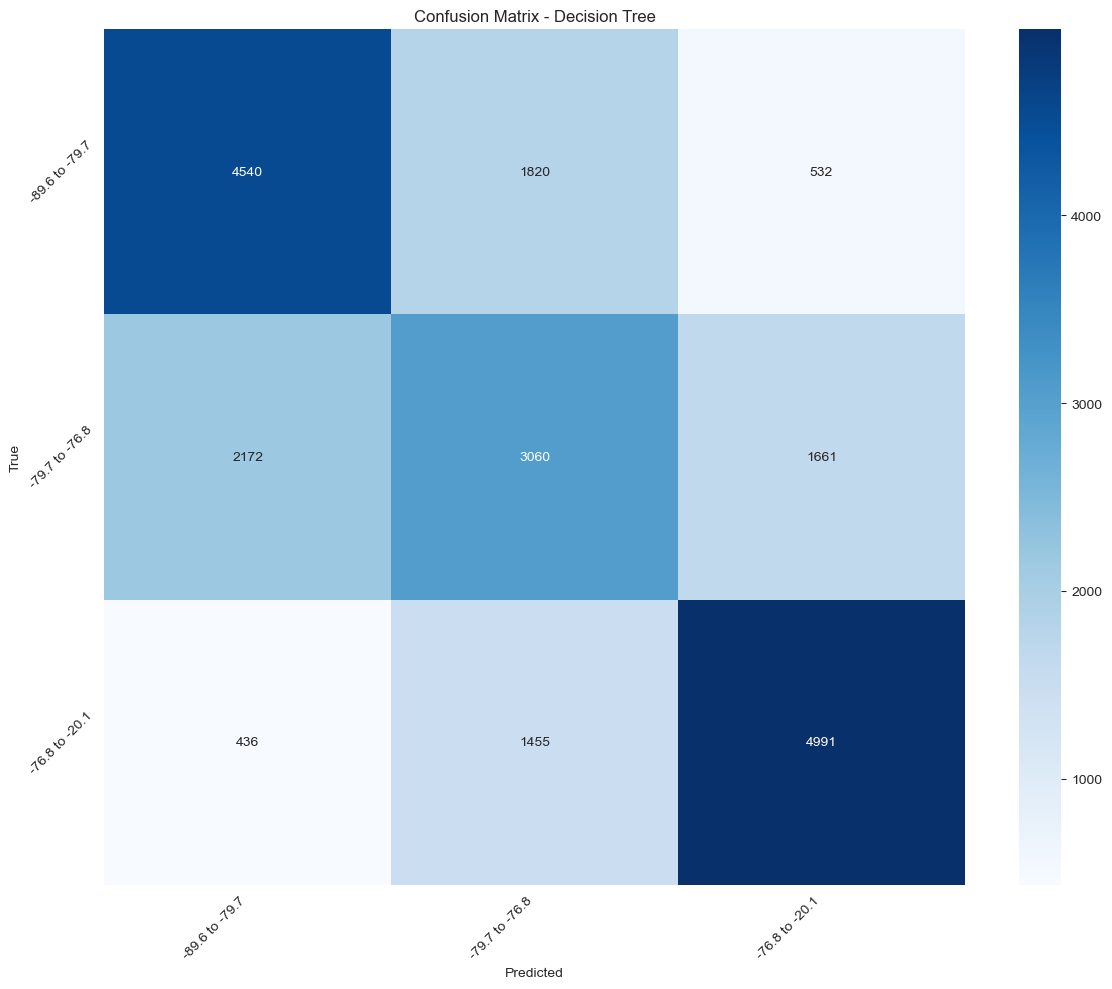

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -79.7       0.64      0.66      0.65      6892
-79.7 to -76.8       0.48      0.44      0.46      6893
-76.8 to -20.1       0.69      0.73      0.71      6882

      accuracy                           0.61     20667
     macro avg       0.60      0.61      0.61     20667
  weighted avg       0.60      0.61      0.61     20667


Training Neural Network...
Epoch 1/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5490 - loss: 0.9921 - val_accuracy: 0.6047 - val_loss: 0.8841 - learning_rate: 0.0010
Epoch 2/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5859 - loss: 0.9027 - val_accuracy: 0.6072 - val_loss: 0.8640 - learning_rate: 0.0010
Epoch 3/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 208s 101ms/step - accuracy: 0.5891 - loss: 0.8880 - val_accuracy: 0.6053 - val_loss: 0.8595 - learning_rate: 0.0010
Epoch 4

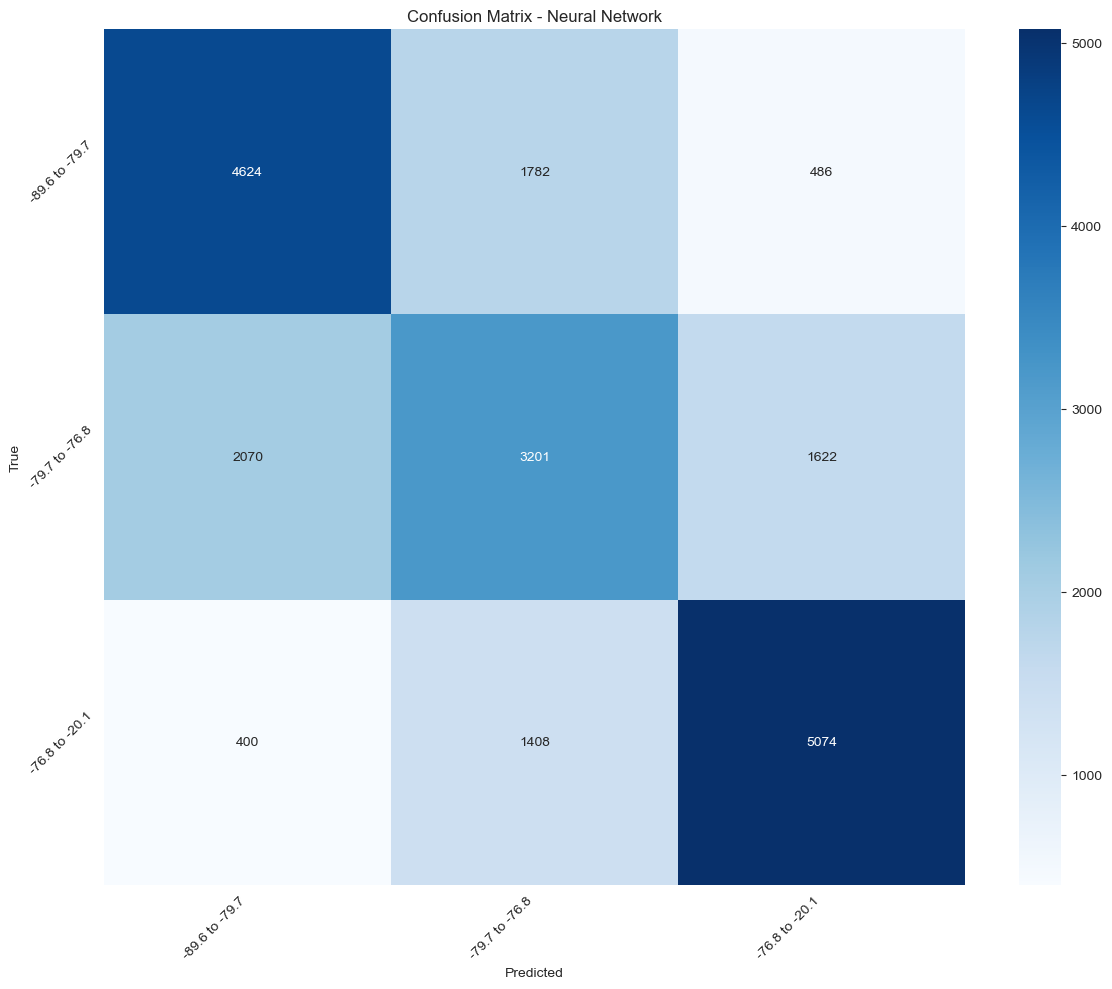


Neural Network Classification Report:
                precision    recall  f1-score   support

-89.6 to -79.7       0.65      0.67      0.66      6892
-79.7 to -76.8       0.50      0.46      0.48      6893
-76.8 to -20.1       0.71      0.74      0.72      6882

      accuracy                           0.62     20667
     macro avg       0.62      0.62      0.62     20667
  weighted avg       0.62      0.62      0.62     20667



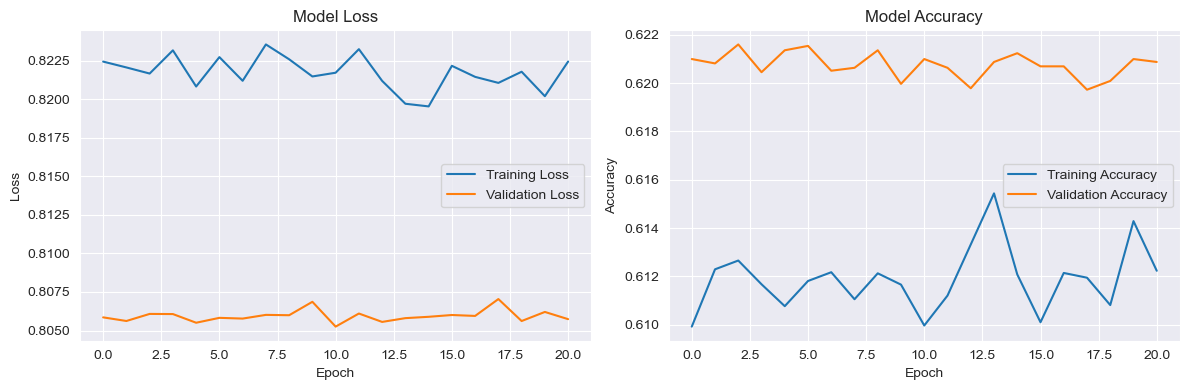

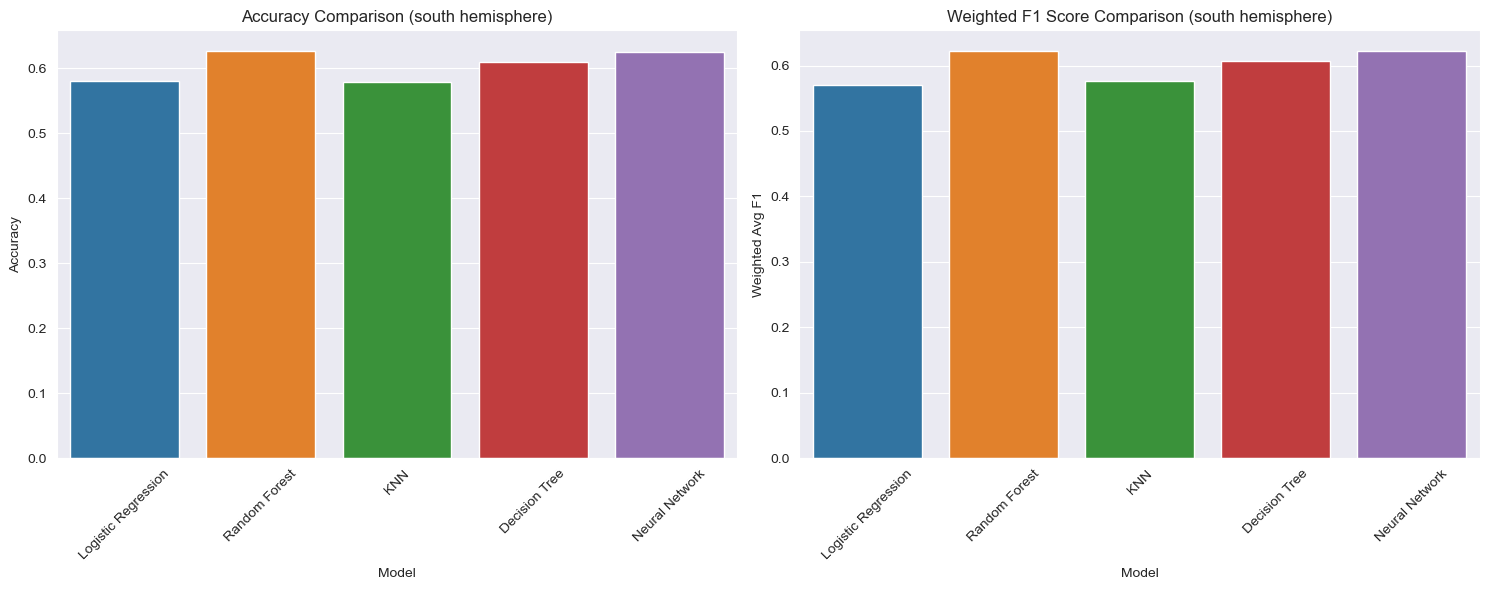


South Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.580733      0.570631         0.570574
1        Random Forest  0.626700      0.622589         0.622533
2                  KNN  0.578749      0.576389         0.576332
3        Decision Tree  0.609232      0.606344         0.606287
4       Neural Network  0.624135      0.621575         0.621520


In [14]:
# Example usage remains the same but now includes neural network results
print("Training North Hemisphere Models...")
north_results, north_models, north_scaler, north_edges, north_labels, north_history = train_classification_models(daysideN_df, 'north', n_bins=3)
print("\nNorth Hemisphere Results:")
print(north_results)

print("\nTraining South Hemisphere Models...")
south_results, south_models, south_scaler, south_edges, south_labels, south_history = train_classification_models(daysideS_df, 'south', n_bins=3)
print("\nSouth Hemisphere Results:")
print(south_results)

Training North Hemisphere Models...

Training Logistic Regression...


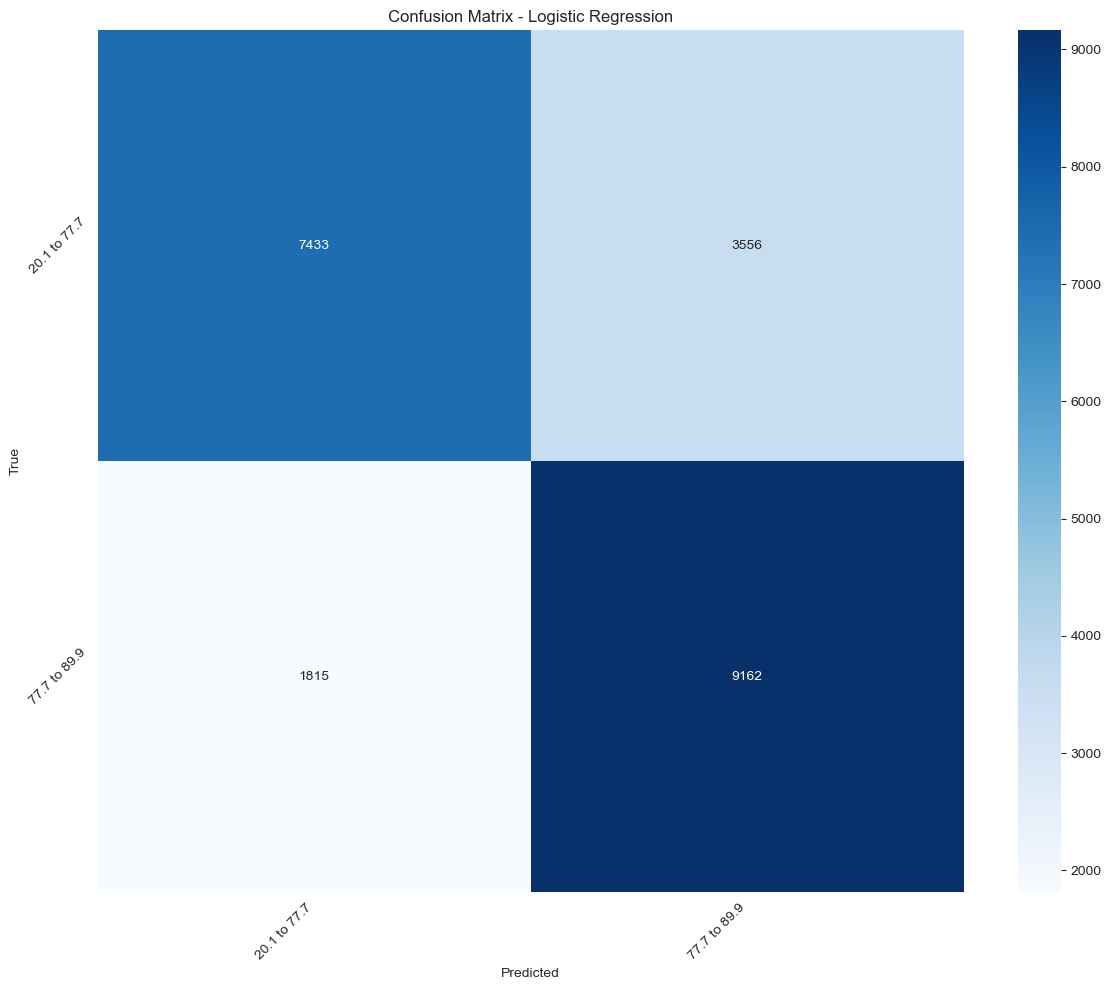

Best parameters for Logistic Regression: {'C': 10.0, 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

20.1 to 77.7       0.80      0.68      0.73     10989
77.7 to 89.9       0.72      0.83      0.77     10977

    accuracy                           0.76     21966
   macro avg       0.76      0.76      0.75     21966
weighted avg       0.76      0.76      0.75     21966


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


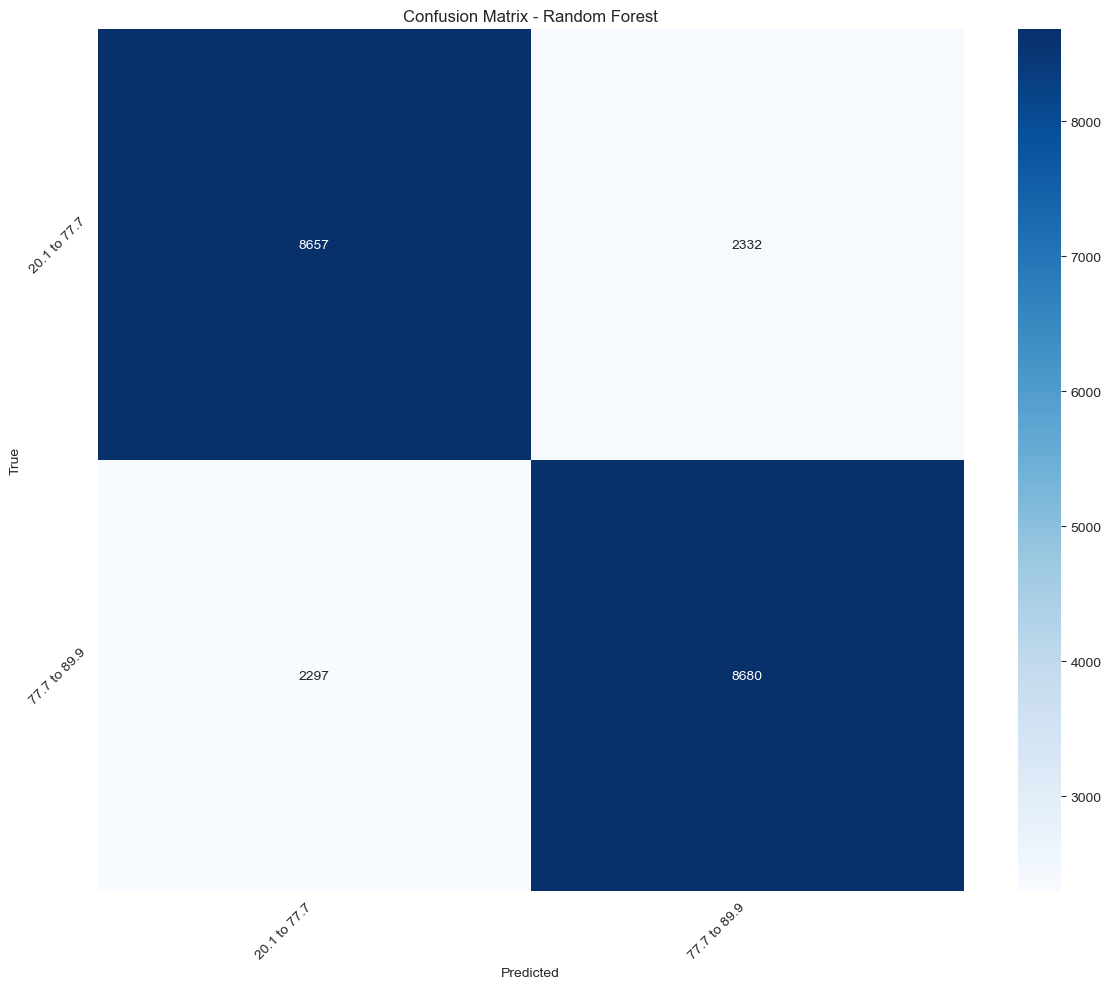

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

20.1 to 77.7       0.79      0.79      0.79     10989
77.7 to 89.9       0.79      0.79      0.79     10977

    accuracy                           0.79     21966
   macro avg       0.79      0.79      0.79     21966
weighted avg       0.79      0.79      0.79     21966


Training KNN...


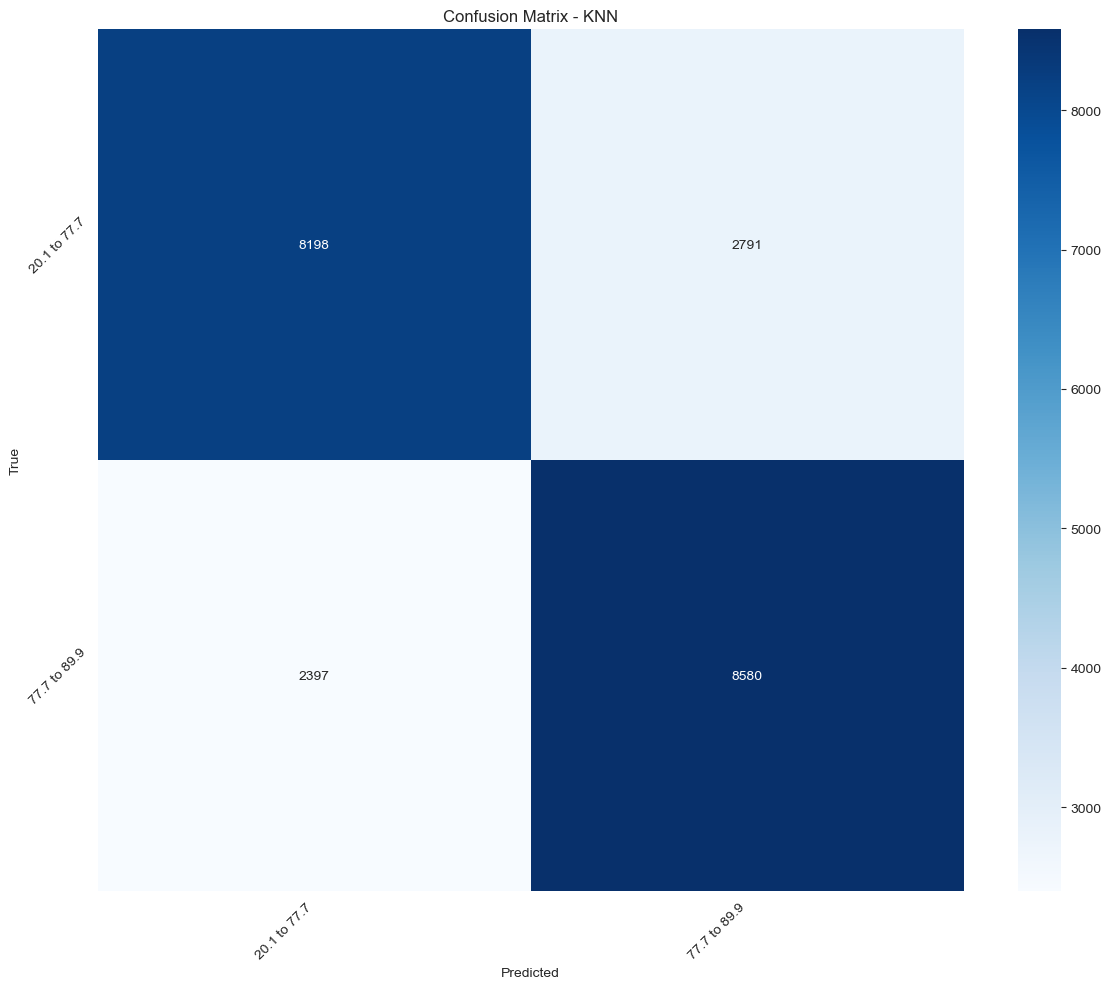

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
              precision    recall  f1-score   support

20.1 to 77.7       0.77      0.75      0.76     10989
77.7 to 89.9       0.75      0.78      0.77     10977

    accuracy                           0.76     21966
   macro avg       0.76      0.76      0.76     21966
weighted avg       0.76      0.76      0.76     21966


Training Decision Tree...


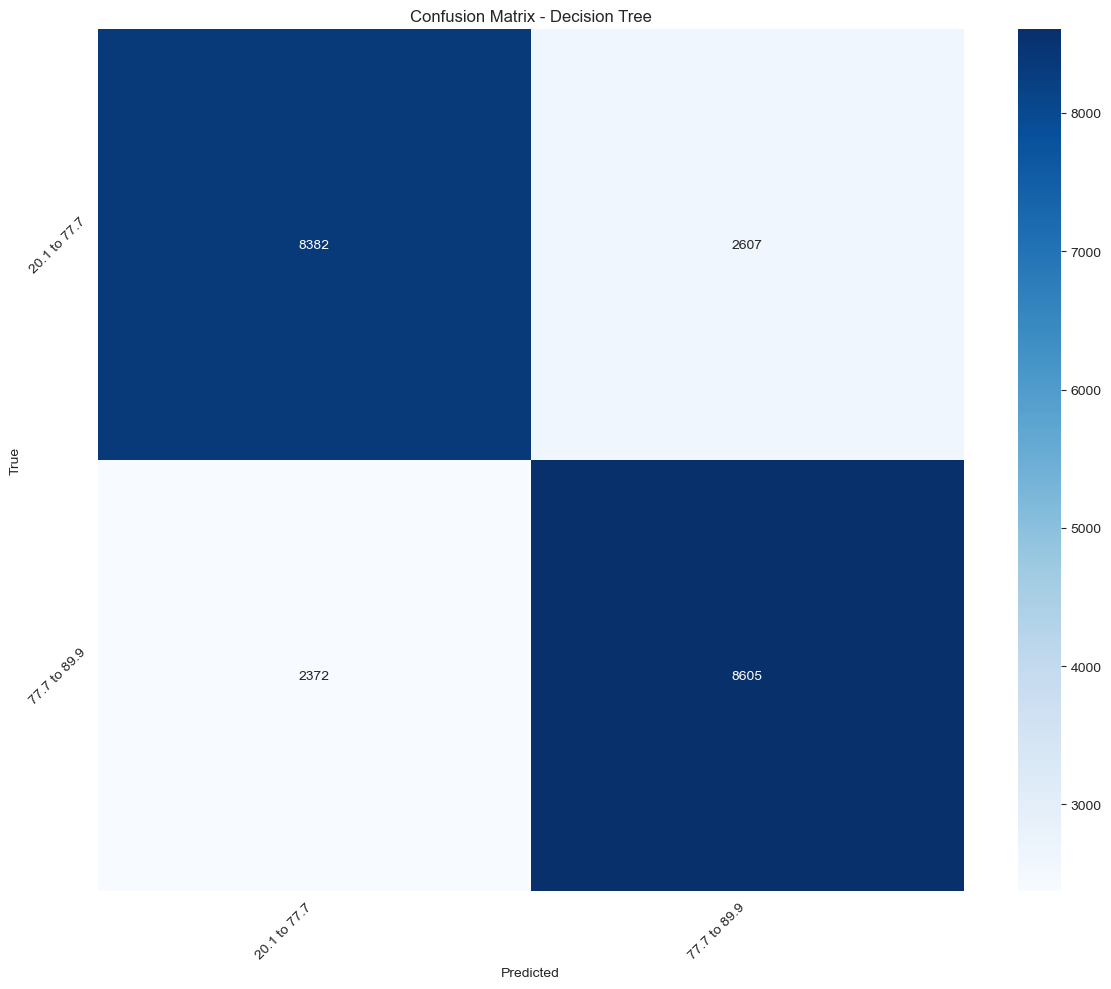

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}

Classification Report:
              precision    recall  f1-score   support

20.1 to 77.7       0.78      0.76      0.77     10989
77.7 to 89.9       0.77      0.78      0.78     10977

    accuracy                           0.77     21966
   macro avg       0.77      0.77      0.77     21966
weighted avg       0.77      0.77      0.77     21966


Training Neural Network...
Epoch 1/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7388 - loss: 0.5979 - val_accuracy: 0.7739 - val_loss: 0.5310 - learning_rate: 0.0010
Epoch 2/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7614 - loss: 0.5407 - val_accuracy: 0.7714 - val_loss: 0.5172 - learning_rate: 0.0010
Epoch 3/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7669 - loss: 0.5214 - val_accuracy: 0.7751 - val_loss: 0.5084 - learning_rate: 0.0010
Epoch 4/100
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7656 - los

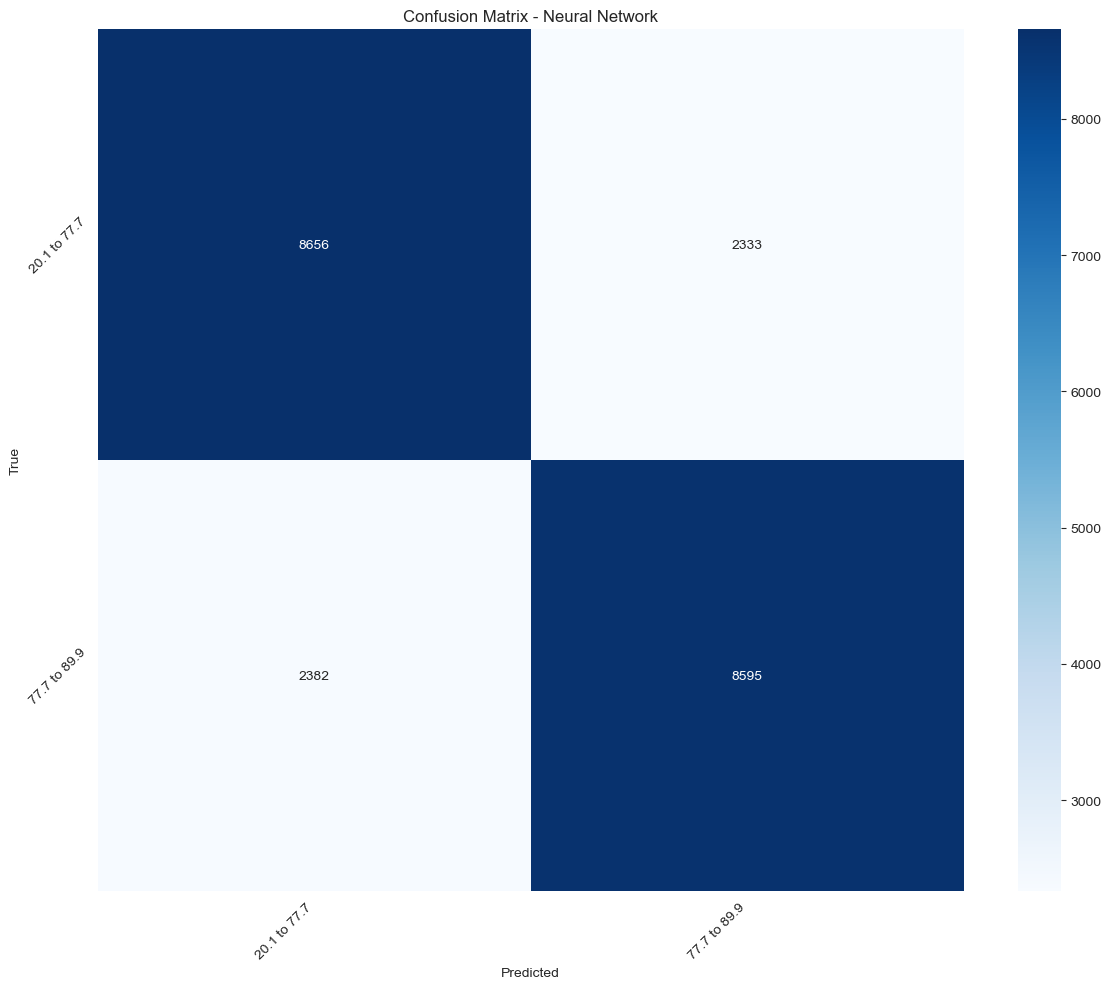


Neural Network Classification Report:
              precision    recall  f1-score   support

20.1 to 77.7       0.78      0.79      0.79     10989
77.7 to 89.9       0.79      0.78      0.78     10977

    accuracy                           0.79     21966
   macro avg       0.79      0.79      0.79     21966
weighted avg       0.79      0.79      0.79     21966



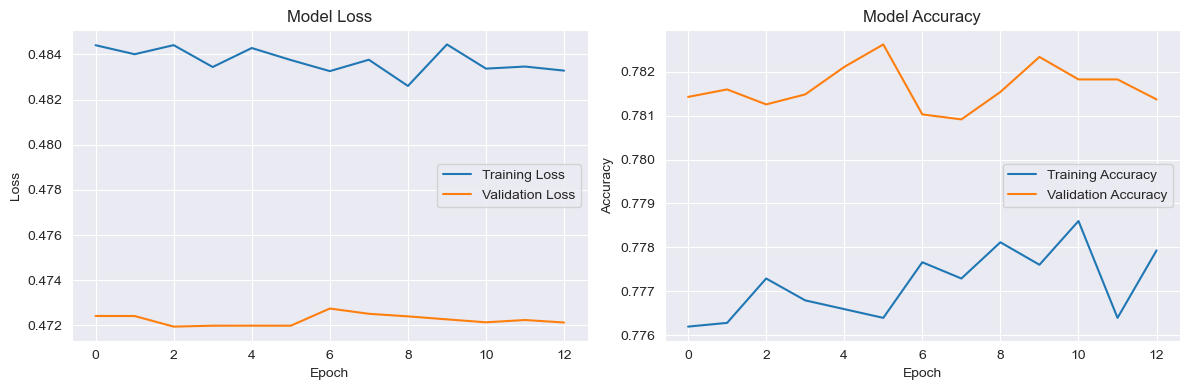

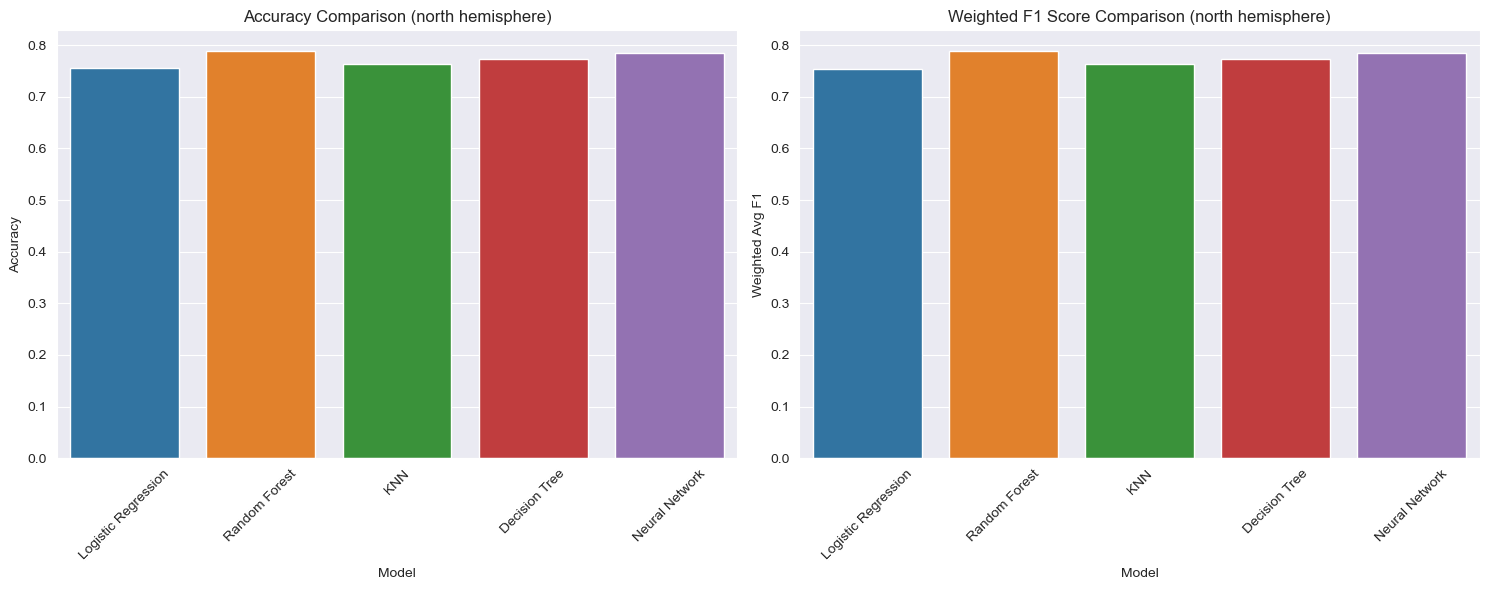


North Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.755486      0.753961         0.753951
1        Random Forest  0.789265      0.789265         0.789265
2                  KNN  0.763817      0.763745         0.763743
3        Decision Tree  0.773332      0.773308         0.773307
4       Neural Network  0.785350      0.785348         0.785349

Training South Hemisphere Models...

Training Logistic Regression...


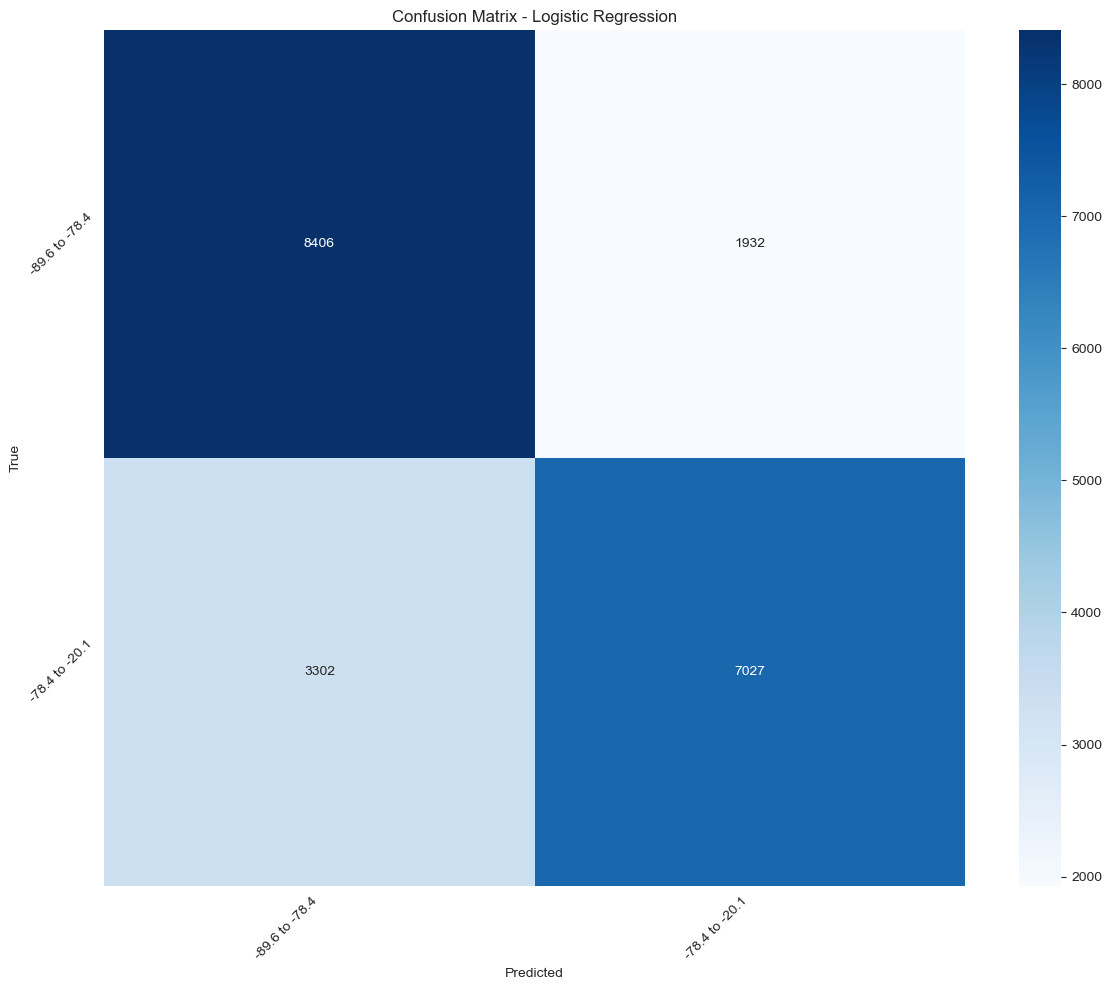

Best parameters for Logistic Regression: {'C': 1.0, 'solver': 'lbfgs'}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -78.4       0.72      0.81      0.76     10338
-78.4 to -20.1       0.78      0.68      0.73     10329

      accuracy                           0.75     20667
     macro avg       0.75      0.75      0.75     20667
  weighted avg       0.75      0.75      0.75     20667


Training Random Forest...


/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


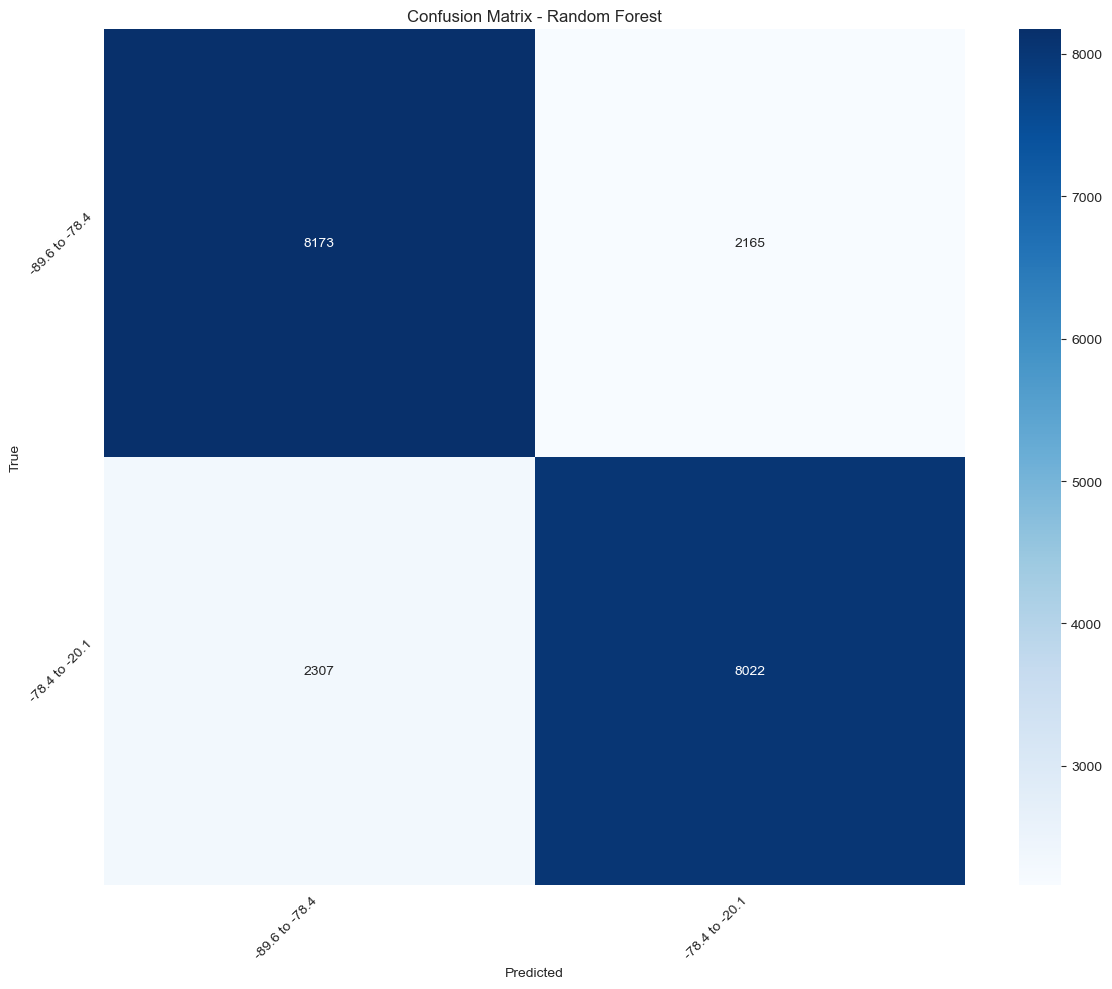

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -78.4       0.78      0.79      0.79     10338
-78.4 to -20.1       0.79      0.78      0.78     10329

      accuracy                           0.78     20667
     macro avg       0.78      0.78      0.78     20667
  weighted avg       0.78      0.78      0.78     20667


Training KNN...


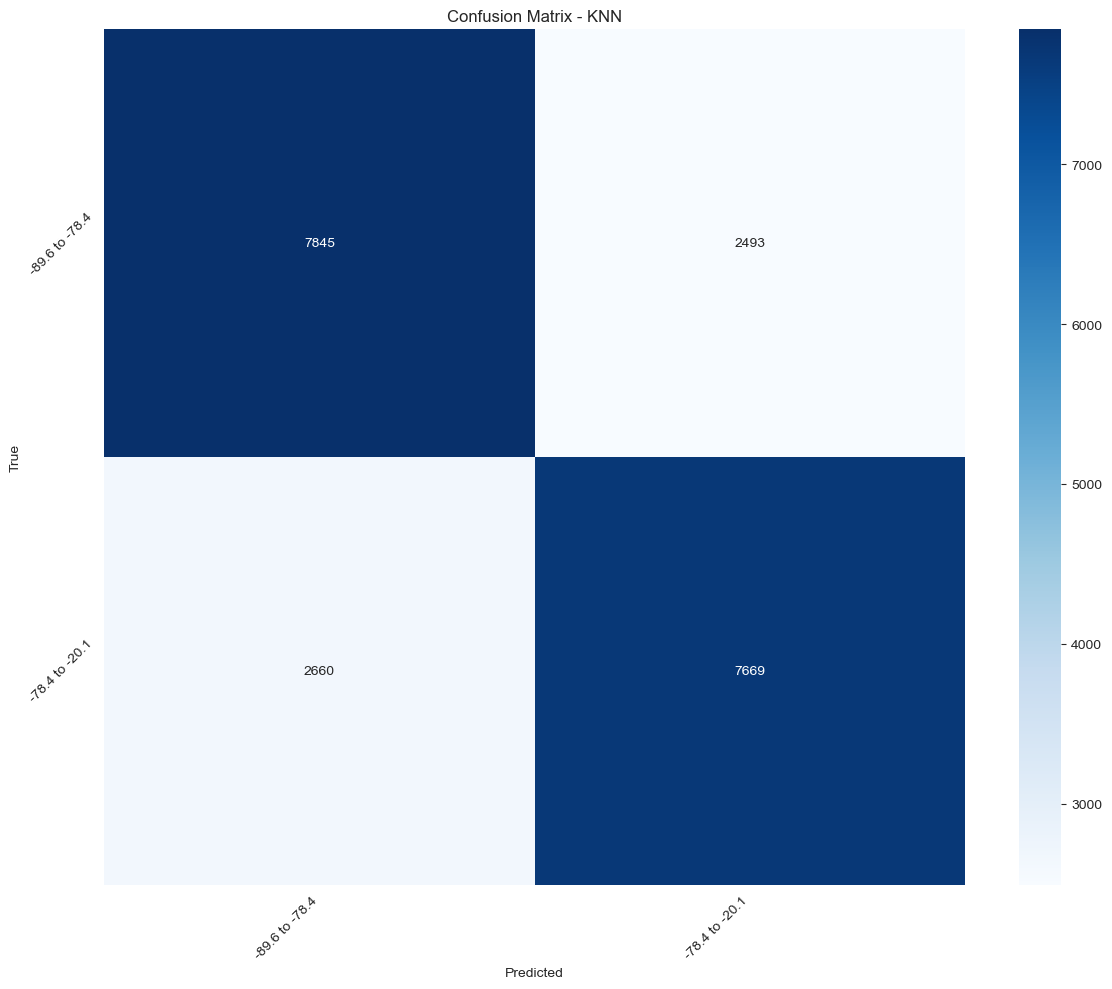

Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -78.4       0.75      0.76      0.75     10338
-78.4 to -20.1       0.75      0.74      0.75     10329

      accuracy                           0.75     20667
     macro avg       0.75      0.75      0.75     20667
  weighted avg       0.75      0.75      0.75     20667


Training Decision Tree...


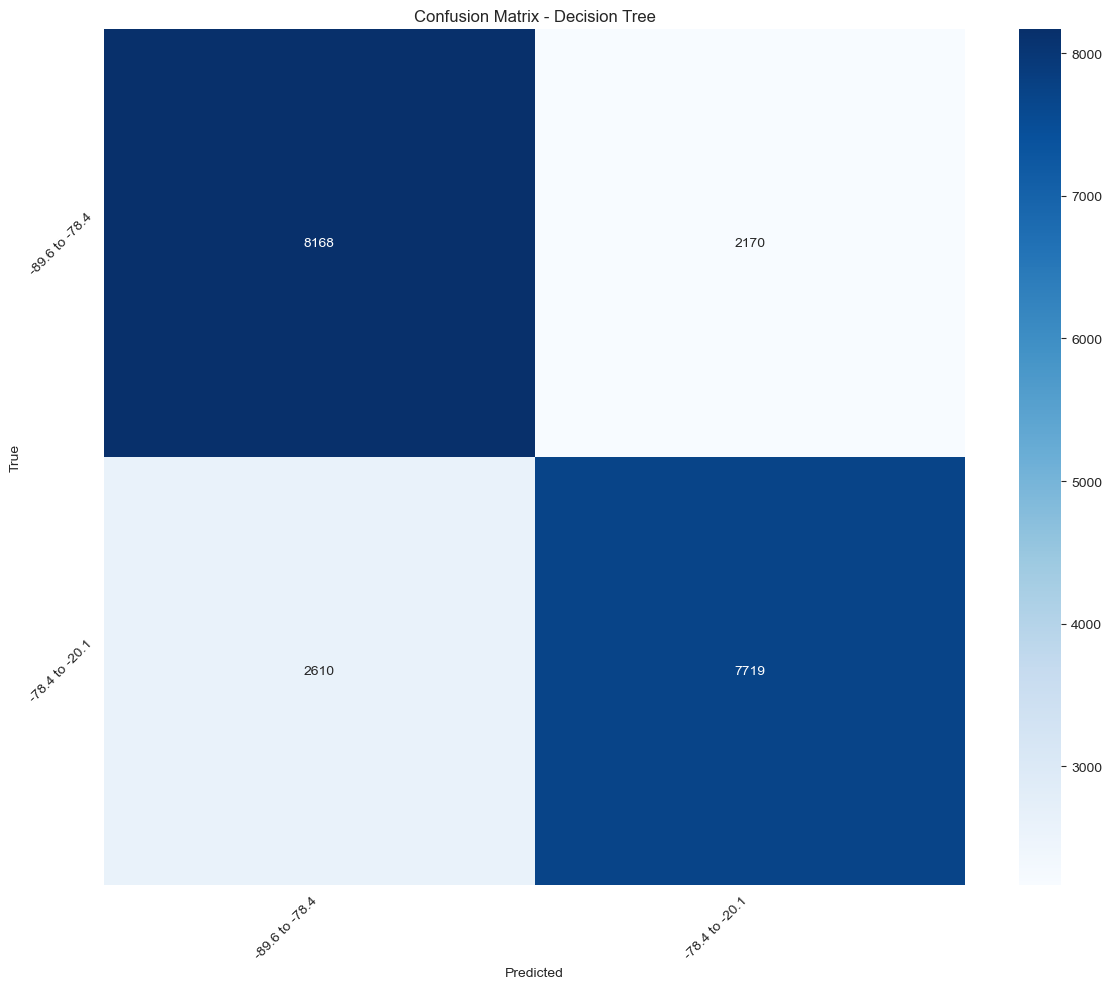

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report:
                precision    recall  f1-score   support

-89.6 to -78.4       0.76      0.79      0.77     10338
-78.4 to -20.1       0.78      0.75      0.76     10329

      accuracy                           0.77     20667
     macro avg       0.77      0.77      0.77     20667
  weighted avg       0.77      0.77      0.77     20667


Training Neural Network...
Epoch 1/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7219 - loss: 0.6160 - val_accuracy: 0.7660 - val_loss: 0.5294 - learning_rate: 0.0010
Epoch 2/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7494 - loss: 0.5489 - val_accuracy: 0.7688 - val_loss: 0.5137 - learning_rate: 0.0010
Epoch 3/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7509 - loss: 0.5321 - val_accuracy: 0.7705 - val_loss: 0.5055 - learning_rate: 0.0010
Epoch 4/100
2067/2067 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 

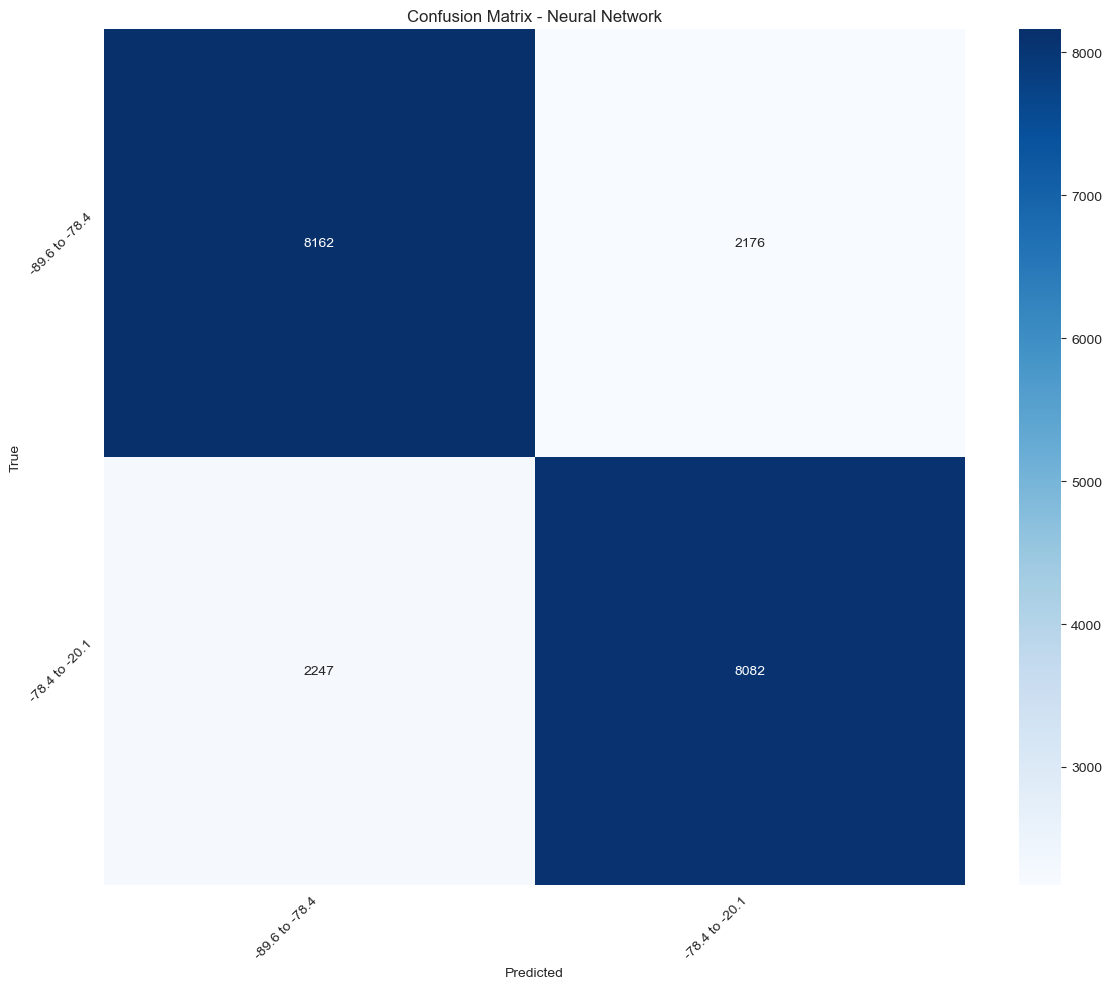


Neural Network Classification Report:
                precision    recall  f1-score   support

-89.6 to -78.4       0.78      0.79      0.79     10338
-78.4 to -20.1       0.79      0.78      0.79     10329

      accuracy                           0.79     20667
     macro avg       0.79      0.79      0.79     20667
  weighted avg       0.79      0.79      0.79     20667



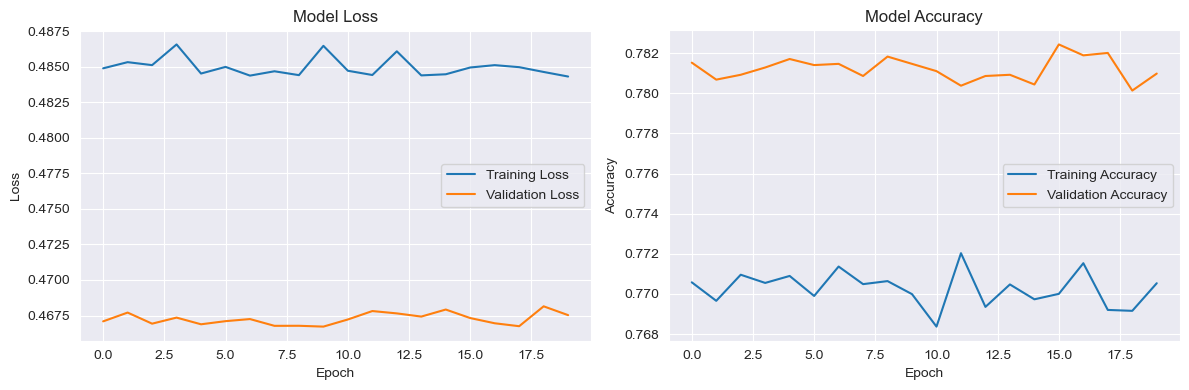

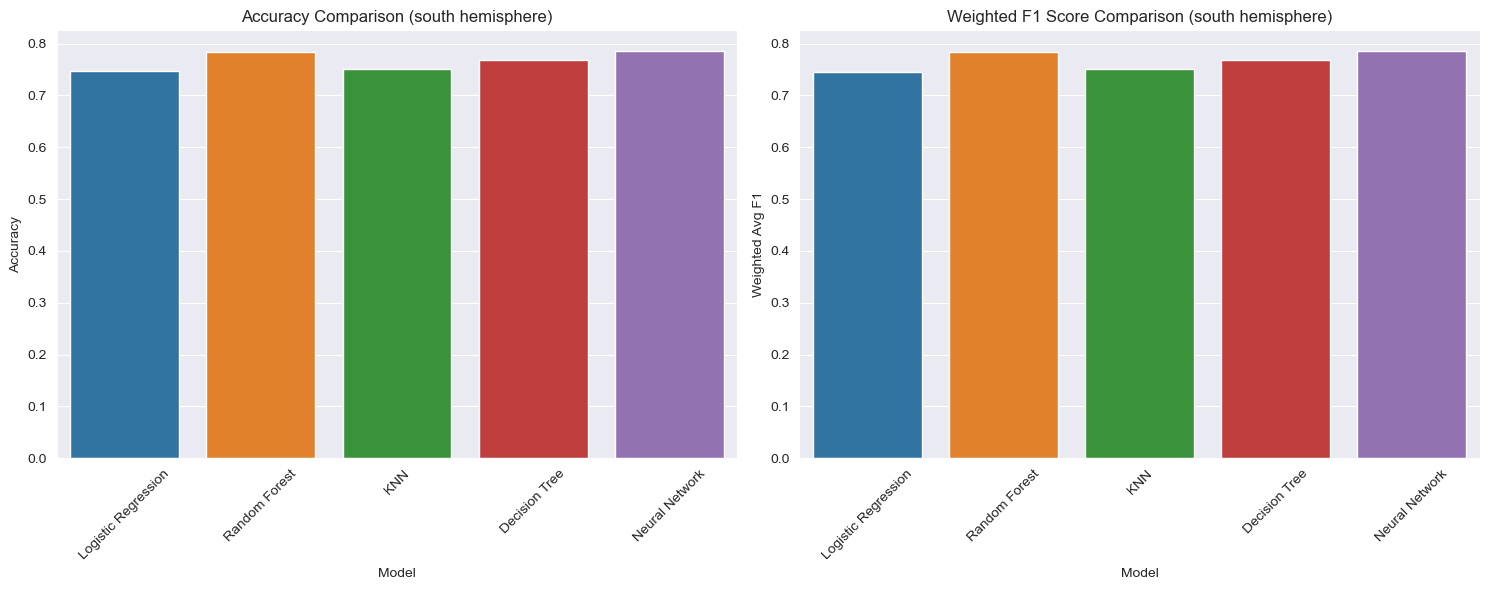


South Hemisphere Results:
                 Model  Accuracy  Macro Avg F1  Weighted Avg F1
0  Logistic Regression  0.746746      0.745613         0.745621
1        Random Forest  0.783616      0.783605         0.783606
2                  KNN  0.750665      0.750647         0.750648
3        Decision Tree  0.768713      0.768604         0.768606
4       Neural Network  0.785987      0.785984         0.785984


In [15]:
# Example usage remains the same but now includes neural network results
print("Training North Hemisphere Models...")
north_results, north_models, north_scaler, north_edges, north_labels, north_history = train_classification_models(daysideN_df, 'north', n_bins=2)
print("\nNorth Hemisphere Results:")
print(north_results)

print("\nTraining South Hemisphere Models...")
south_results, south_models, south_scaler, south_edges, south_labels, south_history = train_classification_models(daysideS_df, 'south', n_bins=2)
print("\nSouth Hemisphere Results:")
print(south_results)

In [16]:
# Example usage remains the same but now includes neural network results
print("Training North Hemisphere Models...")
north_results, north_models, north_scaler, north_edges, north_labels, north_history = train_classification_models(daysideN_df, 'north', n_bins=1)
print("\nNorth Hemisphere Results:")
print(north_results)

print("\nTraining South Hemisphere Models...")
south_results, south_models, south_scaler, south_edges, south_labels, south_history = train_classification_models(daysideS_df, 'south', n_bins=1)
print("\nSouth Hemisphere Results:")
print(south_results)

Training North Hemisphere Models...

Training Logistic Regression...


ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1252, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1227, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
                                                ^^^^^^^^^^^^^^^
  File "/Users/beastxgamer/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py", line 1179, in _fit_liblinear
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0
